In [3]:
"""!pip install sqlalchemy pandas tensorflow scikit-learn matplotlib psycopg2-binary scipy"""

'!pip install sqlalchemy pandas tensorflow scikit-learn matplotlib psycopg2-binary scipy'

## Reading DB

In [1]:
from sqlalchemy import create_engine
import getpass
import pandas as pd


DB_NAME="mimic3"
DB_USER="postgres"
DB_PASSWORD = getpass.getpass("Enter password: ")
DB_HOST="localhost"
DB_PORT=5432
DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
eng = create_engine(DATABASE_URL)

In [2]:
# Test connection with pandas
query = "SELECT * FROM first_admission_data"
df = pd.read_sql(query, eng)

print(df.shape)
df.head(10)


(29082, 46)


,subject_id,hadm_id,gender,age,dob,dod,admittime,mortality_1yr,weight_kg,respiratory_rate,...,cardiovascular,neurological,pulmonary,diabetes,renal,liver,cancer,mental_substance,hem_metabolic,autoimmune
0,5692,151113,M,44.0,2099-09-01,NaT,2143-10-23 15:42:00,0,NaN,25.0,...,1,0,0,0,0,0,0,0,0,0
1,82633,113066,M,55.0,2074-05-07,NaT,2129-11-20 03:47:00,0,71.0,20.0,...,0,0,0,0,0,0,0,1,0,0
2,90158,115959,M,21.0,2155-05-05,NaT,2176-07-19 19:35:00,0,65.9,17.0,...,1,1,0,0,0,0,0,0,0,0
3,76727,191656,M,77.0,2041-09-11,NaT,2119-02-24 10:45:00,0,74.5,25.0,...,0,0,1,0,0,0,1,0,0,0
4,56045,195101,F,65.0,2086-09-01,NaT,2152-02-06 10:36:00,0,106.0,12.0,...,1,0,1,1,0,0,0,0,1,0
5,20913,128124,M,49.0,2087-10-22,2138-01-02,2137-04-30 21:08:00,1,136.0,22.0,...,1,0,1,1,1,0,0,0,1,0
6,19616,193383,M,53.0,2060-02-05,NaT,2113-08-16 08:00:00,0,101.5,10.0,...,1,0,1,0,0,0,0,0,0,0
7,99645,152926,M,78.0,2072-06-08,NaT,2151-05-05 08:00:00,0,87.6,12.0,...,1,0,0,0,0,0,1,1,0,0
8,26097,126042,F,43.0,2078-08-17,NaT,2122-01-28 21:28:00,0,NaN,24.0,...,1,0,0,0,0,0,0,0,1,0
9,19698,199543,M,56.0,2129-08-03,2187-01-09,2185-10-29 18:36:00,0,96.0,17.0,...,1,0,0,1,0,1,0,0,0,0


In [3]:
counts = df['mortality_1yr'].value_counts()
proportions = df['mortality_1yr'].value_counts(normalize=True)

pd.DataFrame({
    'count': counts,
    'proportion': proportions
})


,count,proportion
mortality_1yr,,
0,23069,0.79324
1,6013,0.20676


In [4]:
column_names = df.columns.tolist()

print(column_names)

['subject_id', 'hadm_id', 'gender', 'age', 'dob', 'dod', 'admittime', 'mortality_1yr', 'weight_kg', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph', 'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 'platelet_count', 'inr', 'pt', 'ptt', 'temperature', 'gcs', 'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 'autoimmune']


In [5]:
# Drop unwanted columns
df = df.drop(columns=['dob', 'dod', 'admittime'], errors='ignore')

# Convert gender: M → 1, F → 0
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# Fill NaNs with mean for numeric columns
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())

# Ensure 'age' is integer, others are rounded to 2 decimals
df['age'] = df['age'].round().astype(int)
for col in df.select_dtypes(include='number').columns:
    if col != 'age':
        df[col] = df[col].round(2)

In [6]:
print(df.shape)
df.head(10)

(29082, 43)


,subject_id,hadm_id,gender,age,mortality_1yr,weight_kg,respiratory_rate,heart_rate,nbp_systolic,nbp_diastolic,...,cardiovascular,neurological,pulmonary,diabetes,renal,liver,cancer,mental_substance,hem_metabolic,autoimmune
0,5692,151113,1,44,0,85.24,25.0,90.0,98.0,65.33,...,1,0,0,0,0,0,0,0,0,0
1,82633,113066,1,55,0,71.00,20.0,98.0,121.0,77.00,...,0,0,0,0,0,0,0,1,0,0
2,90158,115959,1,21,0,65.90,17.0,96.0,130.0,66.00,...,1,1,0,0,0,0,0,0,0,0
3,76727,191656,1,77,0,74.50,25.0,83.0,148.0,66.00,...,0,0,1,0,0,0,1,0,0,0
4,56045,195101,0,65,0,106.00,12.0,88.0,101.0,38.00,...,1,0,1,1,0,0,0,0,1,0
5,20913,128124,1,49,1,136.00,22.0,79.0,119.0,75.67,...,1,0,1,1,1,0,0,0,1,0
6,19616,193383,1,53,0,101.50,10.0,88.0,111.0,81.00,...,1,0,1,0,0,0,0,0,0,0
7,99645,152926,1,78,0,87.60,12.0,61.0,121.0,75.00,...,1,0,0,0,0,0,1,1,0,0
8,26097,126042,0,43,0,85.24,24.0,95.0,95.0,57.00,...,1,0,0,0,0,0,0,0,1,0
9,19698,199543,1,56,0,96.00,17.0,62.0,131.0,99.00,...,1,0,0,1,0,1,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split


# Split the dataset into two halves
#dfA, dfB= train_test_split(df, test_size=0.5, random_state=42)
dfA, dfB= train_test_split(df, test_size=0.5, random_state=42,stratify=df['mortality_1yr'])

In [8]:
column_names = df.columns.tolist()

print(column_names)

['subject_id', 'hadm_id', 'gender', 'age', 'mortality_1yr', 'weight_kg', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph', 'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 'platelet_count', 'inr', 'pt', 'ptt', 'temperature', 'gcs', 'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 'autoimmune']


In [9]:
# Common attributes (keep these in both dfA and dfB)
common_attributes = [
    'subject_id', 'hadm_id', 'gender', 'age', 'weight_kg', 'gcs', 
    'cardiovascular', 'neurological', 'pulmonary', 'diabetes', 
    'renal', 'liver', 'cancer', 'mental_substance', 'hem_metabolic', 
    'autoimmune', 'mortality_1yr'
]


# Set A specific attributes
set_A_attributes = [
    'temperature', 'respiratory_rate', 'heart_rate', 'nbp_systolic', 
    'nbp_diastolic', 'spo2', 'fio2', 'po2', 'pco2', 'ph'
]

# Set B specific attributes
set_B_attributes = [
    'sodium', 'potassium', 'calcium', 'glucose', 'creatinine', 'bun', 
    'anion_gap', 'bilirubin', 'albumin', 'wbc', 'hemoglobin', 'hematocrit', 
    'platelet_count', 'inr', 'pt', 'ptt'
]


In [10]:
dfA = dfA[common_attributes + set_A_attributes]
dfB = dfB[common_attributes + set_B_attributes]

print(dfA['mortality_1yr'].value_counts())
print(dfB['mortality_1yr'].value_counts())


mortality_1yr
0    11534
1     3007
Name: count, dtype: int64
mortality_1yr
0    11535
1     3006
Name: count, dtype: int64


In [11]:
# Define your desired boundaries (adjust these as needed)
age_lower, age_upper = 0, 81
weight_lower, weight_upper = 0, 1000
filter_1 = 1
filter_2 = 1  
# --- 1. Filter the DataFrame ---
dfA_filtered = dfA[
    (dfA['age'] >= age_lower) & (dfA['age'] <= age_upper) &
    (dfA['weight_kg'] >= weight_lower) & (dfA['weight_kg'] <= weight_upper)
      &    (dfA['cancer'] == filter_1)
        #& (dfA['pulmonary'] == filter_1)
].copy()

# --- 2. Calculate Statistics ---
original_count = len(dfA)
filtered_count = len(dfA_filtered)
mortality_rate = dfA_filtered['mortality_1yr'].mean() * 100

print(f"--- Dataset A Filtering Results ---")
print(f"Original Rows: {original_count}")
print(f"Filtered Rows: {filtered_count} ({filtered_count/original_count:.1%} of original)")
print(f"New Mortality Rate (y=1): {mortality_rate:.2f}%")

# --- 3. Check Percentiles for Boundaries ---
print("\n--- Feature Distribution (Filtered Set) ---")
print(dfA_filtered[['age', 'weight_kg']].describe(percentiles=[.05, .25, .5, .75, .95]))

--- Dataset A Filtering Results ---
Original Rows: 14541
Filtered Rows: 1947 (13.4% of original)
New Mortality Rate (y=1): 50.69%

--- Feature Distribution (Filtered Set) ---
               age    weight_kg
count  1947.000000  1947.000000
mean     62.544427    80.553287
std      11.677072    21.191654
min      18.000000     1.000000
5%       42.000000    51.000000
25%      55.000000    66.300000
50%      64.000000    80.800000
75%      72.000000    88.400000
95%      79.000000   117.210000
max      80.000000   225.000000


In [12]:
# Define your desired boundaries (adjust these as needed)
age_lower, age_upper = 0, 81
weight_lower, weight_upper = 0, 1000
filter_1 = 1
filter_2 = 1  
# --- 1. Filter the DataFrame ---
dfB_filtered = dfB[
    (dfB['age'] >= age_lower) & (dfB['age'] <= age_upper) &
    (dfB['weight_kg'] >= weight_lower) & (dfB['weight_kg'] <= weight_upper)
     # &    (dfB['pulmonary'] == filter_1)
        & (dfB['cancer'] == filter_1)
].copy()

# --- 2. Calculate Statistics ---
original_count = len(dfB)
filtered_count = len(dfB_filtered)
mortality_rate = dfB_filtered['mortality_1yr'].mean() * 100

print(f"--- Dataset B Filtering Results ---")
print(f"Original Rows: {original_count}")
print(f"Filtered Rows: {filtered_count} ({filtered_count/original_count:.1%} of original)")
print(f"New Mortality Rate (y=1): {mortality_rate:.2f}%")

# --- 3. Check Percentiles for Boundaries ---
print("\n--- Feature Distribution (Filtered Set) ---")
print(dfB_filtered[['age', 'weight_kg']].describe(percentiles=[.05, .25, .5, .75, .95]))

--- Dataset B Filtering Results ---
Original Rows: 14541
Filtered Rows: 1907 (13.1% of original)
New Mortality Rate (y=1): 51.65%

--- Feature Distribution (Filtered Set) ---
               age    weight_kg
count  1907.000000  1907.000000
mean     62.401678    81.623550
std      11.297148    19.709337
min      22.000000     0.000000
5%       42.000000    51.860000
25%      55.000000    69.000000
50%      63.000000    83.000000
75%      71.000000    89.550000
95%      79.000000   115.500000
max      80.000000   229.400000


In [13]:
dfA_common = dfA[common_attributes]
dfB_common = dfB[common_attributes]


In [14]:
print(dfA_common.shape)
dfA_common.head(10)

(14541, 17)


,subject_id,hadm_id,gender,age,weight_kg,gcs,cardiovascular,neurological,pulmonary,diabetes,renal,liver,cancer,mental_substance,hem_metabolic,autoimmune,mortality_1yr
20429,23857,182768,0,62,85.24,3.00,0,0,0,0,0,0,0,0,0,0,1
7241,58431,189205,0,21,70.00,12.15,1,0,0,0,0,0,0,0,1,0,0
5319,70386,189427,0,30,52.50,15.00,0,0,0,1,0,0,0,0,0,0,0
4620,86618,181332,1,43,70.00,13.92,0,0,0,0,0,1,0,0,1,0,0
26552,41487,147276,1,71,90.00,11.20,1,0,0,0,0,0,0,0,0,0,0
5115,18851,145187,1,60,89.70,3.00,1,0,1,1,0,0,0,0,0,0,0
8179,95456,180792,1,59,95.80,14.83,1,0,0,0,0,0,0,0,0,0,0
26846,9633,165463,1,71,85.24,11.38,1,0,0,0,0,0,0,0,0,0,1
1866,1144,197299,1,69,109.10,3.00,1,0,0,0,0,0,0,0,0,0,0
28977,55180,120102,1,55,71.00,14.55,1,0,0,1,1,1,0,0,1,0,0


In [15]:
print(dfB_common.shape)
dfB_common.head(10)

(14541, 17)


,subject_id,hadm_id,gender,age,weight_kg,gcs,cardiovascular,neurological,pulmonary,diabetes,renal,liver,cancer,mental_substance,hem_metabolic,autoimmune,mortality_1yr
20394,44908,173941,1,60,83.20,15.00,1,0,1,1,0,0,0,0,0,0,0
2905,59959,165052,1,28,84.60,15.00,0,0,0,0,0,0,0,0,1,0,0
28131,95609,186369,1,76,77.60,15.00,1,0,0,0,0,0,0,0,0,1,0
16482,80133,130380,1,44,80.80,14.93,0,0,1,0,0,0,0,0,0,0,0
7983,55719,143927,0,62,63.40,14.75,1,0,0,0,0,0,0,0,0,0,0
14050,23844,168279,0,36,64.60,15.00,1,0,0,0,0,0,0,0,1,0,0
17981,89528,120508,0,64,80.00,14.76,1,0,0,1,0,0,0,0,1,0,0
20098,51545,121577,1,77,75.50,14.97,1,0,1,0,1,0,0,1,1,0,1
9155,14966,176522,1,52,85.24,6.00,0,1,0,0,0,0,1,0,0,0,0
22730,11850,152968,1,51,85.24,15.00,1,0,0,1,0,0,0,0,0,0,0


## Creating NN

### Dual Branch: Dataset A reduced

#### Architecture

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_dual_branch_nn(common_dim, specific_dim,learning_rate):

    """
    # Common branch 
    common_input = Input(shape=(common_dim,), name='common_input')
    x_common = layers.Dense(256, activation='relu')(common_input)
    x_common = layers.Dense(128, activation='relu')(x_common)
    x_common = layers.Dense(64, activation='relu')(x_common)

    #Specific branch
    specific_input = Input(shape=(specific_dim,), name='specific_input')
    x_spec = layers.Dense(256, activation='relu')(specific_input)
    x_spec = layers.Dense(128, activation='relu')(x_spec)
    x_spec = layers.Dense(64, activation='relu')(x_spec)
    """
    # Common branch 
    common_input = Input(shape=(common_dim,), name='common_input')
    x_common = layers.Dense(256, activation='relu')(common_input)
    x_common = layers.BatchNormalization()(x_common)
    x_common = layers.Activation('relu')(x_common)
    x_common = layers.Dropout(0.3)(x_common)
    x_common = layers.Dense(128, activation='relu')(x_common)
    x_common = layers.BatchNormalization()(x_common)
    x_common = layers.Activation('relu')(x_common)
    x_common = layers.Dense(64, activation='relu')(x_common)

    #Specific branch
    specific_input = Input(shape=(specific_dim,), name='specific_input')
    x_spec = layers.Dense(64, activation='relu')(specific_input)
    x_spec = layers.BatchNormalization()(x_spec)
    x_spec = layers.Dense(32, activation='relu')(x_spec)

    # --- Concatenate ---
    x = layers.Concatenate(name='concat')([x_common, x_spec])
    output = layers.Dense(2, activation='softmax', name='output')(x)

    # --- Model ---
    model = models.Model(inputs=[common_input, specific_input], outputs=output)

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['AUC', 'Precision', 'Recall']
    )
    return model


#### Training

In [17]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import keras
from tensorflow.keras.utils import to_categorical

learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Initialize the 10-Fold Splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#  Containers for summary metrics and full curve data
fold_results_nn_A = []



for i, (big_fold_idx, fold_idx) in enumerate(skf.split(dfA_filtered, dfA_filtered['mortality_1yr'])):
    if i >= 10: # Stop after index 9 (which is the 10th fold)
        break
    print("Fold",i)
    # 1. Take the 10% fold as our current 'dfA_reduced'
    dfA_reduced = dfA_filtered.iloc[fold_idx].copy()
    
    # 2. Basic feature extraction
    id_columns_A = dfA_reduced[['subject_id', 'hadm_id']].copy()
    X_common = dfA_reduced.drop(columns=set_A_attributes + ['mortality_1yr', 'subject_id', 'hadm_id']).copy()
    X_spec = dfA_reduced[set_A_attributes].copy()
    y = dfA_reduced['mortality_1yr'].copy()

    X_common_train, X_common_test, X_spec_train, X_spec_test, y_train, y_test, id_train, id_test = train_test_split(
        X_common, X_spec, y, id_columns_A,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
    y_train_encoded = to_categorical(y_train)



    
    for lr in learning_rates:
        keras.backend.clear_session()
        model=build_dual_branch_nn(common_dim=X_common.shape[1], specific_dim=X_spec.shape[1], learning_rate=lr)
        
        
        
        history = model.fit(
            [X_common_train, X_spec_train], y_train_encoded,
            epochs=6,
            batch_size=16,
            validation_split=0.2,
            #callbacks=[early_stopping],
            verbose=0
        )
        

        final_val_auc = max(history.history['val_AUC'])
        histories[lr] = history
        
        if final_val_auc > best_auc:
            best_auc = final_val_auc
            best_model = model
            best_lr= lr



    #TESTING Stest

    y_proba = best_model.predict([X_common_test, X_spec_test])[:, 1]  # flatten (n,1) → (n,)

    # === Get true labels ===
    if y_test.ndim > 1 and y_test.shape[1] > 1:
        y_true = np.argmax(y_test, axis=1)
    else:
        y_true = y_test

    fpr_nn_A_reduced_Stest, tpr_nn_A_reduced_Stest, thresholds_roc_nn_A_reduced_Stest = roc_curve(y_true, y_proba)

    # Compute AUC
    roc_auc_nn_A_reduced_Stest = auc(fpr_nn_A_reduced_Stest, tpr_nn_A_reduced_Stest)

    # Compute PR curve
    precision_nn_A_reduced_Stest, recall_nn_A_reduced_Stest, thresholds_pr_nn_A_reduced_Stest = precision_recall_curve(y_true, y_proba)

    # Compute average precision score (area under PR curve)
    avg_precision_nn_A_reduced_Stest = average_precision_score(y_true, y_proba)


    #=============Ltest=================
    dfA_rest= dfA_filtered.iloc[big_fold_idx].copy()
    id_columns= dfA_rest[['subject_id', 'hadm_id']]
    X_common = dfA_rest.drop(columns=set_A_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
    X_spec = dfA_rest[set_A_attributes]
    y= dfA_rest['mortality_1yr']


    X_common_train, X_common_test, X_spec_train, X_spec_test, y_train, y_test, id_train, id_test = train_test_split(
        X_common, X_spec, y, id_columns,
        test_size=0.2,
        random_state=42,
        stratify=y
    )



    y_proba = best_model.predict([X_common_test, X_spec_test])[:, 1]  # flatten (n,1) → (n,)

    # === Get true labels ===
    if y_test.ndim > 1 and y_test.shape[1] > 1:
        y_true = np.argmax(y_test, axis=1)
    else:
        y_true = y_test


    # Compute ROC curve
    fpr_nn_A_reduced_Ltest, tpr_nn_A_reduced_Ltest, thresholds_roc_nn_A_reduced_Ltest = roc_curve(y_true, y_proba)

    # Compute AUC
    roc_auc_nn_A_reduced_Ltest = auc(fpr_nn_A_reduced_Ltest, tpr_nn_A_reduced_Ltest)

    # Compute PR curve
    precision_nn_A_reduced_Ltest, recall_nn_A_reduced_Ltest, thresholds_pr_nn_A_reduced_Ltest = precision_recall_curve(y_true, y_proba)

    # Compute average precision score (area under PR curve)
    avg_precision_nn_A_reduced_Ltest = average_precision_score(y_true, y_proba)

    

    print("\tAUC\tAP")
    print(f"Stest\t{roc_auc_nn_A_reduced_Stest:.2f}\t{avg_precision_nn_A_reduced_Stest:.2f}")
    print(f"Ltest\t{roc_auc_nn_A_reduced_Ltest:.2f}\t{avg_precision_nn_A_reduced_Ltest:.2f}")

    # Store all specific metrics and arrays into a dictionary for this fold
    current_fold_metrics = {
        'fold_index': i + 1,
        
        # ROC AUC - Stest
        'fpr_nn_A_reduced_Stest': fpr_nn_A_reduced_Stest,
        'tpr_nn_A_reduced_Stest': tpr_nn_A_reduced_Stest,
        'thresholds_roc_nn_A_reduced_Stest': thresholds_roc_nn_A_reduced_Stest,
        'roc_auc_nn_A_reduced_Stest': roc_auc_nn_A_reduced_Stest,
        
        # PR - Stest
        'precision_nn_A_reduced_Stest': precision_nn_A_reduced_Stest,
        'recall_nn_A_reduced_Stest': recall_nn_A_reduced_Stest,
        'thresholds_pr_nn_A_reduced_Stest': thresholds_pr_nn_A_reduced_Stest,
        'avg_precision_nn_A_reduced_Stest': avg_precision_nn_A_reduced_Stest,

        # ROC AUC - Ltest
        'fpr_nn_A_reduced_Ltest': fpr_nn_A_reduced_Ltest,
        'tpr_nn_A_reduced_Ltest': tpr_nn_A_reduced_Ltest,
        'thresholds_roc_nn_A_reduced_Ltest': thresholds_roc_nn_A_reduced_Ltest,
        'roc_auc_nn_A_reduced_Ltest': roc_auc_nn_A_reduced_Ltest,

        # PR - Ltest
        'precision_nn_A_reduced_Ltest': precision_nn_A_reduced_Ltest,
        'recall_nn_A_reduced_Ltest': recall_nn_A_reduced_Ltest,
        'thresholds_pr_nn_A_reduced_Ltest': thresholds_pr_nn_A_reduced_Ltest,
        'avg_precision_nn_A_reduced_Ltest': avg_precision_nn_A_reduced_Ltest
    }
    fold_results_nn_A.append(current_fold_metrics)

print("\n Neural Network Benchmarking Complete.")


Fold 0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.59	0.57
Ltest	0.63	0.64
Fold 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.60	0.59
Ltest	0.60	0.62
Fold 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.49	0.52
Ltest	0.61	0.60
Fold 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.51	0.53
Ltest	0.63	0.62
Fold 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.61	0.67
Ltest	0.60	0.58
Fold 5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.57	0.62
Ltest	0.62	0.60
Fold 6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.60	0.62
Ltest	0.62	0.61
Fold 7
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.56	0.58
Ltest	0.62	0.61

#### Results

In [18]:
import numpy as np

# --- 1. Average Scalars (AUC & AP) ---
auc_Stest = [f['roc_auc_nn_A_reduced_Stest'] for f in fold_results_nn_A]
ap_Stest  = [f['avg_precision_nn_A_reduced_Stest'] for f in fold_results_nn_A]
auc_Ltest = [f['roc_auc_nn_A_reduced_Ltest'] for f in fold_results_nn_A]
ap_Ltest  = [f['avg_precision_nn_A_reduced_Ltest'] for f in fold_results_nn_A]

mean_auc_Stest, std_auc_Stest = np.mean(auc_Stest)*100, np.std(auc_Stest)*100
mean_auc_Ltest, std_auc_Ltest = np.mean(auc_Ltest)*100, np.std(auc_Ltest)*100
mean_ap_Stest, std_ap_Stest   = np.mean(ap_Stest)*100, np.std(ap_Stest)*100
mean_ap_Ltest, std_ap_Ltest   = np.mean(ap_Ltest)*100, np.std(ap_Ltest)*100

# --- 2. Average Arrays (Interpolation) ---
# Define common grids (the X-axes)
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)

tprs_Stest = []
precisions_Stest = []
tprs_Ltest = []
precisions_Ltest = []

for f in fold_results_nn_A:
    # --- Stest Interpolation ---
    tprs_Stest.append(np.interp(mean_fpr, f['fpr_nn_A_reduced_Stest'], f['tpr_nn_A_reduced_Stest']))
    tprs_Stest[-1][0] = 0.0
    
    # PR interpolation: Recall must be increasing for np.interp
    precisions_Stest.append(np.interp(mean_recall, f['recall_nn_A_reduced_Stest'][::-1], f['precision_nn_A_reduced_Stest'][::-1]))

    # --- Ltest Interpolation ---
    tprs_Ltest.append(np.interp(mean_fpr, f['fpr_nn_A_reduced_Ltest'], f['tpr_nn_A_reduced_Ltest']))
    tprs_Ltest[-1][0] = 0.0
    
    precisions_Ltest.append(np.interp(mean_recall, f['recall_nn_A_reduced_Ltest'][::-1], f['precision_nn_A_reduced_Ltest'][::-1]))

# Calculate Final Mean Curves
mean_tpr_Stest = np.mean(tprs_Stest, axis=0)
mean_tpr_Stest[-1] = 1.0
mean_precision_Stest = np.mean(precisions_Stest, axis=0)

mean_tpr_Ltest = np.mean(tprs_Ltest, axis=0)
mean_tpr_Ltest[-1] = 1.0
mean_precision_Ltest = np.mean(precisions_Ltest, axis=0)


print("Means ± Std [%]")
print("\tAUC\t\tAP")
print(f"Stest\t{mean_auc_Stest:.1f} ± {std_auc_Stest:.1f}\t{mean_ap_Stest:.1f} ± {std_ap_Stest:.1f}")
print(f"Ltest\t{mean_auc_Ltest:.1f} ± {std_auc_Ltest:.1f}\t{mean_ap_Ltest:.1f} ± {std_ap_Ltest:.1f}")


Means ± Std [%]
	AUC		AP
Stest	57.5 ± 4.4	59.4 ± 4.6
Ltest	61.0 ± 1.7	60.6 ± 1.8


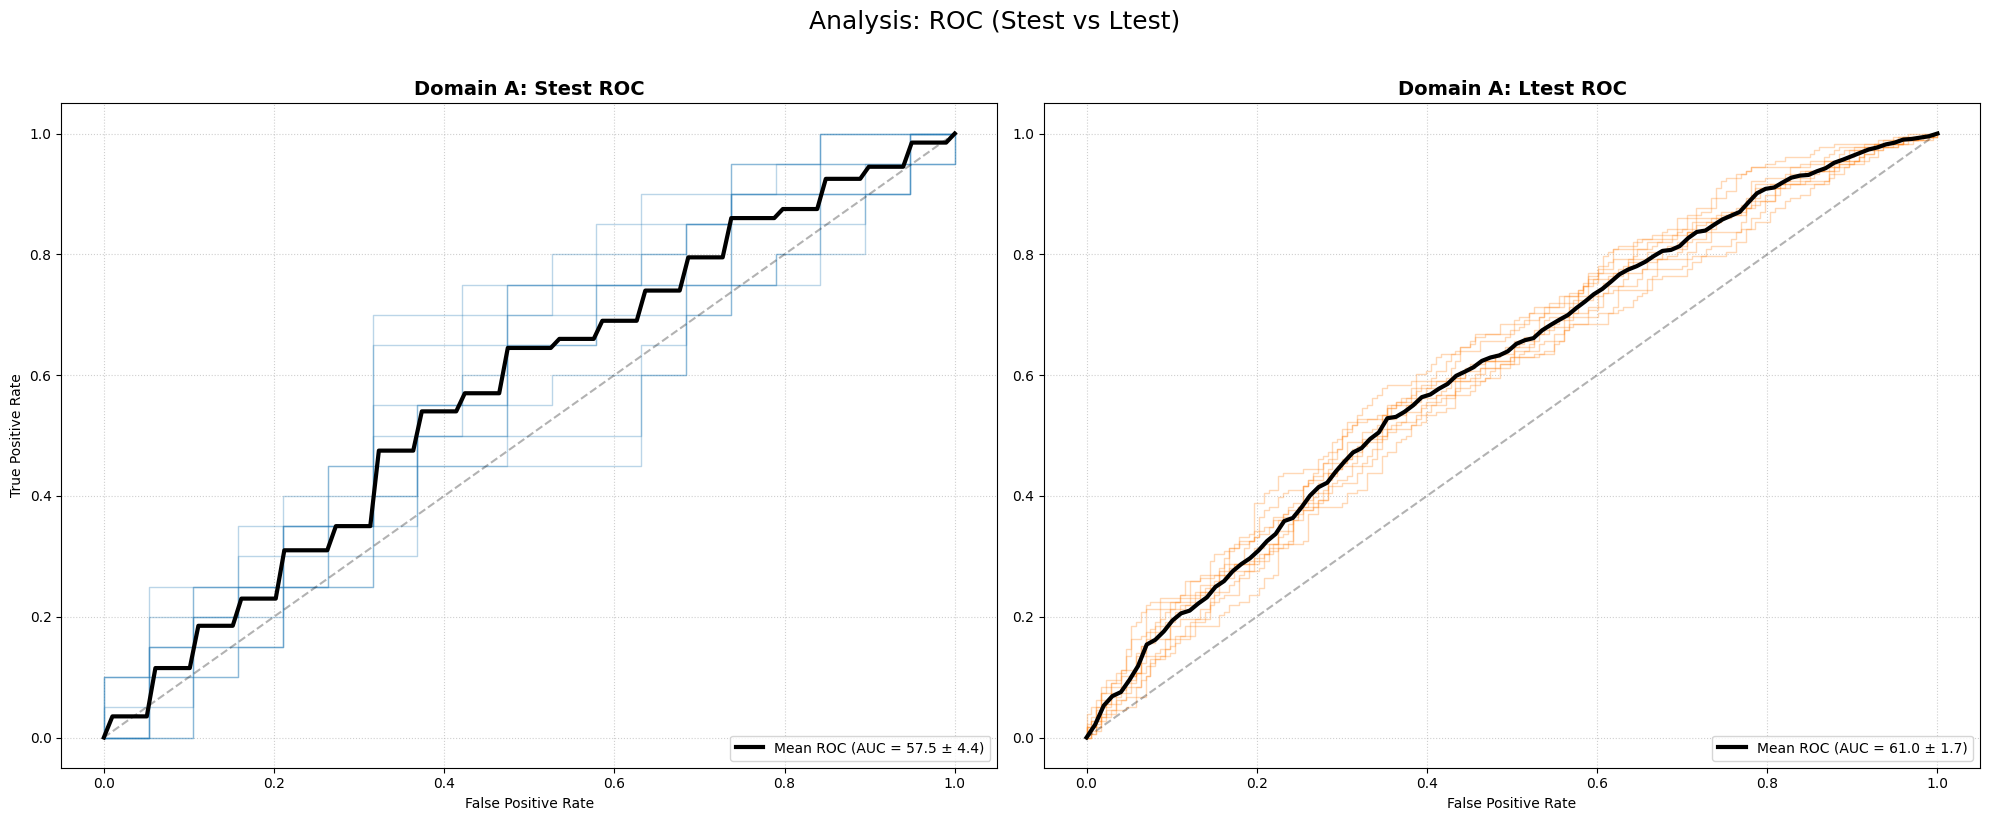

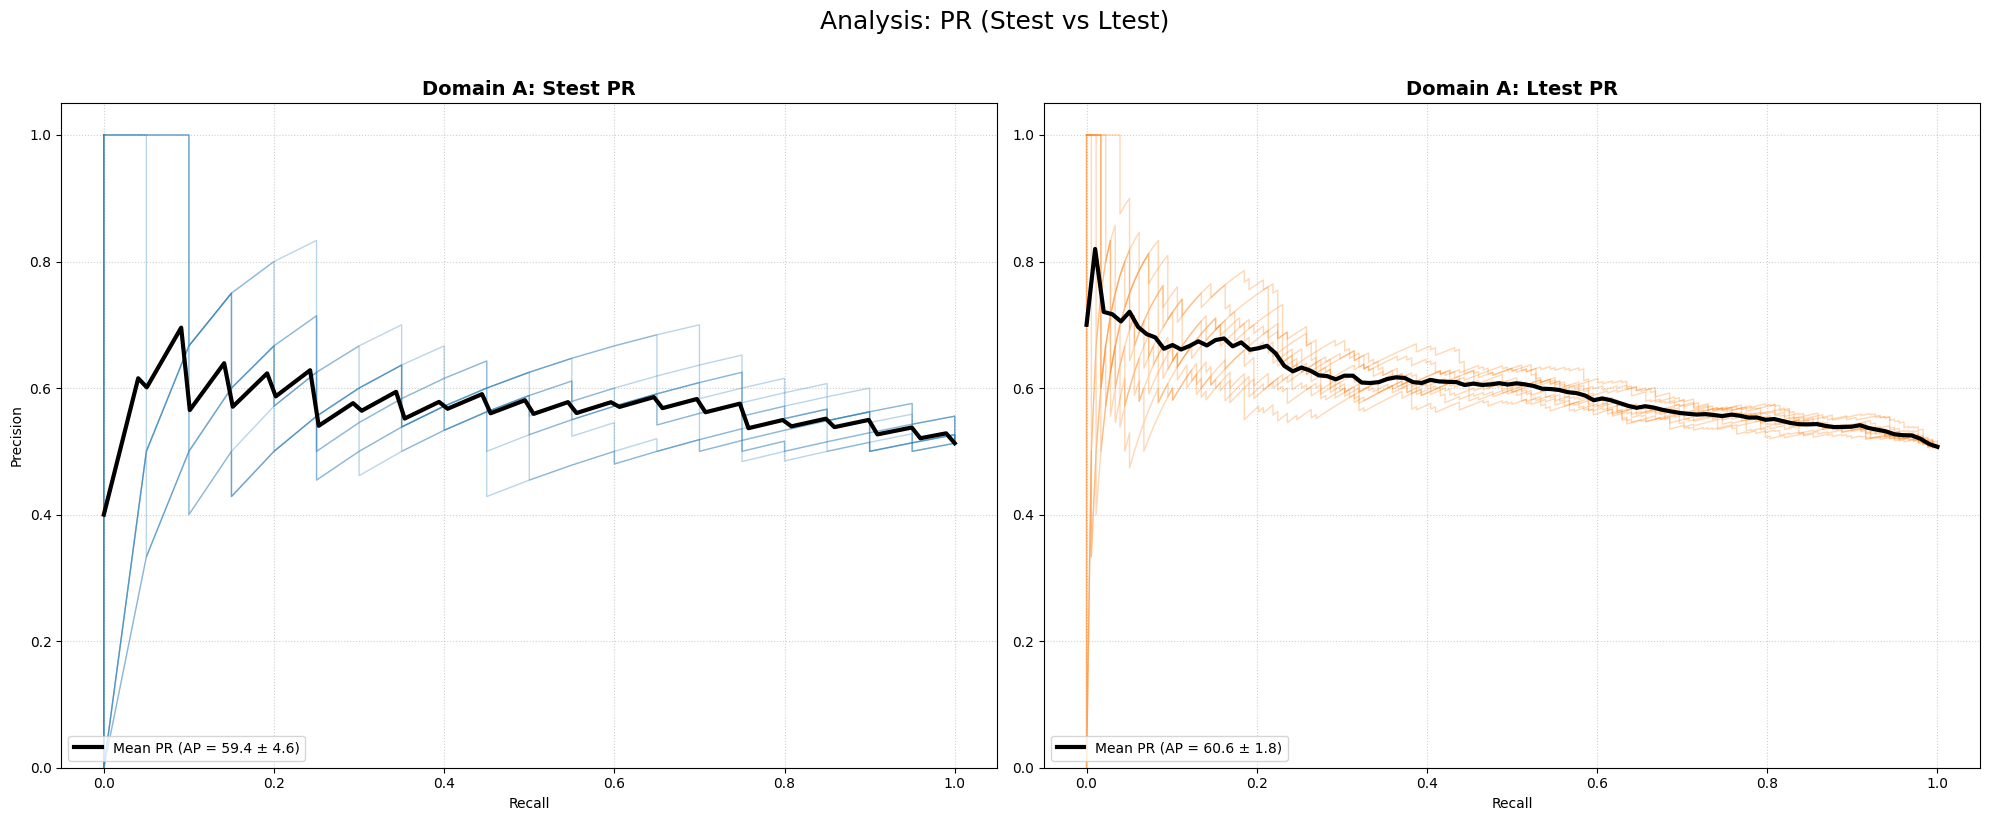

In [19]:
import matplotlib.pyplot as plt

def plot_cv_comparison(metric_type='ROC'):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Configuration
    colors = {'Stest': '#1f77b4', 'Ltest': '#ff7f0e'}
    
    for i, t_type in enumerate(['Stest', 'Ltest']):
        ax = axes[i]
        
        # Plot individual thin lines
        for f in fold_results_nn_A:
            if metric_type == 'ROC':
                ax.plot(f[f'fpr_nn_A_reduced_{t_type}'], f[f'tpr_nn_A_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)
            else:
                ax.plot(f[f'recall_nn_A_reduced_{t_type}'], f[f'precision_nn_A_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)

        # Plot the thick Mean Curve
        if metric_type == 'ROC':
            m_tpr = mean_tpr_Stest if t_type == 'Stest' else mean_tpr_Ltest
            m_auc = mean_auc_Stest if t_type == 'Stest' else mean_auc_Ltest
            s_auc = std_auc_Stest if t_type == 'Stest' else std_auc_Ltest
            ax.plot(mean_fpr, m_tpr, color='black', lw=3, label=f'Mean ROC (AUC = {m_auc:.1f} ± {s_auc:.1f})')
            ax.plot([0, 1], [0, 1], 'k--', alpha=0.3)
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate' if i==0 else "")
        else:
            m_prec = mean_precision_Stest if t_type == 'Stest' else mean_precision_Ltest
            m_ap = mean_ap_Stest if t_type == 'Stest' else mean_ap_Ltest
            s_ap = std_ap_Stest if t_type == 'Stest' else std_ap_Ltest
            ax.plot(mean_recall, m_prec, color='black', lw=3, label=f'Mean PR (AP = {m_ap:.1f} ± {s_ap:.1f})')
            ax.set_xlabel('Recall')
            ax.set_ylabel('Precision' if i==0 else "")
            ax.set_ylim([0, 1.05])

        ax.set_title(f'Domain A: {t_type} {metric_type}', fontsize=14, fontweight='bold')
        ax.legend(loc='lower right' if metric_type=='ROC' else 'lower left')
        ax.grid(True, linestyle=':', alpha=0.6)

    plt.suptitle(f'Analysis: {metric_type} (Stest vs Ltest)', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# Run both
plot_cv_comparison(metric_type='ROC')
plot_cv_comparison(metric_type='PR')

In [20]:
np.savez(
    'mean_baseline_A_cancer.npz',

    # Scalars
    mean_auc_Stest=mean_auc_Stest,
    std_auc_Stest=std_auc_Stest,
    mean_auc_Ltest=mean_auc_Ltest,
    std_auc_Ltest=std_auc_Ltest,

    mean_ap_Stest=mean_ap_Stest,
    std_ap_Stest=std_ap_Stest,
    mean_ap_Ltest=mean_ap_Ltest,
    std_ap_Ltest=std_ap_Ltest,

    # Curves
    mean_fpr=mean_fpr,
    mean_recall=mean_recall,
    mean_tpr_Stest=mean_tpr_Stest,
    mean_tpr_Ltest=mean_tpr_Ltest,
    mean_precision_Stest=mean_precision_Stest,
    mean_precision_Ltest=mean_precision_Ltest,
)


### Dual Branch: Dataset B reduced

#### Architecture

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_dual_branch_nn(common_dim, specific_dim,learning_rate):

    """
    # Common branch 
    common_input = Input(shape=(common_dim,), name='common_input')
    x_common = layers.Dense(256, activation='relu')(common_input)
    x_common = layers.Dense(128, activation='relu')(x_common)
    x_common = layers.Dense(64, activation='relu')(x_common)

    #Specific branch
    specific_input = Input(shape=(specific_dim,), name='specific_input')
    x_spec = layers.Dense(256, activation='relu')(specific_input)
    x_spec = layers.Dense(128, activation='relu')(x_spec)
    x_spec = layers.Dense(64, activation='relu')(x_spec)
    """
    # Common branch 
    common_input = Input(shape=(common_dim,), name='common_input')
    x_common = layers.Dense(256, activation='relu')(common_input)
    x_common = layers.Dense(128, activation='relu')(x_common)
    x_common = layers.Dropout(0.2)(x_common)
    x_common = layers.Dense(64, activation='relu')(x_common)

    #Specific branch
    specific_input = Input(shape=(specific_dim,), name='specific_input')
    x_spec = layers.Dense(64, activation='relu')(specific_input)
    x_spec = layers.Dense(32, activation='relu')(x_spec)



    # --- Concatenate ---
    x = layers.Concatenate(name='concat')([x_common, x_spec])
    output = layers.Dense(2, activation='softmax', name='output')(x)

    # --- Model ---
    model = models.Model(inputs=[common_input, specific_input], outputs=output)

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['AUC', 'Precision', 'Recall']
    )
    return model


#### Training

In [17]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import keras
from tensorflow.keras.utils import to_categorical

learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Initialize the 10-Fold Splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#  Containers for summary metrics and full curve data
fold_results_nn_B = []



for i, (big_fold_idx, fold_idx) in enumerate(skf.split(dfB_filtered, dfB_filtered['mortality_1yr'])):
    if i >= 10: # Stop after index 9 (which is the 10th fold)
        break
    print("Fold",i)
    # 1. Take the 10% fold as our current 'dfB_reduced'
    dfB_reduced = dfB_filtered.iloc[fold_idx].copy()
    
    # 2. Basic feature extraction
    id_columns_B = dfB_reduced[['subject_id', 'hadm_id']].copy()
    X_common = dfB_reduced.drop(columns=set_B_attributes + ['mortality_1yr', 'subject_id', 'hadm_id']).copy()
    X_spec = dfB_reduced[set_B_attributes].copy()
    y = dfB_reduced['mortality_1yr'].copy()

    X_common_train, X_common_test, X_spec_train, X_spec_test, y_train, y_test, id_train, id_test = train_test_split(
        X_common, X_spec, y, id_columns_B,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
    y_train_encoded = to_categorical(y_train)



    
    for lr in learning_rates:
        model=build_dual_branch_nn(common_dim=X_common.shape[1], specific_dim=X_spec.shape[1], learning_rate=lr)
        
        
        
        history = model.fit(
            [X_common_train, X_spec_train], y_train_encoded,
            epochs=6,
            batch_size=16,
            validation_split=0.2,
            #callbacks=[early_stopping],
            verbose=0
        )
        

        final_val_auc = max(history.history['val_AUC'])
        histories[lr] = history
        
        if final_val_auc > best_auc:
            best_auc = final_val_auc
            best_model = model
            best_lr= lr



    #TESTING Stest

    y_proba = best_model.predict([X_common_test, X_spec_test])[:, 1]  # flatten (n,1) → (n,)

    # === Get true labels ===
    if y_test.ndim > 1 and y_test.shape[1] > 1:
        y_true = np.argmax(y_test, axis=1)
    else:
        y_true = y_test

    fpr_nn_B_reduced_Stest, tpr_nn_B_reduced_Stest, thresholds_roc_nn_B_reduced_Stest = roc_curve(y_true, y_proba)

    # Compute AUC
    roc_auc_nn_B_reduced_Stest = auc(fpr_nn_B_reduced_Stest, tpr_nn_B_reduced_Stest)

    # Compute PR curve
    precision_nn_B_reduced_Stest, recall_nn_B_reduced_Stest, thresholds_pr_nn_B_reduced_Stest = precision_recall_curve(y_true, y_proba)

    # Compute average precision score (area under PR curve)
    avg_precision_nn_B_reduced_Stest = average_precision_score(y_true, y_proba)


    #=============Ltest=================
    dfB_rest= dfB_filtered.iloc[big_fold_idx].copy()
    id_columns= dfB_rest[['subject_id', 'hadm_id']]
    X_common = dfB_rest.drop(columns=set_B_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
    X_spec = dfB_rest[set_B_attributes]
    y= dfB_rest['mortality_1yr']


    X_common_train, X_common_test, X_spec_train, X_spec_test, y_train, y_test, id_train, id_test = train_test_split(
        X_common, X_spec, y, id_columns,
        test_size=0.2,
        random_state=42,
        stratify=y
    )



    y_proba = best_model.predict([X_common_test, X_spec_test])[:, 1]  # flatten (n,1) → (n,)

    # === Get true labels ===
    if y_test.ndim > 1 and y_test.shape[1] > 1:
        y_true = np.argmax(y_test, axis=1)
    else:
        y_true = y_test


    # Compute ROC curve
    fpr_nn_B_reduced_Ltest, tpr_nn_B_reduced_Ltest, thresholds_roc_nn_B_reduced_Ltest = roc_curve(y_true, y_proba)

    # Compute AUC
    roc_auc_nn_B_reduced_Ltest = auc(fpr_nn_B_reduced_Ltest, tpr_nn_B_reduced_Ltest)

    # Compute PR curve
    precision_nn_B_reduced_Ltest, recall_nn_B_reduced_Ltest, thresholds_pr_nn_B_reduced_Ltest = precision_recall_curve(y_true, y_proba)

    # Compute average precision score (area under PR curve)
    avg_precision_nn_B_reduced_Ltest = average_precision_score(y_true, y_proba)

    print("\tAUC\tAP")
    print(f"Stest\t{roc_auc_nn_B_reduced_Stest:.2f}\t{avg_precision_nn_B_reduced_Stest:.2f}")
    print(f"Ltest\t{roc_auc_nn_B_reduced_Ltest:.2f}\t{avg_precision_nn_B_reduced_Ltest:.2f}")



    # Store all specific metrics and arrays into a dictionary for this fold
    current_fold_metrics = {
        'fold_index': i + 1,
        
        # ROC AUC - Stest
        'fpr_nn_B_reduced_Stest': fpr_nn_B_reduced_Stest,
        'tpr_nn_B_reduced_Stest': tpr_nn_B_reduced_Stest,
        'thresholds_roc_nn_B_reduced_Stest': thresholds_roc_nn_B_reduced_Stest,
        'roc_auc_nn_B_reduced_Stest': roc_auc_nn_B_reduced_Stest,
        
        # PR - Stest
        'precision_nn_B_reduced_Stest': precision_nn_B_reduced_Stest,
        'recall_nn_B_reduced_Stest': recall_nn_B_reduced_Stest,
        'thresholds_pr_nn_B_reduced_Stest': thresholds_pr_nn_B_reduced_Stest,
        'avg_precision_nn_B_reduced_Stest': avg_precision_nn_B_reduced_Stest,

        # ROC AUC - Ltest
        'fpr_nn_B_reduced_Ltest': fpr_nn_B_reduced_Ltest,
        'tpr_nn_B_reduced_Ltest': tpr_nn_B_reduced_Ltest,
        'thresholds_roc_nn_B_reduced_Ltest': thresholds_roc_nn_B_reduced_Ltest,
        'roc_auc_nn_B_reduced_Ltest': roc_auc_nn_B_reduced_Ltest,

        # PR - Ltest
        'precision_nn_B_reduced_Ltest': precision_nn_B_reduced_Ltest,
        'recall_nn_B_reduced_Ltest': recall_nn_B_reduced_Ltest,
        'thresholds_pr_nn_B_reduced_Ltest': thresholds_pr_nn_B_reduced_Ltest,
        'avg_precision_nn_B_reduced_Ltest': avg_precision_nn_B_reduced_Ltest
    }
    fold_results_nn_B.append(current_fold_metrics)

print("\n Neural Network Benchmarking Complete.")


Fold 0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.51	0.54
Ltest	0.56	0.59
Fold 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.62	0.61
Ltest	0.54	0.56
Fold 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.47	0.55
Ltest	0.55	0.56
Fold 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
	AUC	AP
Stest	0.70	0.68
Ltest	0.55	0.57
Fold 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
	AUC	AP
Stest	0.59	0.63
Ltest	0.55	0.57
Fold 5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
	AUC	AP
Stest	0.57	0.56
Ltest	0.65	0.63
Fold 6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
	AUC	AP
Stest	0.64	0.71
Ltest	0.65	0.65
Fold 7
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
	AUC	AP
Stest	0.60	0.60
Ltest	0.59	0.62

#### Results

In [18]:
import numpy as np

# --- 1. Average Scalars (AUC & AP) ---
auc_Stest = [f['roc_auc_nn_B_reduced_Stest'] for f in fold_results_nn_B]
ap_Stest  = [f['avg_precision_nn_B_reduced_Stest'] for f in fold_results_nn_B]
auc_Ltest = [f['roc_auc_nn_B_reduced_Ltest'] for f in fold_results_nn_B]
ap_Ltest  = [f['avg_precision_nn_B_reduced_Ltest'] for f in fold_results_nn_B]

mean_auc_Stest, std_auc_Stest = np.mean(auc_Stest)*100, np.std(auc_Stest)*100
mean_auc_Ltest, std_auc_Ltest = np.mean(auc_Ltest)*100, np.std(auc_Ltest)*100
mean_ap_Stest, std_ap_Stest   = np.mean(ap_Stest)*100, np.std(ap_Stest)*100
mean_ap_Ltest, std_ap_Ltest   = np.mean(ap_Ltest)*100, np.std(ap_Ltest)*100

# --- 2. Average Arrays (Interpolation) ---
# Define common grids (the X-axes)
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)

tprs_Stest = []
precisions_Stest = []
tprs_Ltest = []
precisions_Ltest = []

for f in fold_results_nn_B:
    # --- Stest Interpolation ---
    tprs_Stest.append(np.interp(mean_fpr, f['fpr_nn_B_reduced_Stest'], f['tpr_nn_B_reduced_Stest']))
    tprs_Stest[-1][0] = 0.0
    
    # PR interpolation: Recall must be increasing for np.interp
    precisions_Stest.append(np.interp(mean_recall, f['recall_nn_B_reduced_Stest'][::-1], f['precision_nn_B_reduced_Stest'][::-1]))

    # --- Ltest Interpolation ---
    tprs_Ltest.append(np.interp(mean_fpr, f['fpr_nn_B_reduced_Ltest'], f['tpr_nn_B_reduced_Ltest']))
    tprs_Ltest[-1][0] = 0.0
    
    precisions_Ltest.append(np.interp(mean_recall, f['recall_nn_B_reduced_Ltest'][::-1], f['precision_nn_B_reduced_Ltest'][::-1]))

# Calculate Final Mean Curves
mean_tpr_Stest = np.mean(tprs_Stest, axis=0)
mean_tpr_Stest[-1] = 1.0
mean_precision_Stest = np.mean(precisions_Stest, axis=0)

mean_tpr_Ltest = np.mean(tprs_Ltest, axis=0)
mean_tpr_Ltest[-1] = 1.0
mean_precision_Ltest = np.mean(precisions_Ltest, axis=0)


print("Means ± Std [%]")
print("\tAUC\t\tAP")
print(f"Stest\t{mean_auc_Stest:.1f} ± {std_auc_Stest:.1f}\t{mean_ap_Stest:.1f} ± {std_ap_Stest:.1f}")
print(f"Ltest\t{mean_auc_Ltest:.1f} ± {std_auc_Ltest:.1f}\t{mean_ap_Ltest:.1f} ± {std_ap_Ltest:.1f}")


Means ± Std [%]
	AUC		AP
Stest	59.6 ± 6.2	61.7 ± 5.5
Ltest	59.2 ± 4.5	60.8 ± 4.0


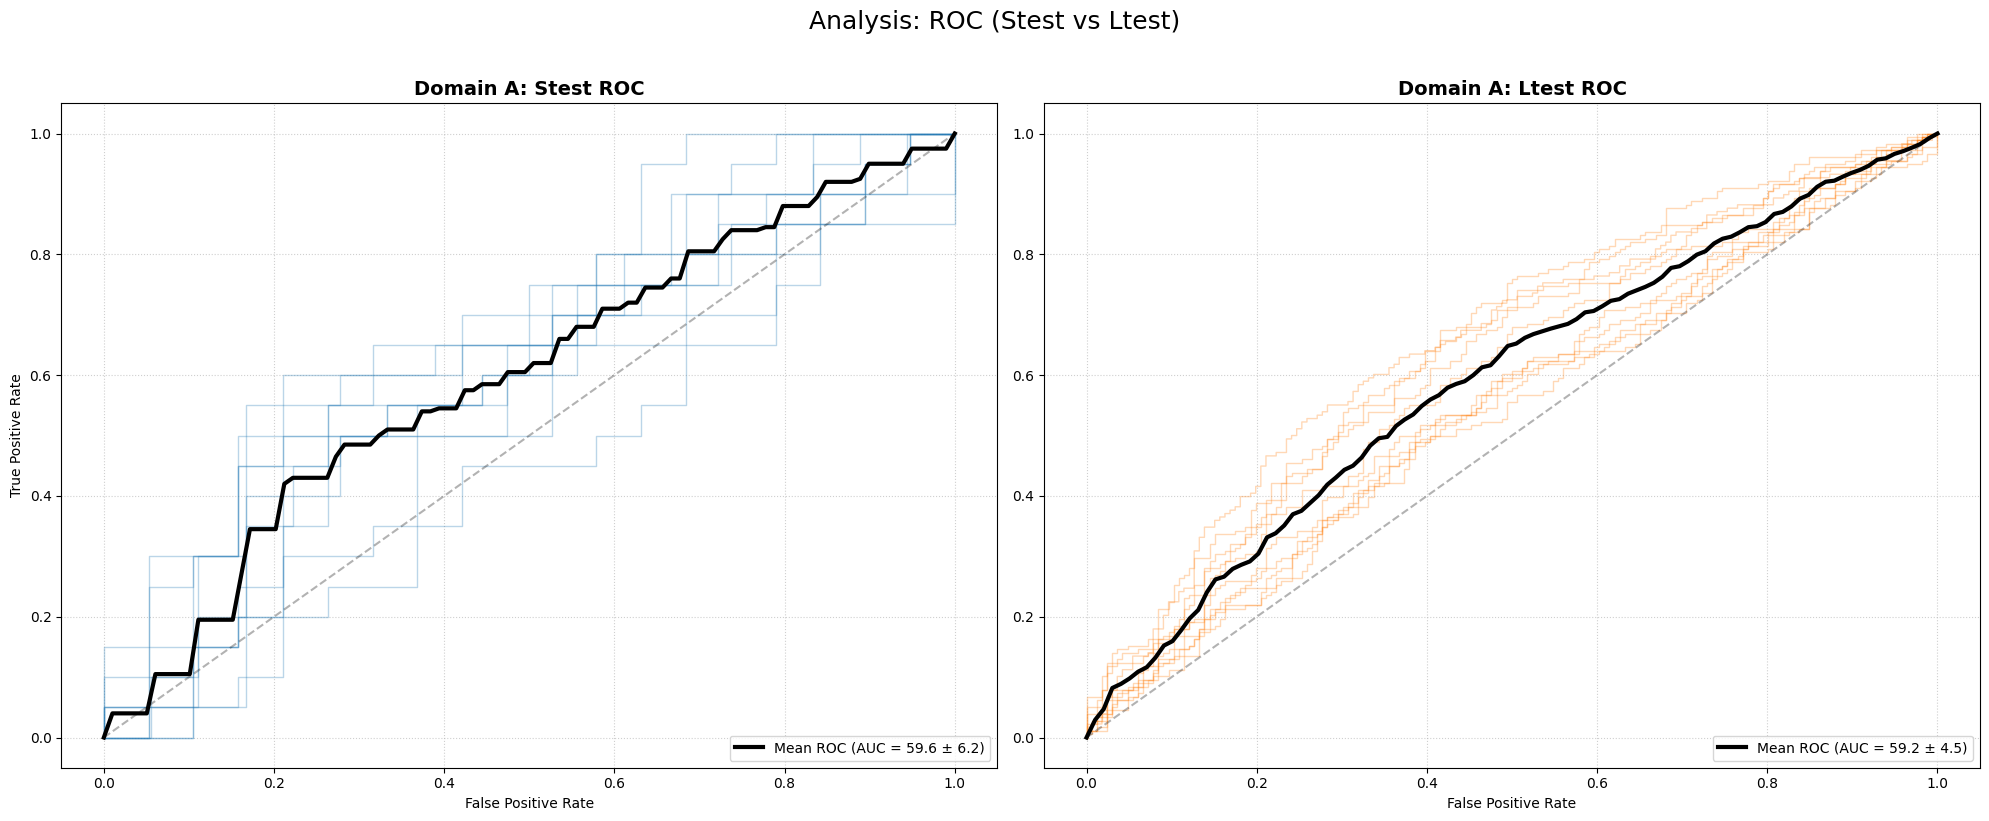

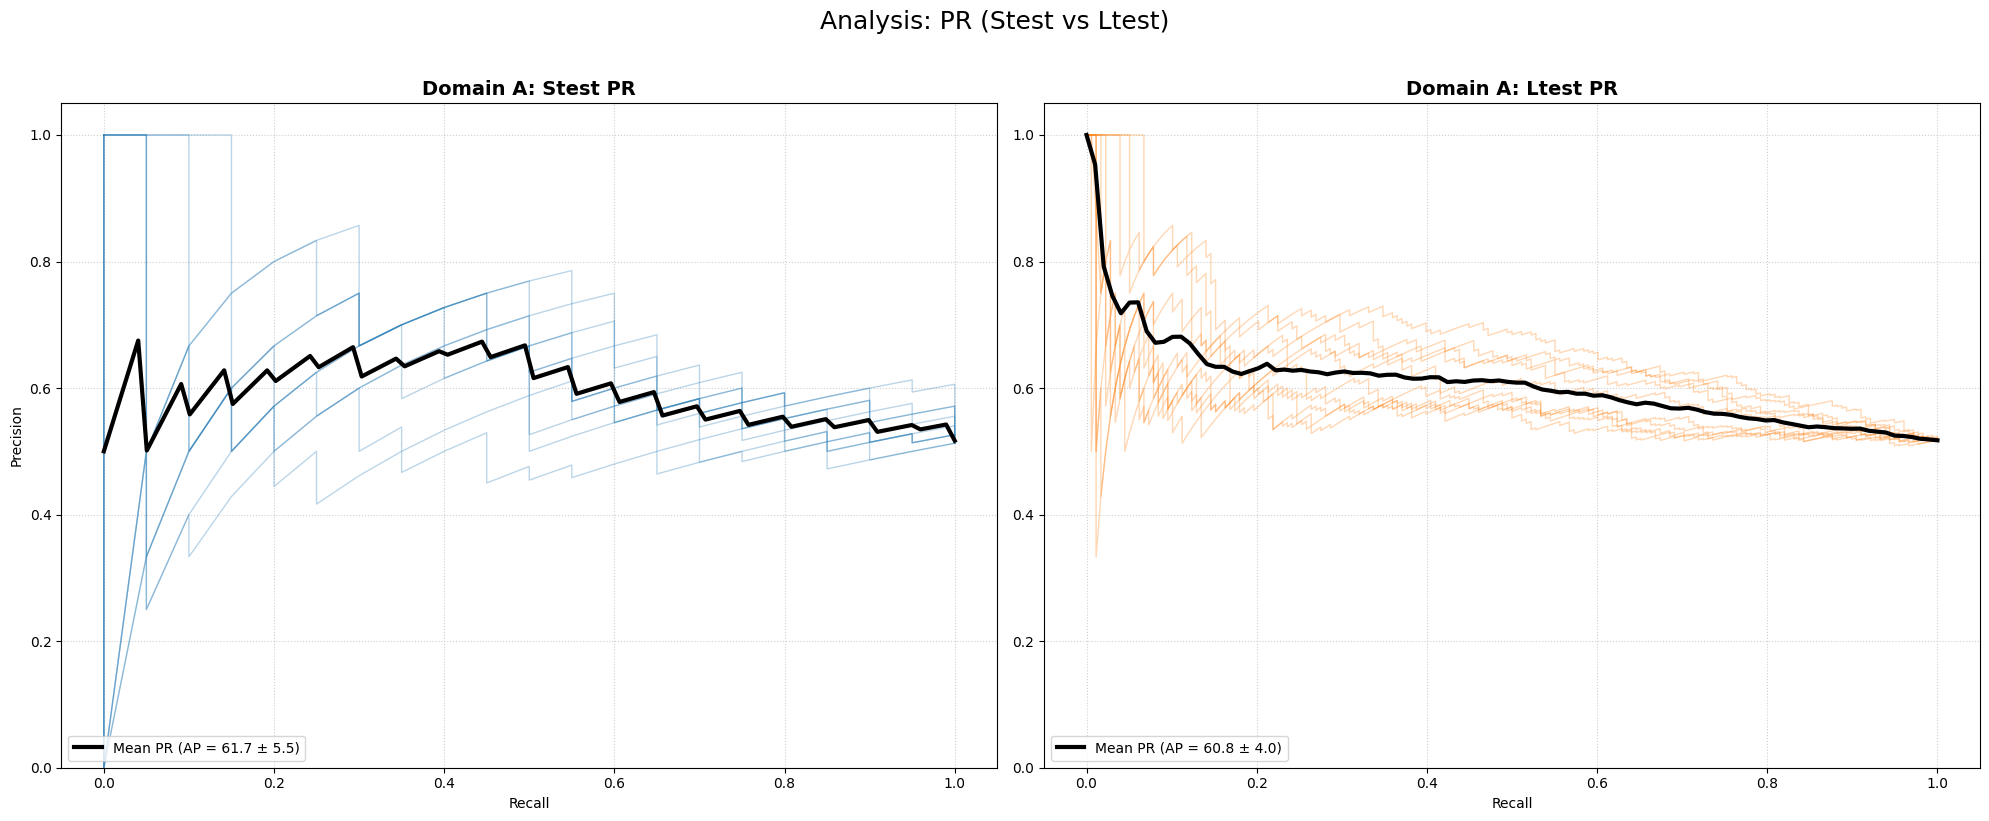

In [19]:
import matplotlib.pyplot as plt

def plot_cv_comparison(metric_type='ROC'):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Configuration
    colors = {'Stest': '#1f77b4', 'Ltest': '#ff7f0e'}
    
    for i, t_type in enumerate(['Stest', 'Ltest']):
        ax = axes[i]
        
        # Plot individual thin lines
        for f in fold_results_nn_B:
            if metric_type == 'ROC':
                ax.plot(f[f'fpr_nn_B_reduced_{t_type}'], f[f'tpr_nn_B_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)
            else:
                ax.plot(f[f'recall_nn_B_reduced_{t_type}'], f[f'precision_nn_B_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)

        # Plot the thick Mean Curve
        if metric_type == 'ROC':
            m_tpr = mean_tpr_Stest if t_type == 'Stest' else mean_tpr_Ltest
            m_auc = mean_auc_Stest if t_type == 'Stest' else mean_auc_Ltest
            s_auc = std_auc_Stest if t_type == 'Stest' else std_auc_Ltest
            ax.plot(mean_fpr, m_tpr, color='black', lw=3, label=f'Mean ROC (AUC = {m_auc:.1f} ± {s_auc:.1f})')
            ax.plot([0, 1], [0, 1], 'k--', alpha=0.3)
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate' if i==0 else "")
        else:
            m_prec = mean_precision_Stest if t_type == 'Stest' else mean_precision_Ltest
            m_ap = mean_ap_Stest if t_type == 'Stest' else mean_ap_Ltest
            s_ap = std_ap_Stest if t_type == 'Stest' else std_ap_Ltest
            ax.plot(mean_recall, m_prec, color='black', lw=3, label=f'Mean PR (AP = {m_ap:.1f} ± {s_ap:.1f})')
            ax.set_xlabel('Recall')
            ax.set_ylabel('Precision' if i==0 else "")
            ax.set_ylim([0, 1.05])

        ax.set_title(f'Domain A: {t_type} {metric_type}', fontsize=14, fontweight='bold')
        ax.legend(loc='lower right' if metric_type=='ROC' else 'lower left')
        ax.grid(True, linestyle=':', alpha=0.6)

    plt.suptitle(f'Analysis: {metric_type} (Stest vs Ltest)', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# Run both
plot_cv_comparison(metric_type='ROC')
plot_cv_comparison(metric_type='PR')

In [20]:
np.savez(
    'mean_baseline_B_cancer.npz',

    # Scalars
    mean_auc_Stest=mean_auc_Stest,
    std_auc_Stest=std_auc_Stest,
    mean_auc_Ltest=mean_auc_Ltest,
    std_auc_Ltest=std_auc_Ltest,

    mean_ap_Stest=mean_ap_Stest,
    std_ap_Stest=std_ap_Stest,
    mean_ap_Ltest=mean_ap_Ltest,
    std_ap_Ltest=std_ap_Ltest,

    # Curves
    mean_fpr=mean_fpr,
    mean_recall=mean_recall,
    mean_tpr_Stest=mean_tpr_Stest,
    mean_tpr_Ltest=mean_tpr_Ltest,
    mean_precision_Stest=mean_precision_Stest,
    mean_precision_Ltest=mean_precision_Ltest,
)

### Both Datasets (A reduced): shared and private encoder

#### Architecture

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras import layers, models, regularizers

def build_improved_dsn2(common_dim, specific_dim_A, specific_dim_B, learning_rate):
    
    # 1. Improved Shared Encoder with BatchNormalization
    def shared_encoder_block():
        inputs = Input(shape=(common_dim,))
        
        # Layer 1: Wider, with light L2 to keep weights small
        x = layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(1e-4))(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Dropout(0.3)(x)
        
        # Layer 2: Bottlenecking
        x = layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        
        # Output latent representation
        out = layers.Dense(64, activation='relu')(x)
        return models.Model(inputs, out, name="shared_encoder")

    shared_encoder = shared_encoder_block()

    # 2. Private Encoders
    def private_encoder(input_dim, name):
        inputs = Input(shape=(input_dim,))
        x = layers.Dense(128, activation='relu')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(64, activation='relu')(x)
        return models.Model(inputs, x, name=name)

    private_A = private_encoder(specific_dim_A, "private_A")
    private_B = private_encoder(specific_dim_B, "private_B")

    # --- Inputs ---
    input_common_A = Input(shape=(common_dim,), name='X_common_A')
    input_spec_A   = Input(shape=(specific_dim_A,), name='X_spec_A')
    input_common_B = Input(shape=(common_dim,), name='X_common_B')
    input_spec_B   = Input(shape=(specific_dim_B,), name='X_spec_B')

    # --- Forward pass ---
    h_common_A = shared_encoder(input_common_A)
    h_common_B = shared_encoder(input_common_B)

    h_spec_A = private_A(input_spec_A)
    h_spec_B = private_B(input_spec_B)

    # --- Concatenation + Dense Layer before Softmax ---
    # Adding one more layer after concatenation helps the model "fuse" the shared/private info
    def classifier_head(h_shared, h_private, name):
        concat = layers.Concatenate()([h_shared, h_private])
        x = layers.Dense(64, activation='relu')(concat)
        x = layers.Dropout(0.2)(x)
        return layers.Dense(2, activation='softmax', name=name)(x)

    y_A = classifier_head(h_common_A, h_spec_A, "y_A")
    y_B = classifier_head(h_common_B, h_spec_B, "y_B")

    model = models.Model(
        inputs=[input_common_A, input_spec_A, input_common_B, input_spec_B],
        outputs=[y_A, y_B]
    )

    # --- Compile ---
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss={
            "y_A": tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
            "y_B": tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
        },
        metrics={
            "y_A": [AUC(name='AUC_A'), Precision(name='Precision_A'), Recall(name='Recall_A')],
            "y_B": [AUC(name='AUC_B'), Precision(name='Precision_B'), Recall(name='Recall_B')]
        }
    )

    return model

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_improved_dsn(common_dim, specific_dim_A, specific_dim_B, learning_rate):
    
    # 1. Improved Shared Encoder with BatchNormalization
    def shared_encoder_block():
        inputs = Input(shape=(common_dim,))
        x = layers.Dense(256)(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Dropout(0.3)(x)
        
        x = layers.Dense(128)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        
        # Output latent representation
        out = layers.Dense(64, activation='relu')(x)
        return models.Model(inputs, out, name="shared_encoder")

    shared_encoder = shared_encoder_block()

    # 2. Private Encoders
    def private_encoder(input_dim, name):
        inputs = Input(shape=(input_dim,))
        x = layers.Dense(128, activation='relu')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(64, activation='relu')(x)
        return models.Model(inputs, x, name=name)

    private_A = private_encoder(specific_dim_A, "private_A")
    private_B = private_encoder(specific_dim_B, "private_B")

    # --- Inputs ---
    input_common_A = Input(shape=(common_dim,), name='X_common_A')
    input_spec_A   = Input(shape=(specific_dim_A,), name='X_spec_A')
    input_common_B = Input(shape=(common_dim,), name='X_common_B')
    input_spec_B   = Input(shape=(specific_dim_B,), name='X_spec_B')

    # --- Forward pass ---
    h_common_A = shared_encoder(input_common_A)
    h_common_B = shared_encoder(input_common_B)

    h_spec_A = private_A(input_spec_A)
    h_spec_B = private_B(input_spec_B)

    # --- Concatenation + Dense Layer before Softmax ---
    # Adding one more layer after concatenation helps the model "fuse" the shared/private info
    def classifier_head(h_shared, h_private, name):
        concat = layers.Concatenate()([h_shared, h_private])
        x = layers.Dense(64, activation='relu')(concat)
        x = layers.Dropout(0.2)(x)
        return layers.Dense(2, activation='softmax', name=name)(x)

    y_A = classifier_head(h_common_A, h_spec_A, "y_A")
    y_B = classifier_head(h_common_B, h_spec_B, "y_B")

    model = models.Model(
        inputs=[input_common_A, input_spec_A, input_common_B, input_spec_B],
        outputs=[y_A, y_B]
    )

    # --- Compile ---
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss={
            "y_A": "categorical_crossentropy",
            "y_B": "categorical_crossentropy"
        },
        metrics={
            "y_A": [AUC(name='AUC_A'), Precision(name='Precision_A'), Recall(name='Recall_A')],
            "y_B": [AUC(name='AUC_B'), Precision(name='Precision_B'), Recall(name='Recall_B')]
        }
    )

    return model

In [23]:

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_nn_with_shared_encoder_for_common(common_dim, specific_dim_A, specific_dim_B, learning_rate):
    # --- Shared encoder for common features (shared weights) ---
    def shared_encoder_block():
        model = models.Sequential(name="shared_encoder")
        model.add(layers.Dense(256, activation='relu'))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Dense(64, activation='relu'))
        return model

    shared_encoder = shared_encoder_block()

    # --- Private encoders (independent architectures) ---
    def private_encoder_blockA(input_dim, name):
        model = models.Sequential(name=name)
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(32, activation='relu'))
        return model
    
    def private_encoder_blockB(input_dim, name):
        model = models.Sequential(name=name)
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Dense(64, activation='relu'))
        return model
    

    private_A = private_encoder_blockA(specific_dim_A, "private_A")
    private_B = private_encoder_blockB(specific_dim_B, "private_B")

    # --- Inputs ---
    X_common_A = Input(shape=(common_dim,), name='X_common_A')
    X_spec_A   = Input(shape=(specific_dim_A,), name='X_spec_A')
    X_common_B = Input(shape=(common_dim,), name='X_common_B')
    X_spec_B   = Input(shape=(specific_dim_B,), name='X_spec_B')

    # --- Forward passes ---
    h_common_A = shared_encoder(X_common_A)
    h_common_B = shared_encoder(X_common_B)  # shared weights

    h_spec_A = private_A(X_spec_A)
    h_spec_B = private_B(X_spec_B)

    # --- Concatenate ---
    h_concat_A = layers.Concatenate(name='concat_A')([h_common_A, h_spec_A])
    h_concat_B = layers.Concatenate(name='concat_B')([h_common_B, h_spec_B])

    # --- Domain-specific classifiers ---
    y_A = layers.Dense(2, activation='softmax', name='y_A')(h_concat_A)
    y_B = layers.Dense(2, activation='softmax', name='y_B')(h_concat_B)

    # --- Build model ---
    model = models.Model(
        inputs=[X_common_A, X_spec_A, X_common_B, X_spec_B],
        outputs=[y_A, y_B],
        name="nn_with_shared_encoder_for_common"
    )

    # --- Compile ---
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss={
            "y_A": "categorical_crossentropy",
            "y_B": "categorical_crossentropy"
        },
        metrics={
            "y_A": [AUC(name='AUC_A'), Precision(name='Precision_A'), Recall(name='Recall_A')],
            "y_B": [AUC(name='AUC_B'), Precision(name='Precision_B'), Recall(name='Recall_B')]
        }
    )

    return model



#### Training

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

id_columns_B = dfB[['subject_id', 'hadm_id']]
X_common_B = dfB.drop(columns=set_B_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
X_spec_B = dfB[set_B_attributes]
y_B = dfB['mortality_1yr']


X_common_train_B, X_common_test_B, X_spec_train_B, X_spec_test_B, y_train_B, y_test_B, id_train_B, id_test_B = train_test_split(
    X_common_B, X_spec_B, y_B, id_columns_B,
    test_size=0.4,
    random_state=42,
    stratify=y_B
)

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded_B = to_categorical(y_train_B)

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import keras

learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Initialize the 10-Fold Splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#  Containers for summary metrics and full curve data
fold_results_A = []



for i, (big_fold_idx, fold_idx) in enumerate(skf.split(dfA_filtered, dfA_filtered['mortality_1yr'])):
    if i >= 10: # Stop after index 9 (which is the 10th fold)
        break
    print("Fold",i)
    # 1. Take the 10% fold as our current 'dfA_reduced'
    dfA_reduced = dfA_filtered.iloc[fold_idx].copy()
    
    # 2. Basic feature extraction
    id_columns_A = dfA_reduced[['subject_id', 'hadm_id']].copy()
    X_common_A = dfA_reduced.drop(columns=set_A_attributes + ['mortality_1yr', 'subject_id', 'hadm_id']).copy()
    X_spec_A = dfA_reduced[set_A_attributes].copy()
    y_A = dfA_reduced['mortality_1yr'].copy()

    # 3. Internal Train/Test Split (80/20) for this fold
    X_common_train_A, X_common_test_A, \
    X_spec_train_A, X_spec_test_A, \
    y_train_A, y_test_A, \
    id_train_A, id_test_A = train_test_split(
        X_common_A, X_spec_A, y_A, id_columns_A,
        test_size=0.2,
        random_state=42,
        stratify=y_A
    )

    # 4. One-hot encode labels
    y_train_encoded_A = to_categorical(y_train_A)



    # 1. Combine A's features and labels to keep them aligned
    train_A_temp = pd.concat([X_common_train_A, X_spec_train_A], axis=1)
    train_A_temp['target'] = np.argmax(y_train_encoded_A, axis=1) # Convert one-hot to 1D

    # 2. Set the target size (matching Dataset B)
    target_size = len(X_common_train_B) 

    # 3. Stratified Loop: Repeat rows for each class (0 and 1) separately
    oversampled_chunks = []
    for label in [0, 1]:
        # Get all rows belonging to this class
        class_subset = train_A_temp[train_A_temp['target'] == label]
        
        # Calculate how many rows this class needs in the final dataset 
        # (keeps the same % of 0s and 1s as the original small set)
        class_fraction = len(class_subset) / len(train_A_temp)
        n_samples_needed = int(target_size * class_fraction)
        
        # The actual "repeating" happens here
        resampled_chunk = resample(
            class_subset, 
            replace=True,          # Allow repeating rows
            n_samples=n_samples_needed, 
            random_state=42
        )
        oversampled_chunks.append(resampled_chunk)

    # 4. Combine chunks and shuffle
    df_A_os = pd.concat(oversampled_chunks).sample(frac=1, random_state=42)

    # 5. Split back into the original variables for the NN
    X_common_train_A_os = df_A_os[X_common_train_A.columns]
    X_spec_train_A_os = df_A_os[X_spec_train_A.columns]
    y_train_encoded_A_os = to_categorical(df_A_os['target'])

    # --- Final Padding Check ---
    # If rounding caused A to be slightly shorter than B (e.g., 11631 vs 11632)
    diff = len(X_common_train_B) - len(X_common_train_A_os)
    if diff > 0:
        X_common_train_A_os = pd.concat([X_common_train_A_os, X_common_train_A_os.iloc[:diff]], axis=0)
        X_spec_train_A_os = pd.concat([X_spec_train_A_os, X_spec_train_A_os.iloc[:diff]], axis=0)
        y_train_encoded_A_os = np.vstack([y_train_encoded_A_os, y_train_encoded_A_os[:diff]])

    #print(f"Original A: {len(X_common_train_A)} rows")
    #print(f"Oversampled A: {len(X_common_train_A_os)} rows (Matches B: {len(X_common_train_B)})")


    # Train
    for lr in learning_rates:
        keras.backend.clear_session()
        #print(f"\n Training model with learning rate: {lr}")
        model=build_improved_dsn(common_dim=X_common_A.shape[1], specific_dim_A=X_spec_A.shape[1],specific_dim_B=X_spec_B.shape[1], learning_rate=lr)



        early_stop = tf.keras.callbacks.EarlyStopping(
            monitor='val_y_A_AUC_A', 
            mode='max', 
            patience=3, 
            restore_best_weights=True  
        )
        lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_y_A_loss', 
            factor=0.2, 
            patience=2, 
            min_lr=1e-6,
            verbose=0
        )
        
        history = model.fit(
            x={
                "X_common_A": X_common_train_A_os, # USE OVERSAMPLED
                "X_spec_A": X_spec_train_A_os,     # USE OVERSAMPLED
                "X_common_B": X_common_train_B,
                "X_spec_B": X_spec_train_B,
            },
            y={
                "y_A": y_train_encoded_A_os,       # USE OVERSAMPLED
                "y_B": y_train_encoded_B,
            },
            epochs=6,
            batch_size=16,
            validation_split=0.2,
            #callbacks=[lr_reducer],# early_stop],
            verbose=0
        )

        final_val_auc = max(history.history['val_y_A_AUC_A'])
        


        histories[lr] = history
        
        if final_val_auc > best_auc:
            best_auc = final_val_auc
            best_model = model
            best_lr= lr
    print("Training completed.")
    # Plotting
    #for lr, hist in histories.items():
    #   plot_history(hist, lr)
    # We use the actual size of A 

    

    #TESTING

    num_A = X_common_test_A.shape[0] 

    y_pred_list_A = best_model.predict({
        "X_common_A": X_common_test_A,
        "X_spec_A": X_spec_test_A,
        # Create dummies that are ONLY 146 rows long to match A
        "X_common_B": np.zeros((num_A, X_common_B.shape[1])),
        "X_spec_B": np.zeros((num_A, X_spec_B.shape[1]))
    }, verbose=0)

    # We take index 0 because that is the output for y_A
    y_proba_shared_A = y_pred_list_A[0][:, 1]



    # Add this right before your "Get true labels" section to avoid attribute errors
    y_test_A_np = np.array(y_test_A)
    y_test_B_np = np.array(y_test_B)

    if y_test_A_np.ndim > 1 and y_test_A_np.shape[1] > 1:
        y_true_shared_A = np.argmax(y_test_A_np, axis=1)
    else:
        y_true_shared_A = y_test_A_np



    #ROC AUC
    fpr_shared_A_reduced_Stest, tpr_shared_A_reduced_Stest, thresholds_roc_shared_A_reduced_Stest = roc_curve(y_true_shared_A, y_proba_shared_A)
    roc_auc_shared_A_reduced_Stest = auc(fpr_shared_A_reduced_Stest, tpr_shared_A_reduced_Stest)
    # PR
    precision_shared_A_reduced_Stest, recall_shared_A_reduced_Stest, thresholds_pr_shared_A_reduced_Stest = precision_recall_curve(y_true_shared_A, y_proba_shared_A)
    avg_precision_shared_A_reduced_Stest = average_precision_score(y_true_shared_A, y_proba_shared_A)

    #Ltest
    dfA_rest= dfA_filtered.iloc[big_fold_idx].copy()
    id_columns_A = dfA_rest[['subject_id', 'hadm_id']]
    X_common_A = dfA_rest.drop(columns=set_A_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
    X_spec_A = dfA_rest[set_A_attributes]
    y_A = dfA_rest['mortality_1yr']


    X_common_train_A, X_common_test_A, X_spec_train_A, X_spec_test_A, y_train_A, y_test_A, id_train_A, id_test_A = train_test_split(
        X_common_A, X_spec_A, y_A, id_columns_A,
        test_size=0.5,
        random_state=42,
        stratify=y_A
    )
    # We use the actual size of A 
    num_A = X_common_test_A.shape[0] 

    y_pred_list_A = best_model.predict({
        "X_common_A": X_common_test_A,
        "X_spec_A": X_spec_test_A,
        # Create dummies that are ONLY 146 rows long to match A
        "X_common_B": np.zeros((num_A, X_common_B.shape[1])),
        "X_spec_B": np.zeros((num_A, X_spec_B.shape[1]))
    }, verbose=0)

    # We take index 0 because that is the output for y_A
    y_proba_shared_A = y_pred_list_A[0][:, 1]



    # Add this right before your "Get true labels" section to avoid attribute errors
    y_test_A_np = np.array(y_test_A)
    y_test_B_np = np.array(y_test_B)

    if y_test_A_np.ndim > 1 and y_test_A_np.shape[1] > 1:
        y_true_shared_A = np.argmax(y_test_A_np, axis=1)
    else:
        y_true_shared_A = y_test_A_np

    
    # ROC
    fpr_shared_A_reduced_Ltest, tpr_shared_A_reduced_Ltest, thresholds_roc_shared_A_reduced_Ltest = roc_curve(y_true_shared_A, y_proba_shared_A)
    roc_auc_shared_A_reduced_Ltest = auc(fpr_shared_A_reduced_Ltest, tpr_shared_A_reduced_Ltest)

    # PR
    precision_shared_A_reduced_Ltest, recall_shared_A_reduced_Ltest, thresholds_pr_shared_A_reduced_Ltest = precision_recall_curve(y_true_shared_A, y_proba_shared_A)
    avg_precision_shared_A_reduced_Ltest = average_precision_score(y_true_shared_A, y_proba_shared_A)

    print("\tAUC\tAP")
    print(f"Stest\t{roc_auc_shared_A_reduced_Stest:.2f}\t{avg_precision_shared_A_reduced_Stest:.2f}")
    print(f"Ltest\t{roc_auc_shared_A_reduced_Ltest:.2f}\t{avg_precision_shared_A_reduced_Ltest:.2f}")



    # Store all specific metrics and arrays into a dictionary for this fold
    current_fold_metrics = {
        'fold_index': i + 1,
        
        # ROC AUC - Stest
        'fpr_shared_A_reduced_Stest': fpr_shared_A_reduced_Stest,
        'tpr_shared_A_reduced_Stest': tpr_shared_A_reduced_Stest,
        'thresholds_roc_shared_A_reduced_Stest': thresholds_roc_shared_A_reduced_Stest,
        'roc_auc_shared_A_reduced_Stest': roc_auc_shared_A_reduced_Stest,
        
        # PR - Stest
        'precision_shared_A_reduced_Stest': precision_shared_A_reduced_Stest,
        'recall_shared_A_reduced_Stest': recall_shared_A_reduced_Stest,
        'thresholds_pr_shared_A_reduced_Stest': thresholds_pr_shared_A_reduced_Stest,
        'avg_precision_shared_A_reduced_Stest': avg_precision_shared_A_reduced_Stest,

        # ROC AUC - Ltest
        'fpr_shared_A_reduced_Ltest': fpr_shared_A_reduced_Ltest,
        'tpr_shared_A_reduced_Ltest': tpr_shared_A_reduced_Ltest,
        'thresholds_roc_shared_A_reduced_Ltest': thresholds_roc_shared_A_reduced_Ltest,
        'roc_auc_shared_A_reduced_Ltest': roc_auc_shared_A_reduced_Ltest,

        # PR - Ltest
        'precision_shared_A_reduced_Ltest': precision_shared_A_reduced_Ltest,
        'recall_shared_A_reduced_Ltest': recall_shared_A_reduced_Ltest,
        'thresholds_pr_shared_A_reduced_Ltest': thresholds_pr_shared_A_reduced_Ltest,
        'avg_precision_shared_A_reduced_Ltest': avg_precision_shared_A_reduced_Ltest
    }

    # Append the dictionary to the list
    fold_results_A.append(current_fold_metrics)




Fold 0
Training completed.
	AUC	AP
Stest	0.59	0.64
Ltest	0.56	0.57
Fold 1
Training completed.
	AUC	AP
Stest	0.71	0.78
Ltest	0.62	0.61
Fold 2
Training completed.
	AUC	AP
Stest	0.53	0.56
Ltest	0.61	0.59
Fold 3
Training completed.
	AUC	AP
Stest	0.63	0.60
Ltest	0.69	0.67
Fold 4
Training completed.
	AUC	AP
Stest	0.79	0.78
Ltest	0.69	0.66
Fold 5
Training completed.
	AUC	AP
Stest	0.52	0.55
Ltest	0.67	0.65
Fold 6
Training completed.
	AUC	AP
Stest	0.58	0.55
Ltest	0.70	0.66
Fold 7
Training completed.
	AUC	AP
Stest	0.54	0.59
Ltest	0.68	0.66
Fold 8
Training completed.
	AUC	AP
Stest	0.84	0.79
Ltest	0.67	0.65
Fold 9
Training completed.
	AUC	AP
Stest	0.73	0.74
Ltest	0.70	0.69


#### Results

In [26]:
import numpy as np

# --- 1. Average Scalars (AUC & AP) ---
auc_Stest = [f['roc_auc_shared_A_reduced_Stest'] for f in fold_results_A]
ap_Stest  = [f['avg_precision_shared_A_reduced_Stest'] for f in fold_results_A]
auc_Ltest = [f['roc_auc_shared_A_reduced_Ltest'] for f in fold_results_A]
ap_Ltest  = [f['avg_precision_shared_A_reduced_Ltest'] for f in fold_results_A]

mean_auc_Stest, std_auc_Stest = np.mean(auc_Stest)*100, np.std(auc_Stest)*100
mean_auc_Ltest, std_auc_Ltest = np.mean(auc_Ltest)*100, np.std(auc_Ltest)*100
mean_ap_Stest, std_ap_Stest   = np.mean(ap_Stest)*100, np.std(ap_Stest)*100
mean_ap_Ltest, std_ap_Ltest   = np.mean(ap_Ltest)*100, np.std(ap_Ltest)*100

# --- 2. Average Arrays (Interpolation) ---
# Define common grids (the X-axes)
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)

tprs_Stest = []
precisions_Stest = []
tprs_Ltest = []
precisions_Ltest = []

for f in fold_results_A:
    # --- Stest Interpolation ---
    tprs_Stest.append(np.interp(mean_fpr, f['fpr_shared_A_reduced_Stest'], f['tpr_shared_A_reduced_Stest']))
    tprs_Stest[-1][0] = 0.0
    
    # PR interpolation: Recall must be increasing for np.interp
    precisions_Stest.append(np.interp(mean_recall, f['recall_shared_A_reduced_Stest'][::-1], f['precision_shared_A_reduced_Stest'][::-1]))

    # --- Ltest Interpolation ---
    tprs_Ltest.append(np.interp(mean_fpr, f['fpr_shared_A_reduced_Ltest'], f['tpr_shared_A_reduced_Ltest']))
    tprs_Ltest[-1][0] = 0.0
    
    precisions_Ltest.append(np.interp(mean_recall, f['recall_shared_A_reduced_Ltest'][::-1], f['precision_shared_A_reduced_Ltest'][::-1]))

# Calculate Final Mean Curves
mean_tpr_Stest = np.mean(tprs_Stest, axis=0)
mean_tpr_Stest[-1] = 1.0
mean_precision_Stest = np.mean(precisions_Stest, axis=0)

mean_tpr_Ltest = np.mean(tprs_Ltest, axis=0)
mean_tpr_Ltest[-1] = 1.0
mean_precision_Ltest = np.mean(precisions_Ltest, axis=0)


print("Means ± Std [%]")
print("\tAUC\t\tAP")
print(f"Stest\t{mean_auc_Stest:.1f} ± {std_auc_Stest:.1f}\t{mean_ap_Stest:.1f} ± {std_ap_Stest:.1f}")
print(f"Ltest\t{mean_auc_Ltest:.1f} ± {std_auc_Ltest:.1f}\t{mean_ap_Ltest:.1f} ± {std_ap_Ltest:.1f}")


Means ± Std [%]
	AUC		AP
Stest	64.6 ± 10.7	65.8 ± 9.7
Ltest	65.9 ± 4.3	64.1 ± 3.7


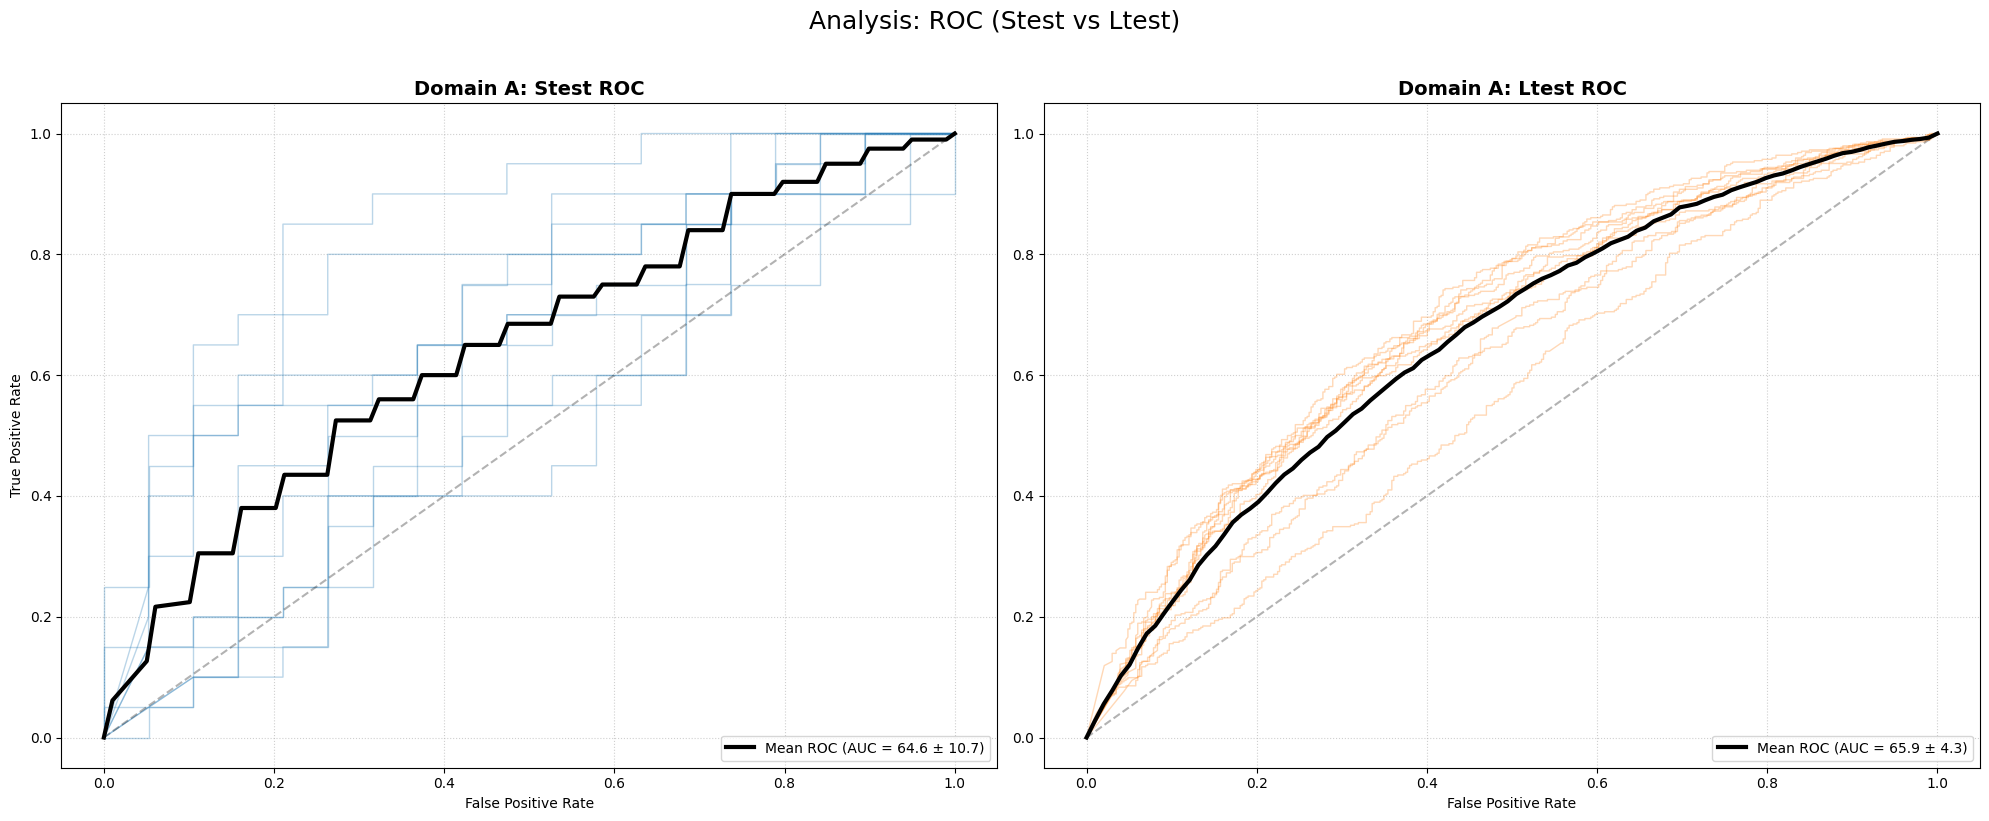

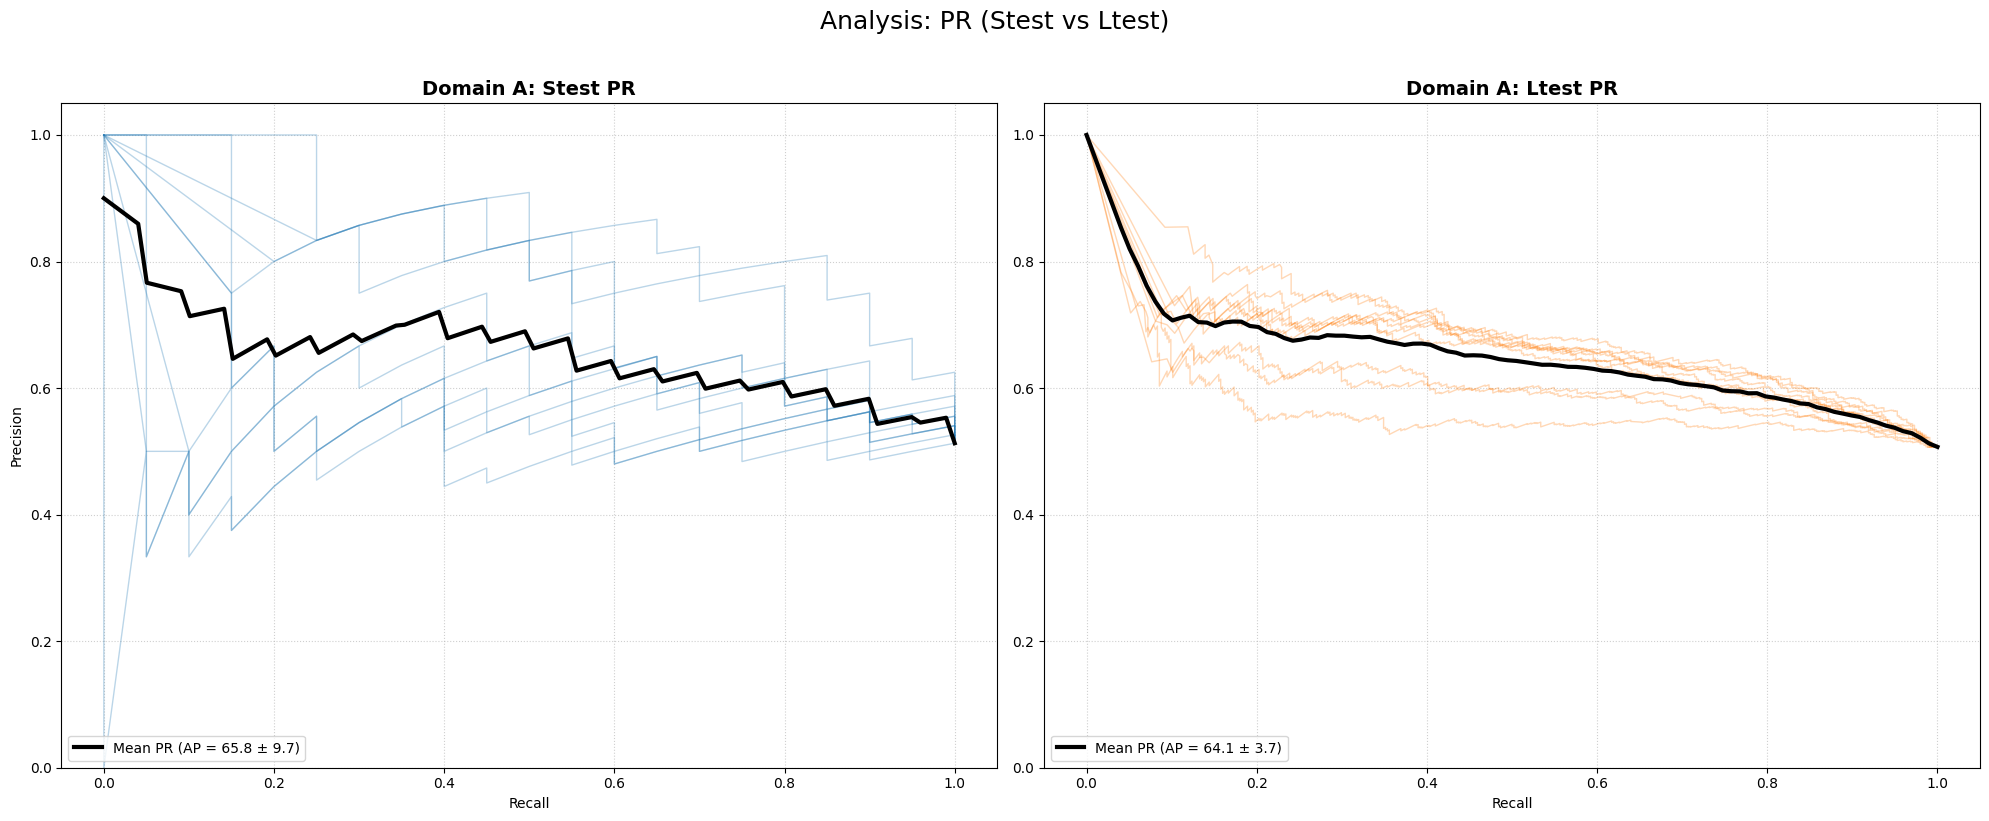

In [27]:
import matplotlib.pyplot as plt

def plot_cv_comparison(metric_type='ROC'):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Configuration
    colors = {'Stest': '#1f77b4', 'Ltest': '#ff7f0e'}
    
    for i, t_type in enumerate(['Stest', 'Ltest']):
        ax = axes[i]
        
        # Plot individual thin lines
        for f in fold_results_A:
            if metric_type == 'ROC':
                ax.plot(f[f'fpr_shared_A_reduced_{t_type}'], f[f'tpr_shared_A_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)
            else:
                ax.plot(f[f'recall_shared_A_reduced_{t_type}'], f[f'precision_shared_A_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)

        # Plot the thick Mean Curve
        if metric_type == 'ROC':
            m_tpr = mean_tpr_Stest if t_type == 'Stest' else mean_tpr_Ltest
            m_auc = mean_auc_Stest if t_type == 'Stest' else mean_auc_Ltest
            s_auc = std_auc_Stest if t_type == 'Stest' else std_auc_Ltest
            ax.plot(mean_fpr, m_tpr, color='black', lw=3, label=f'Mean ROC (AUC = {m_auc:.1f} ± {s_auc:.1f})')
            ax.plot([0, 1], [0, 1], 'k--', alpha=0.3)
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate' if i==0 else "")
        else:
            m_prec = mean_precision_Stest if t_type == 'Stest' else mean_precision_Ltest
            m_ap = mean_ap_Stest if t_type == 'Stest' else mean_ap_Ltest
            s_ap = std_ap_Stest if t_type == 'Stest' else std_ap_Ltest
            ax.plot(mean_recall, m_prec, color='black', lw=3, label=f'Mean PR (AP = {m_ap:.1f} ± {s_ap:.1f})')
            ax.set_xlabel('Recall')
            ax.set_ylabel('Precision' if i==0 else "")
            ax.set_ylim([0, 1.05])

        ax.set_title(f'Domain A: {t_type} {metric_type}', fontsize=14, fontweight='bold')
        ax.legend(loc='lower right' if metric_type=='ROC' else 'lower left')
        ax.grid(True, linestyle=':', alpha=0.6)

    plt.suptitle(f'Analysis: {metric_type} (Stest vs Ltest)', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# Run both
plot_cv_comparison(metric_type='ROC')
plot_cv_comparison(metric_type='PR')

In [28]:
np.savez(
    'mean_shared_A_cancer.npz',

    # Scalars
    mean_auc_Stest=mean_auc_Stest,
    std_auc_Stest=std_auc_Stest,
    mean_auc_Ltest=mean_auc_Ltest,
    std_auc_Ltest=std_auc_Ltest,

    mean_ap_Stest=mean_ap_Stest,
    std_ap_Stest=std_ap_Stest,
    mean_ap_Ltest=mean_ap_Ltest,
    std_ap_Ltest=std_ap_Ltest,

    # Curves
    mean_fpr=mean_fpr,
    mean_recall=mean_recall,
    mean_tpr_Stest=mean_tpr_Stest,
    mean_tpr_Ltest=mean_tpr_Ltest,
    mean_precision_Stest=mean_precision_Stest,
    mean_precision_Ltest=mean_precision_Ltest,
)


### Both Datasets (B reduced): shared and private encoder

#### Architecture

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_nn_with_shared_encoder_for_common(common_dim, specific_dim_A, specific_dim_B, learning_rate):
    # --- Shared encoder for common features (shared weights) ---
    def shared_encoder_block():
        model = models.Sequential(name="shared_encoder")
        model.add(layers.Dense(256, activation='relu'))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Dense(64, activation='relu'))
        return model

    shared_encoder = shared_encoder_block()

    def private_encoder_blockB(input_dim, name):
        model = models.Sequential(name=name)
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dense(32, activation='relu'))
        return model
    
    def private_encoder_blockA(input_dim, name):
        model = models.Sequential(name=name)
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Dense(64, activation='relu'))
        return model


    private_A = private_encoder_blockA(specific_dim_A, "private_A")
    private_B = private_encoder_blockB(specific_dim_B, "private_B")

    # --- Inputs ---
    X_common_A = Input(shape=(common_dim,), name='X_common_A')
    X_spec_A   = Input(shape=(specific_dim_A,), name='X_spec_A')
    X_common_B = Input(shape=(common_dim,), name='X_common_B')
    X_spec_B   = Input(shape=(specific_dim_B,), name='X_spec_B')

    # --- Forward passes ---
    h_common_A = shared_encoder(X_common_A)
    h_common_B = shared_encoder(X_common_B)  # shared weights

    h_spec_A = private_A(X_spec_A)
    h_spec_B = private_B(X_spec_B)

    # --- Concatenate ---
    h_concat_A = layers.Concatenate(name='concat_A')([h_common_A, h_spec_A])
    h_concat_B = layers.Concatenate(name='concat_B')([h_common_B, h_spec_B])

    # --- Domain-specific classifiers ---
    y_A = layers.Dense(2, activation='softmax', name='y_A')(h_concat_A)
    y_B = layers.Dense(2, activation='softmax', name='y_B')(h_concat_B)

    # --- Build model ---
    model = models.Model(
        inputs=[X_common_A, X_spec_A, X_common_B, X_spec_B],
        outputs=[y_A, y_B],
        name="nn_with_shared_encoder_for_common"
    )

    # --- Compile ---
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss={
            "y_A": "categorical_crossentropy",
            "y_B": "categorical_crossentropy"
        },
        metrics={
            "y_A": [AUC(name='AUC_A'), Precision(name='Precision_A'), Recall(name='Recall_A')],
            "y_B": [AUC(name='AUC_B'), Precision(name='Precision_B'), Recall(name='Recall_B')]
        }
    )

    return model


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_improved_dsn(common_dim, specific_dim_A, specific_dim_B, learning_rate):
    
    # 1. Improved Shared Encoder with BatchNormalization
    def shared_encoder_block():
        inputs = Input(shape=(common_dim,))
        x = layers.Dense(256)(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Dropout(0.3)(x)
        
        x = layers.Dense(128)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        
        # Output latent representation
        out = layers.Dense(64, activation='relu')(x)
        return models.Model(inputs, out, name="shared_encoder")

    shared_encoder = shared_encoder_block()

    # 2. Private Encoders
    def private_encoder(input_dim, name):
        inputs = Input(shape=(input_dim,))
        x = layers.Dense(128, activation='relu')(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(64, activation='relu')(x)
        return models.Model(inputs, x, name=name)

    private_A = private_encoder(specific_dim_A, "private_A")
    private_B = private_encoder(specific_dim_B, "private_B")

    # --- Inputs ---
    input_common_A = Input(shape=(common_dim,), name='X_common_A')
    input_spec_A   = Input(shape=(specific_dim_A,), name='X_spec_A')
    input_common_B = Input(shape=(common_dim,), name='X_common_B')
    input_spec_B   = Input(shape=(specific_dim_B,), name='X_spec_B')

    # --- Forward pass ---
    h_common_A = shared_encoder(input_common_A)
    h_common_B = shared_encoder(input_common_B)

    h_spec_A = private_A(input_spec_A)
    h_spec_B = private_B(input_spec_B)

    # --- Concatenation + Dense Layer before Softmax ---
    # Adding one more layer after concatenation helps the model "fuse" the shared/private info
    def classifier_head(h_shared, h_private, name):
        concat = layers.Concatenate()([h_shared, h_private])
        x = layers.Dense(64, activation='relu')(concat)
        x = layers.Dropout(0.2)(x)
        return layers.Dense(2, activation='softmax', name=name)(x)

    y_A = classifier_head(h_common_A, h_spec_A, "y_A")
    y_B = classifier_head(h_common_B, h_spec_B, "y_B")

    model = models.Model(
        inputs=[input_common_A, input_spec_A, input_common_B, input_spec_B],
        outputs=[y_A, y_B]
    )

    # --- Compile ---
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss={
            "y_A": "categorical_crossentropy",
            "y_B": "categorical_crossentropy"
        },
        metrics={
            "y_A": [AUC(name='AUC_A'), Precision(name='Precision_A'), Recall(name='Recall_A')],
            "y_B": [AUC(name='AUC_B'), Precision(name='Precision_B'), Recall(name='Recall_B')]
        }
    )

    return model

#### Training

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

id_columns_A = dfA[['subject_id', 'hadm_id']]
X_common_A = dfA.drop(columns=set_A_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
X_spec_A = dfA[set_A_attributes]
y_A = dfA['mortality_1yr']


X_common_train_A, X_common_test_A, X_spec_train_A, X_spec_test_A, y_train_A, y_test_A, id_train_A, id_test_A = train_test_split(
    X_common_A, X_spec_A, y_A, id_columns_A,
    test_size=0.2,
    random_state=42,
    stratify=y_A
)

# One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
y_train_encoded_A = to_categorical(y_train_A)

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

learning_rates = [0.01, 0.001,0.0001]
best_auc = 0
best_model = None
best_lr = None
histories = {}

# Initialize the 10-Fold Splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#  Containers for summary metrics and full curve data
fold_results_B = []



for i, (big_fold_idx, fold_idx) in enumerate(skf.split(dfB_filtered, dfB_filtered['mortality_1yr'])):
    if i >= 10: # Stop after index 9 (which is the 10th fold)
        break
    print("Fold",i)
    # 1. Take the 10% fold as our current 'dfB_reduced'
    dfB_reduced = dfB_filtered.iloc[fold_idx].copy()
    
    # 2. Basic feature extraction
    id_columns_B = dfB_reduced[['subject_id', 'hadm_id']].copy()
    X_common_B = dfB_reduced.drop(columns=set_B_attributes + ['mortality_1yr', 'subject_id', 'hadm_id']).copy()
    X_spec_B = dfB_reduced[set_B_attributes].copy()
    y_B = dfB_reduced['mortality_1yr'].copy()

    # 3. Internal Train/Test Split (80/20) for this fold
    X_common_train_B, X_common_test_B, \
    X_spec_train_B, X_spec_test_B, \
    y_train_B, y_test_B, \
    id_train_B, id_test_B = train_test_split(
        X_common_B, X_spec_B, y_B, id_columns_B,
        test_size=0.2,
        random_state=42,
        stratify=y_B
    )

    # 4. One-hot encode labels
    y_train_encoded_B = to_categorical(y_train_B)



    # 1. Combine A's features and labels to keep them aligned
    train_B_temp = pd.concat([X_common_train_B, X_spec_train_B], axis=1)
    train_B_temp['target'] = np.argmax(y_train_encoded_B, axis=1) # Convert one-hot to 1D

    # 2. Set the target size (matching Dataset B)
    target_size = len(X_common_train_A) 

    # 3. Stratified Loop: Repeat rows for each class (0 and 1) separately
    oversampled_chunks = []
    for label in [0, 1]:
        # Get all rows belonging to this class
        class_subset = train_B_temp[train_B_temp['target'] == label]
        
        # Calculate how many rows this class needs in the final dataset 
        # (keeps the same % of 0s and 1s as the original small set)
        class_fraction = len(class_subset) / len(train_B_temp)
        n_samples_needed = int(target_size * class_fraction)
        
        # The actual "repeating" happens here
        resampled_chunk = resample(
            class_subset, 
            replace=True,          # Allow repeating rows
            n_samples=n_samples_needed, 
            random_state=42
        )
        oversampled_chunks.append(resampled_chunk)

    # 4. Combine chunks and shuffle
    df_B_os = pd.concat(oversampled_chunks).sample(frac=1, random_state=42)

    # 5. Split back into the original variables for the NN
    X_common_train_B_os = df_B_os[X_common_train_B.columns]
    X_spec_train_B_os = df_B_os[X_spec_train_B.columns]
    y_train_encoded_B_os = to_categorical(df_B_os['target'])

    # --- Final Padding Check ---
    # If rounding caused A to be slightly shorter than B (e.g., 11631 vs 11632)
    diff = len(X_common_train_A) - len(X_common_train_B_os)
    if diff > 0:
        X_common_train_B_os = pd.concat([X_common_train_B_os, X_common_train_B_os.iloc[:diff]], axis=0)
        X_spec_train_B_os = pd.concat([X_spec_train_B_os, X_spec_train_B_os.iloc[:diff]], axis=0)
        y_train_encoded_B_os = np.vstack([y_train_encoded_B_os, y_train_encoded_B_os[:diff]])


    # Train
    for lr in learning_rates:
        #print(f"\n Training model with learning rate: {lr}")
        model=build_improved_dsn(common_dim=X_common_A.shape[1], specific_dim_A=X_spec_A.shape[1],specific_dim_B=X_spec_B.shape[1], learning_rate=lr)
        
        
        
        history = model.fit(
            x={
                "X_common_B": X_common_train_B_os, # USE OVERSAMPLED
                "X_spec_B": X_spec_train_B_os,     # USE OVERSAMPLED
                "X_common_A": X_common_train_A,
                "X_spec_A": X_spec_train_A,
            },
            y={
                "y_B": y_train_encoded_B_os,       # USE OVERSAMPLED
                "y_A": y_train_encoded_A,
            },
            epochs=6,
            batch_size=16,
            validation_split=0.2,
            #callbacks=[early_stopping],
            verbose=0
        )
        


        final_val_auc = max(history.history['val_y_B_AUC_B'])
        final_val_auc_A = max(history.history['val_y_A_AUC_A'])


        histories[lr] = history
        
        if final_val_auc > best_auc:
            best_auc = final_val_auc
            best_model = model
            best_lr= lr
    print("Training completed.")
    # Plotting
    #for lr, hist in histories.items():
    #   plot_history(hist, lr)
    # We use the actual size of A 



    #TESTING

    num_B = X_common_test_B.shape[0] 

    y_pred_list_B = best_model.predict({
        "X_common_B": X_common_test_B,
        "X_spec_B": X_spec_test_B,
        # Create dummies that are ONLY 146 rows long to match A
        "X_common_A": np.zeros((num_B, X_common_A.shape[1])),
        "X_spec_A": np.zeros((num_B, X_spec_A.shape[1]))
    }, verbose=0)

    # We take index 0 because that is the output for y_B
    y_proba_shared_B = y_pred_list_B[1][:, 1]


    # Add this right before your "Get true labels" section to avoid attribute errors
    y_test_B_np = np.array(y_test_B)


    if y_test_B_np.ndim > 1 and y_test_B_np.shape[1] > 1:
        y_true_shared_B = np.argmax(y_test_B_np, axis=1)
    else:
        y_true_shared_B = y_test_B_np


    #ROC AUC
    fpr_shared_B_reduced_Stest, tpr_shared_B_reduced_Stest, thresholds_roc_shared_B_reduced_Stest = roc_curve(y_true_shared_B, y_proba_shared_B)
    roc_auc_shared_B_reduced_Stest = auc(fpr_shared_B_reduced_Stest, tpr_shared_B_reduced_Stest)
    # PR
    precision_shared_B_reduced_Stest, recall_shared_B_reduced_Stest, thresholds_pr_shared_B_reduced_Stest = precision_recall_curve(y_true_shared_B, y_proba_shared_B)
    avg_precision_shared_B_reduced_Stest = average_precision_score(y_true_shared_B, y_proba_shared_B)

    #Ltest
    dfB_rest= dfB_filtered.iloc[big_fold_idx].copy()
    id_columns_B = dfB_rest[['subject_id', 'hadm_id']]
    X_common_B = dfB_rest.drop(columns=set_B_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
    X_spec_B = dfB_rest[set_B_attributes]
    y_B = dfB_rest['mortality_1yr']


    X_common_train_B, X_common_test_B, X_spec_train_B, X_spec_test_B, y_train_B, y_test_B, id_train_B, id_test_B = train_test_split(
        X_common_B, X_spec_B, y_B, id_columns_B,
        test_size=0.5,
        random_state=42,
        stratify=y_B
    )
    # We use the actual size of A 
    num_B = X_common_test_B.shape[0] 

    y_pred_list_B = best_model.predict({
        "X_common_B": X_common_test_B,
        "X_spec_B": X_spec_test_B,
        # Create dummies that are ONLY 146 rows long to match A
        "X_common_A": np.zeros((num_B, X_common_A.shape[1])),
        "X_spec_A": np.zeros((num_B, X_spec_A.shape[1]))
    }, verbose=0)

    # We take index 0 because that is the output for y_B
    y_proba_shared_B = y_pred_list_B[1][:, 1]





    # Add this right before your "Get true labels" section to avoid attribute errors
    y_test_B_np = np.array(y_test_B)

    if y_test_B_np.ndim > 1 and y_test_B_np.shape[1] > 1:
        y_true_shared_B = np.argmax(y_test_B_np, axis=1)
    else:
        y_true_shared_B = y_test_B_np



    
    # ROC
    fpr_shared_B_reduced_Ltest, tpr_shared_B_reduced_Ltest, thresholds_roc_shared_B_reduced_Ltest = roc_curve(y_true_shared_B, y_proba_shared_B)
    roc_auc_shared_B_reduced_Ltest = auc(fpr_shared_B_reduced_Ltest, tpr_shared_B_reduced_Ltest)

    # PR
    precision_shared_B_reduced_Ltest, recall_shared_B_reduced_Ltest, thresholds_pr_shared_B_reduced_Ltest = precision_recall_curve(y_true_shared_B, y_proba_shared_B)
    avg_precision_shared_B_reduced_Ltest = average_precision_score(y_true_shared_B, y_proba_shared_B)

    print("\tAUC\tAP")
    print(f"Stest\t{roc_auc_shared_B_reduced_Stest:.2f}\t{avg_precision_shared_B_reduced_Stest:.2f}")
    print(f"Ltest\t{roc_auc_shared_B_reduced_Ltest:.2f}\t{avg_precision_shared_B_reduced_Ltest:.2f}")



    # Store all specific metrics and arrays into a dictionary for this fold
    current_fold_metrics = {
        'fold_index': i + 1,
        
        # ROC AUC - Stest
        'fpr_shared_B_reduced_Stest': fpr_shared_B_reduced_Stest,
        'tpr_shared_B_reduced_Stest': tpr_shared_B_reduced_Stest,
        'thresholds_roc_shared_B_reduced_Stest': thresholds_roc_shared_B_reduced_Stest,
        'roc_auc_shared_B_reduced_Stest': roc_auc_shared_B_reduced_Stest,
        
        # PR - Stest
        'precision_shared_B_reduced_Stest': precision_shared_B_reduced_Stest,
        'recall_shared_B_reduced_Stest': recall_shared_B_reduced_Stest,
        'thresholds_pr_shared_B_reduced_Stest': thresholds_pr_shared_B_reduced_Stest,
        'avg_precision_shared_B_reduced_Stest': avg_precision_shared_B_reduced_Stest,

        # ROC AUC - Ltest
        'fpr_shared_B_reduced_Ltest': fpr_shared_B_reduced_Ltest,
        'tpr_shared_B_reduced_Ltest': tpr_shared_B_reduced_Ltest,
        'thresholds_roc_shared_B_reduced_Ltest': thresholds_roc_shared_B_reduced_Ltest,
        'roc_auc_shared_B_reduced_Ltest': roc_auc_shared_B_reduced_Ltest,

        # PR - Ltest
        'precision_shared_B_reduced_Ltest': precision_shared_B_reduced_Ltest,
        'recall_shared_B_reduced_Ltest': recall_shared_B_reduced_Ltest,
        'thresholds_pr_shared_B_reduced_Ltest': thresholds_pr_shared_B_reduced_Ltest,
        'avg_precision_shared_B_reduced_Ltest': avg_precision_shared_B_reduced_Ltest
    }

    # Append the dictionary to the list
    fold_results_B.append(current_fold_metrics)

Fold 0
Training completed.
	AUC	AP
Stest	0.52	0.50
Ltest	0.56	0.60
Fold 1
Training completed.
	AUC	AP
Stest	0.63	0.71
Ltest	0.65	0.66
Fold 2
Training completed.
	AUC	AP
Stest	0.62	0.64
Ltest	0.67	0.68
Fold 3
Training completed.
	AUC	AP
Stest	0.65	0.62
Ltest	0.68	0.71
Fold 4
Training completed.
	AUC	AP
Stest	0.78	0.72
Ltest	0.67	0.68
Fold 5
Training completed.
	AUC	AP
Stest	0.48	0.60
Ltest	0.71	0.73
Fold 6
Training completed.
	AUC	AP
Stest	0.59	0.69
Ltest	0.60	0.60
Fold 7
Training completed.
	AUC	AP
Stest	0.63	0.65
Ltest	0.66	0.67
Fold 8
Training completed.
	AUC	AP
Stest	0.57	0.61
Ltest	0.68	0.67
Fold 9
Training completed.
	AUC	AP
Stest	0.64	0.75
Ltest	0.64	0.64


#### Results

In [25]:
import numpy as np

# --- 1. Average Scalars (AUC & AP) ---
auc_Stest = [f['roc_auc_shared_B_reduced_Stest'] for f in fold_results_B]
ap_Stest  = [f['avg_precision_shared_B_reduced_Stest'] for f in fold_results_B]
auc_Ltest = [f['roc_auc_shared_B_reduced_Ltest'] for f in fold_results_B]
ap_Ltest  = [f['avg_precision_shared_B_reduced_Ltest'] for f in fold_results_B]

mean_auc_Stest, std_auc_Stest = np.mean(auc_Stest)*100, np.std(auc_Stest)*100
mean_auc_Ltest, std_auc_Ltest = np.mean(auc_Ltest)*100, np.std(auc_Ltest)*100
mean_ap_Stest, std_ap_Stest   = np.mean(ap_Stest)*100, np.std(ap_Stest)*100
mean_ap_Ltest, std_ap_Ltest   = np.mean(ap_Ltest)*100, np.std(ap_Ltest)*100

# --- 2. Average Arrays (Interpolation) ---
# Define common grids (the X-axes)
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)

tprs_Stest = []
precisions_Stest = []
tprs_Ltest = []
precisions_Ltest = []

for f in fold_results_B:
    # --- Stest Interpolation ---
    tprs_Stest.append(np.interp(mean_fpr, f['fpr_shared_B_reduced_Stest'], f['tpr_shared_B_reduced_Stest']))
    tprs_Stest[-1][0] = 0.0
    
    # PR interpolation: Recall must be increasing for np.interp
    precisions_Stest.append(np.interp(mean_recall, f['recall_shared_B_reduced_Stest'][::-1], f['precision_shared_B_reduced_Stest'][::-1]))

    # --- Ltest Interpolation ---
    tprs_Ltest.append(np.interp(mean_fpr, f['fpr_shared_B_reduced_Ltest'], f['tpr_shared_B_reduced_Ltest']))
    tprs_Ltest[-1][0] = 0.0
    
    precisions_Ltest.append(np.interp(mean_recall, f['recall_shared_B_reduced_Ltest'][::-1], f['precision_shared_B_reduced_Ltest'][::-1]))

# Calculate Final Mean Curves
mean_tpr_Stest = np.mean(tprs_Stest, axis=0)
mean_tpr_Stest[-1] = 1.0
mean_precision_Stest = np.mean(precisions_Stest, axis=0)

mean_tpr_Ltest = np.mean(tprs_Ltest, axis=0)
mean_tpr_Ltest[-1] = 1.0
mean_precision_Ltest = np.mean(precisions_Ltest, axis=0)


print("Means ± Std [%]")
print("\tAUC\t\tAP")
print(f"Stest\t{mean_auc_Stest:.1f} ± {std_auc_Stest:.1f}\t{mean_ap_Stest:.1f} ± {std_ap_Stest:.1f}")
print(f"Ltest\t{mean_auc_Ltest:.1f} ± {std_auc_Ltest:.1f}\t{mean_ap_Ltest:.1f} ± {std_ap_Ltest:.1f}")


Means ± Std [%]
	AUC		AP
Stest	61.0 ± 7.7	64.8 ± 7.0
Ltest	65.3 ± 4.2	66.4 ± 4.1


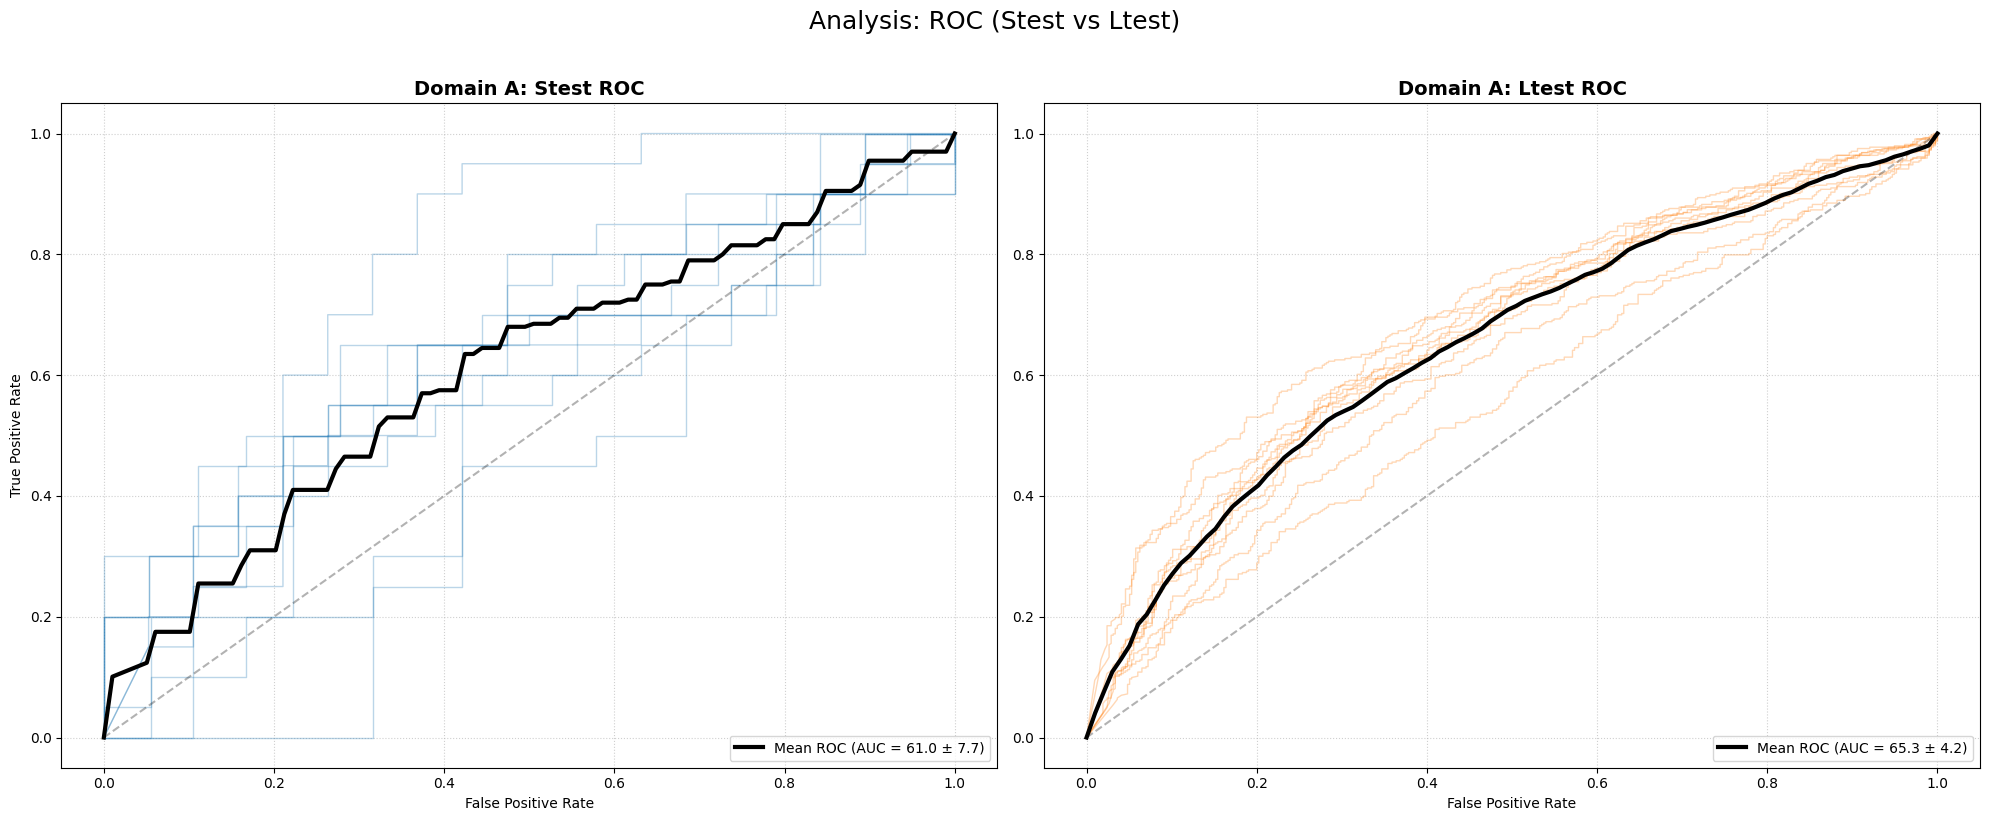

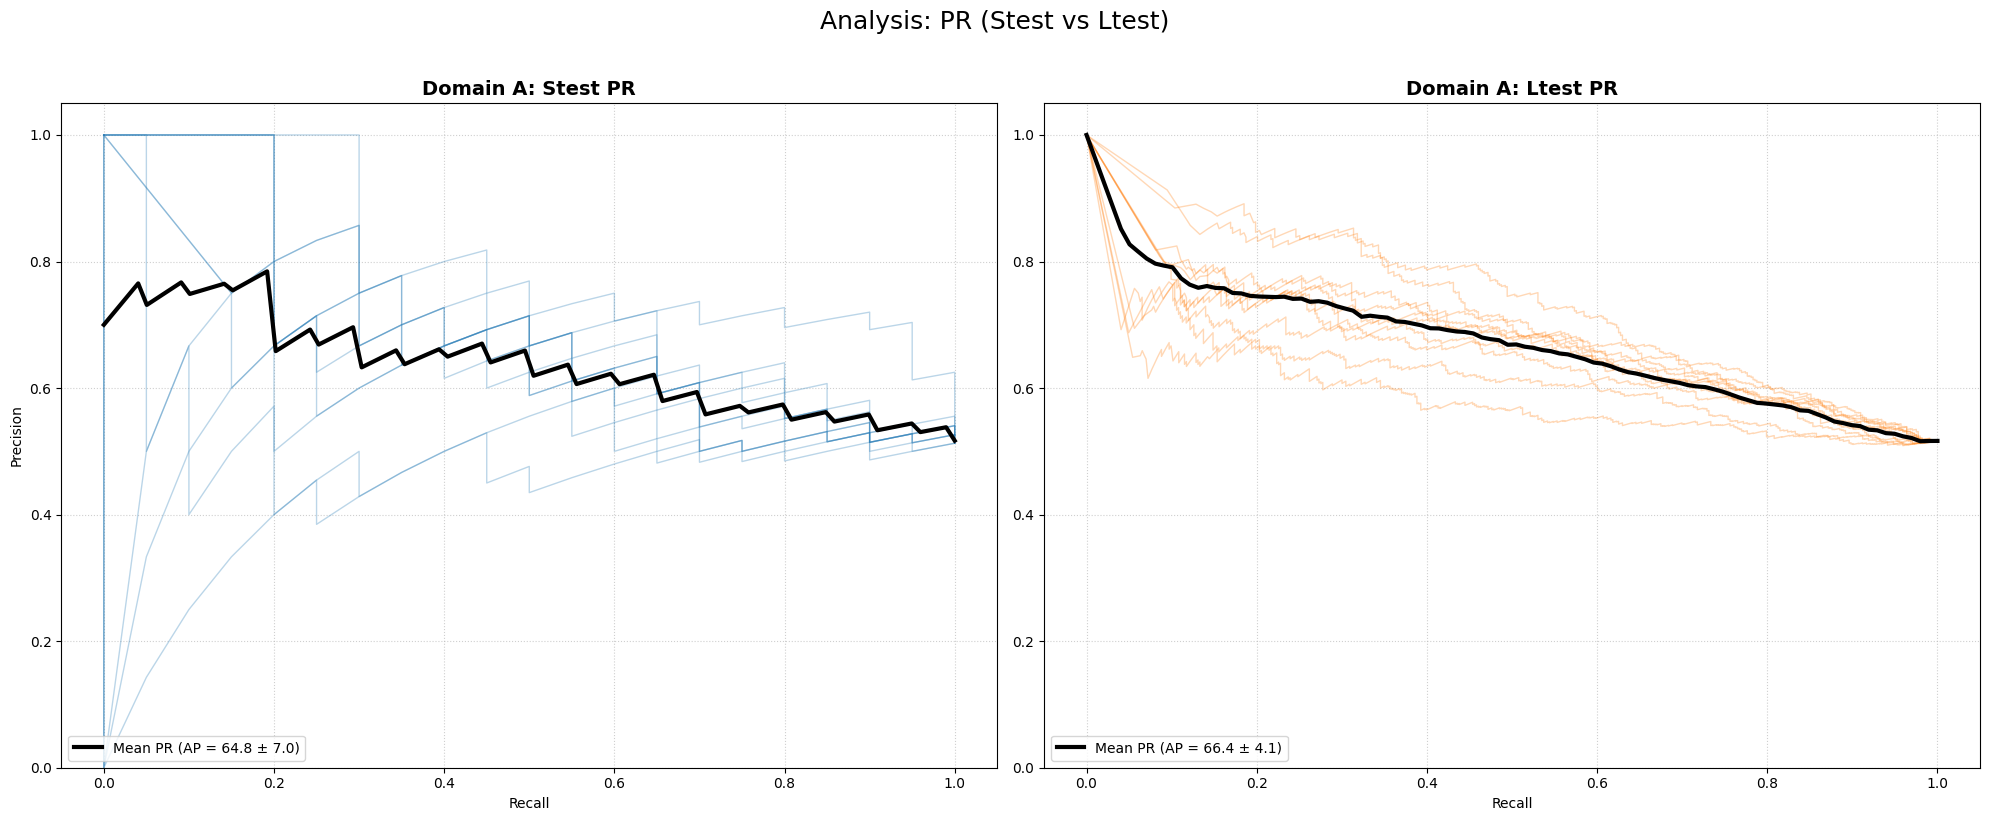

In [26]:
import matplotlib.pyplot as plt

def plot_cv_comparison(metric_type='ROC'):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Configuration
    colors = {'Stest': '#1f77b4', 'Ltest': '#ff7f0e'}
    
    for i, t_type in enumerate(['Stest', 'Ltest']):
        ax = axes[i]
        
        # Plot individual thin lines
        for f in fold_results_B:
            if metric_type == 'ROC':
                ax.plot(f[f'fpr_shared_B_reduced_{t_type}'], f[f'tpr_shared_B_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)
            else:
                ax.plot(f[f'recall_shared_B_reduced_{t_type}'], f[f'precision_shared_B_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)

        # Plot the thick Mean Curve
        if metric_type == 'ROC':
            m_tpr = mean_tpr_Stest if t_type == 'Stest' else mean_tpr_Ltest
            m_auc = mean_auc_Stest if t_type == 'Stest' else mean_auc_Ltest
            s_auc = std_auc_Stest if t_type == 'Stest' else std_auc_Ltest
            ax.plot(mean_fpr, m_tpr, color='black', lw=3, label=f'Mean ROC (AUC = {m_auc:.1f} ± {s_auc:.1f})')
            ax.plot([0, 1], [0, 1], 'k--', alpha=0.3)
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate' if i==0 else "")
        else:
            m_prec = mean_precision_Stest if t_type == 'Stest' else mean_precision_Ltest
            m_ap = mean_ap_Stest if t_type == 'Stest' else mean_ap_Ltest
            s_ap = std_ap_Stest if t_type == 'Stest' else std_ap_Ltest
            ax.plot(mean_recall, m_prec, color='black', lw=3, label=f'Mean PR (AP = {m_ap:.1f} ± {s_ap:.1f})')
            ax.set_xlabel('Recall')
            ax.set_ylabel('Precision' if i==0 else "")
            ax.set_ylim([0, 1.05])

        ax.set_title(f'Domain A: {t_type} {metric_type}', fontsize=14, fontweight='bold')
        ax.legend(loc='lower right' if metric_type=='ROC' else 'lower left')
        ax.grid(True, linestyle=':', alpha=0.6)

    plt.suptitle(f'Analysis: {metric_type} (Stest vs Ltest)', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# Run both
plot_cv_comparison(metric_type='ROC')
plot_cv_comparison(metric_type='PR')

In [27]:
np.savez(
    'mean_shared_B_cancer.npz',

    # Scalars
    mean_auc_Stest=mean_auc_Stest,
    std_auc_Stest=std_auc_Stest,
    mean_auc_Ltest=mean_auc_Ltest,
    std_auc_Ltest=std_auc_Ltest,

    mean_ap_Stest=mean_ap_Stest,
    std_ap_Stest=std_ap_Stest,
    mean_ap_Ltest=mean_ap_Ltest,
    std_ap_Ltest=std_ap_Ltest,

    # Curves
    mean_fpr=mean_fpr,
    mean_recall=mean_recall,
    mean_tpr_Stest=mean_tpr_Stest,
    mean_tpr_Ltest=mean_tpr_Ltest,
    mean_precision_Stest=mean_precision_Stest,
    mean_precision_Ltest=mean_precision_Ltest,
)


### Private encoders only with specific columns 

#### Architecture

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

def build_nn_private_only(specific_dim, learning_rate):


    # --- Private encoders (independent architectures) ---
    def private_encoder_block(input_dim, name):
        model = models.Sequential(name=name)
        model.add(layers.Dense(256, activation='relu'))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(64, activation='relu'))
        return model

    private = private_encoder_block(specific_dim, "private")
    # --- Inputs ---
    X_spec   = Input(shape=(specific_dim,), name='X_spec')


    # --- Forward passes ---

    h_spec = private(X_spec)



    # --- Domain-specific classifiers ---
    y = layers.Dense(2, activation='softmax', name='y')(h_spec)

    # --- Build model ---
    model = models.Model(
        inputs=[X_spec],
        outputs=[y],
        name="nn_private_only"
    )

    # --- Compile ---
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss={
            "y": "categorical_crossentropy"
        },
        metrics={
            "y": [AUC(name='AUC'), Precision(name='Precision'), Recall(name='Recall')]
        }
    )

    return model


#### Training

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.utils import to_categorical
import keras

learning_rates = [0.01, 0.001,0.0001]
best_auc_A = 0
best_auc_B = 0
best_model_A = None
best_model_B = None
best_lr_A = None
best_lr_B= None
histories = {}


#  Containers for summary metrics and full curve data
fold_results_priv_A = []
fold_results_priv_B = []
# 1. Initialize splitters for both
skf_A = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
skf_B = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 2. Create the generators
gen_A = skf_A.split(dfA_filtered, dfA_filtered['mortality_1yr'])
gen_B = skf_B.split(dfB_filtered, dfB_filtered['mortality_1yr'])

# 3. Zip them together to run 10 folds simultaneously
for i, ((big_fold_idx_A, fold_idx_A), (big_fold_idx_B, fold_idx_B)) in enumerate(zip(gen_A, gen_B)):
    if i >= 10: # Stop after index 9 (which is the 10th fold)
        break
    print("Fold",i)
    # 1. Take the 10% fold as our current 'dfA_reduced'
    dfA_reduced = dfA_filtered.iloc[fold_idx_A].copy()
    dfB_reduced = dfB_filtered.iloc[fold_idx_B].copy()

    # 2. Basic feature extraction
    id_columns_A = dfA_reduced[['subject_id', 'hadm_id']].copy()
    X_common_A = dfA_reduced.drop(columns=set_A_attributes + ['mortality_1yr', 'subject_id', 'hadm_id']).copy()
    X_spec_A = dfA_reduced[set_A_attributes].copy()
    y_A = dfA_reduced['mortality_1yr'].copy()

    # 3. Internal Train/Test Split (80/20) for this fold
    X_common_train_A, X_common_test_A, \
    X_spec_train_A, X_spec_test_A, \
    y_train_A, y_test_A, \
    id_train_A, id_test_A = train_test_split(
        X_common_A, X_spec_A, y_A, id_columns_A,
        test_size=0.2,
        random_state=42,
        stratify=y_A
    )

    # 4. One-hot encode labels
    y_train_encoded_A = to_categorical(y_train_A)

    id_columns_B = dfB_reduced[['subject_id', 'hadm_id']]
    X_common_B = dfB_reduced.drop(columns=set_B_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
    X_spec_B = dfB_reduced[set_B_attributes]
    y_B = dfB_reduced['mortality_1yr']


    X_common_train_B, X_common_test_B, X_spec_train_B, X_spec_test_B, y_train_B, y_test_B, id_train_B, id_test_B = train_test_split(
        X_common_B, X_spec_B, y_B, id_columns_B,
        test_size=0.2,
        random_state=42,
        stratify=y_B
    )

    # One-hot encode the target labels (0 or 1 → [1, 0] or [0, 1])
    y_train_encoded_B = to_categorical(y_train_B)


    # Train A
    for lr in learning_rates:
        keras.backend.clear_session()
        model=build_nn_private_only(specific_dim=X_spec_A.shape[1], learning_rate=lr)
        
        
        
        history = model.fit(X_spec_train_A,y_train_encoded_A,
            epochs=6,
            batch_size=16,
            validation_split=0.2,
            #callbacks=[early_stopping],
            verbose=0
        )

        final_val_auc = max(history.history['val_AUC'])
     


        histories[lr] = history
        
        if final_val_auc > best_auc_A:
            best_auc_A =  final_val_auc
            best_model_A = model
            best_lr= lr
    histories = {}
    # Train B
    for lr in learning_rates:
        keras.backend.clear_session()
        model=build_nn_private_only(specific_dim=X_spec_B.shape[1], learning_rate=lr)
        
        
        
        history = model.fit(X_spec_train_B,y_train_encoded_B,
            epochs=6,
            batch_size=16,
            validation_split=0.2,
            #callbacks=[early_stopping],
            verbose=0
        )

        final_val_auc = max(history.history['val_AUC'])
     


        histories[lr] = history
        
        if final_val_auc > best_auc_B:
            best_auc_B =  final_val_auc
            best_model_B = model
            best_lr= lr      
    
    #Stest
    y_pred_list_A = best_model_A.predict(X_spec_test_A,
        verbose=0
    )
    y_proba_A = y_pred_list_A[:, 1]

    y_pred_list_B = best_model_B.predict(X_spec_test_B,
        verbose=0
    )
    y_proba_B = y_pred_list_B[:, 1]

    # --- Get true labels ---
    if y_test_A.ndim > 1 and y_test_A.shape[1] > 1:
        y_true_A = np.argmax(y_test_A, axis=1)
    else:
        y_true_A = y_test_A

    if y_test_B.ndim > 1 and y_test_B.shape[1] > 1:
        y_true_B = np.argmax(y_test_B, axis=1)
    else:
        y_true_B = y_test_B

    # === DOMAIN A ===
    # ROC
    fpr_private_A_reduced_Stest, tpr_private_A_reduced_Stest, thresholds_roc_private_A_reduced_Stest = roc_curve(y_true_A, y_proba_A)
    roc_auc_private_A_reduced_Stest = auc(fpr_private_A_reduced_Stest, tpr_private_A_reduced_Stest)
    # PR
    precision_private_A_reduced_Stest, recall_private_A_reduced_Stest, thresholds_pr_private_A_reduced_Stest = precision_recall_curve(y_true_A, y_proba_A)
    avg_precision_private_A_reduced_Stest = average_precision_score(y_true_A, y_proba_A)

    # === DOMAIN B ===
    # ROC
    fpr_private_B_reduced_Stest, tpr_private_B_reduced_Stest, thresholds_roc_private_B_reduced_Stest = roc_curve(y_true_B, y_proba_B)
    roc_auc_private_B_reduced_Stest = auc(fpr_private_B_reduced_Stest, tpr_private_B_reduced_Stest)
    # PR
    precision_private_B_reduced_Stest, recall_private_B_reduced_Stest, thresholds_pr_private_B_reduced_Stest = precision_recall_curve(y_true_B, y_proba_B)
    avg_precision_private_B_reduced_Stest = average_precision_score(y_true_B, y_proba_B)




    #Ltest
    dfA_rest= dfA_filtered.iloc[big_fold_idx_A].copy()
    dfB_rest= dfB_filtered.iloc[big_fold_idx_B].copy()


    # 2. Basic feature extraction
    id_columns_A = dfA_rest[['subject_id', 'hadm_id']].copy()
    X_common_A = dfA_rest.drop(columns=set_A_attributes + ['mortality_1yr', 'subject_id', 'hadm_id']).copy()
    X_spec_A = dfA_rest[set_A_attributes].copy()
    y_A = dfA_rest['mortality_1yr'].copy()

    # 3. Internal Train/Test Split (80/20) for this fold
    X_common_train_A, X_common_test_A, \
    X_spec_train_A, X_spec_test_A, \
    y_train_A, y_test_A, \
    id_train_A, id_test_A = train_test_split(
        X_common_A, X_spec_A, y_A, id_columns_A,
        test_size=0.5,
        random_state=42,
        stratify=y_A
    )

    id_columns_B = dfB_rest[['subject_id', 'hadm_id']]
    X_common_B = dfB_rest.drop(columns=set_B_attributes + ['mortality_1yr', 'subject_id', 'hadm_id'])
    X_spec_B = dfB_rest[set_B_attributes]
    y_B = dfB_rest['mortality_1yr']


    X_common_train_B, X_common_test_B, X_spec_train_B, X_spec_test_B, y_train_B, y_test_B, id_train_B, id_test_B = train_test_split(
        X_common_B, X_spec_B, y_B, id_columns_B,
        test_size=0.5,
        random_state=42,
        stratify=y_B
    )


    y_pred_list_A = best_model_A.predict(X_spec_test_A,
        verbose=0
    )
    y_proba_A = y_pred_list_A[:, 1]

    y_pred_list_B = best_model_B.predict(X_spec_test_B,
        verbose=0
    )
    y_proba_B = y_pred_list_B[:, 1]


    # --- Get true labels ---
    if y_test_A.ndim > 1 and y_test_A.shape[1] > 1:
        y_true_A = np.argmax(y_test_A, axis=1)
    else:
        y_true_A = y_test_A

    if y_test_B.ndim > 1 and y_test_B.shape[1] > 1:
        y_true_B = np.argmax(y_test_B, axis=1)
    else:
        y_true_B = y_test_B

    # === DOMAIN A ===
    # ROC
    fpr_private_A_reduced_Ltest, tpr_private_A_reduced_Ltest, thresholds_roc_private_A_reduced_Ltest = roc_curve(y_true_A, y_proba_A)
    roc_auc_private_A_reduced_Ltest = auc(fpr_private_A_reduced_Ltest, tpr_private_A_reduced_Ltest)
    # PR
    precision_private_A_reduced_Ltest, recall_private_A_reduced_Ltest, thresholds_pr_private_A_reduced_Ltest = precision_recall_curve(y_true_A, y_proba_A)
    avg_precision_private_A_reduced_Ltest = average_precision_score(y_true_A, y_proba_A)

    # === DOMAIN B ===
    # ROC
    fpr_private_B_reduced_Ltest, tpr_private_B_reduced_Ltest, thresholds_roc_private_B_reduced_Ltest = roc_curve(y_true_B, y_proba_B)
    roc_auc_private_B_reduced_Ltest = auc(fpr_private_B_reduced_Ltest, tpr_private_B_reduced_Ltest)
    # PR
    precision_private_B_reduced_Ltest, recall_private_B_reduced_Ltest, thresholds_pr_private_B_reduced_Ltest = precision_recall_curve(y_true_B, y_proba_B)
    avg_precision_private_B_reduced_Ltest = average_precision_score(y_true_B, y_proba_B)


    print("A:\tAUC\tAP")
    print(f"Stest\t{roc_auc_private_A_reduced_Stest:.2f}\t{avg_precision_private_A_reduced_Stest:.2f}")
    print(f"Ltest\t{roc_auc_private_A_reduced_Ltest:.2f}\t{avg_precision_private_A_reduced_Ltest:.2f}")

    print("B:\tAUC\tAP")
    print(f"Stest\t{roc_auc_private_B_reduced_Stest:.2f}\t{avg_precision_private_B_reduced_Stest:.2f}")
    print(f"Ltest\t{roc_auc_private_B_reduced_Ltest:.2f}\t{avg_precision_private_B_reduced_Ltest:.2f}")


    # Store all specific metrics and arrays into a dictionary for this fold
    current_fold_metrics = {
        'fold_index': i + 1,
        
        # ROC AUC - Stest
        'fpr_private_A_reduced_Stest': fpr_private_A_reduced_Stest,
        'tpr_private_A_reduced_Stest': tpr_private_A_reduced_Stest,
        'thresholds_roc_private_A_reduced_Stest': thresholds_roc_private_A_reduced_Stest,
        'roc_auc_private_A_reduced_Stest': roc_auc_private_A_reduced_Stest,
        
        # PR - Stest
        'precision_private_A_reduced_Stest': precision_private_A_reduced_Stest,
        'recall_private_A_reduced_Stest': recall_private_A_reduced_Stest,
        'thresholds_pr_private_A_reduced_Stest': thresholds_pr_private_A_reduced_Stest,
        'avg_precision_private_A_reduced_Stest': avg_precision_private_A_reduced_Stest,

        # ROC AUC - Ltest
        'fpr_private_A_reduced_Ltest': fpr_private_A_reduced_Ltest,
        'tpr_private_A_reduced_Ltest': tpr_private_A_reduced_Ltest,
        'thresholds_roc_private_A_reduced_Ltest': thresholds_roc_private_A_reduced_Ltest,
        'roc_auc_private_A_reduced_Ltest': roc_auc_private_A_reduced_Ltest,

        # PR - Ltest
        'precision_private_A_reduced_Ltest': precision_private_A_reduced_Ltest,
        'recall_private_A_reduced_Ltest': recall_private_A_reduced_Ltest,
        'thresholds_pr_private_A_reduced_Ltest': thresholds_pr_private_A_reduced_Ltest,
        'avg_precision_private_A_reduced_Ltest': avg_precision_private_A_reduced_Ltest
    }

    # Append the dictionary to the list
    fold_results_priv_A.append(current_fold_metrics)

    # Store all specific metrics and arrays into a dictionary for this fold
    current_fold_metrics = {
        'fold_index': i + 1,
        
        # ROC AUC - Stest
        'fpr_private_B_reduced_Stest': fpr_private_B_reduced_Stest,
        'tpr_private_B_reduced_Stest': tpr_private_B_reduced_Stest,
        'thresholds_roc_private_B_reduced_Stest': thresholds_roc_private_B_reduced_Stest,
        'roc_auc_private_B_reduced_Stest': roc_auc_private_B_reduced_Stest,
        
        # PR - Stest
        'precision_private_B_reduced_Stest': precision_private_B_reduced_Stest,
        'recall_private_B_reduced_Stest': recall_private_B_reduced_Stest,
        'thresholds_pr_private_B_reduced_Stest': thresholds_pr_private_B_reduced_Stest,
        'avg_precision_private_B_reduced_Stest': avg_precision_private_B_reduced_Stest,

        # ROC AUC - Ltest
        'fpr_private_B_reduced_Ltest': fpr_private_B_reduced_Ltest,
        'tpr_private_B_reduced_Ltest': tpr_private_B_reduced_Ltest,
        'thresholds_roc_private_B_reduced_Ltest': thresholds_roc_private_B_reduced_Ltest,
        'roc_auc_private_B_reduced_Ltest': roc_auc_private_B_reduced_Ltest,

        # PR - Ltest
        'precision_private_B_reduced_Ltest': precision_private_B_reduced_Ltest,
        'recall_private_B_reduced_Ltest': recall_private_B_reduced_Ltest,
        'thresholds_pr_private_B_reduced_Ltest': thresholds_pr_private_B_reduced_Ltest,
        'avg_precision_private_B_reduced_Ltest': avg_precision_private_B_reduced_Ltest
    }

    # Append the dictionary to the list
    fold_results_priv_B.append(current_fold_metrics)



Fold 0
A:	AUC	AP
Stest	0.66	0.61
Ltest	0.59	0.58
B:	AUC	AP
Stest	0.59	0.56
Ltest	0.60	0.62
Fold 1
A:	AUC	AP
Stest	0.64	0.69
Ltest	0.59	0.59
B:	AUC	AP
Stest	0.50	0.58
Ltest	0.61	0.62
Fold 2
A:	AUC	AP
Stest	0.52	0.51
Ltest	0.59	0.59
B:	AUC	AP
Stest	0.62	0.68
Ltest	0.58	0.59
Fold 3
A:	AUC	AP
Stest	0.63	0.67
Ltest	0.62	0.61
B:	AUC	AP
Stest	0.42	0.54
Ltest	0.59	0.61
Fold 4
A:	AUC	AP
Stest	0.72	0.78
Ltest	0.63	0.64
B:	AUC	AP
Stest	0.49	0.58
Ltest	0.58	0.59
Fold 5
A:	AUC	AP
Stest	0.64	0.60
Ltest	0.61	0.62
B:	AUC	AP
Stest	0.66	0.63
Ltest	0.57	0.59
Fold 6
A:	AUC	AP
Stest	0.79	0.81
Ltest	0.63	0.63
B:	AUC	AP
Stest	0.59	0.65
Ltest	0.58	0.60
Fold 7
A:	AUC	AP
Stest	0.69	0.78
Ltest	0.61	0.60
B:	AUC	AP
Stest	0.59	0.65
Ltest	0.58	0.59
Fold 8
A:	AUC	AP
Stest	0.68	0.80
Ltest	0.61	0.61
B:	AUC	AP
Stest	0.82	0.81
Ltest	0.59	0.61
Fold 9
A:	AUC	AP
Stest	0.65	0.64
Ltest	0.62	0.63
B:	AUC	AP
Stest	0.55	0.59
Ltest	0.57	0.59


#### Results A

In [31]:
import numpy as np

# --- 1. Average Scalars (AUC & AP) ---
auc_Stest = [f['roc_auc_private_A_reduced_Stest'] for f in fold_results_priv_A]
ap_Stest  = [f['avg_precision_private_A_reduced_Stest'] for f in fold_results_priv_A]
auc_Ltest = [f['roc_auc_private_A_reduced_Ltest'] for f in fold_results_priv_A]
ap_Ltest  = [f['avg_precision_private_A_reduced_Ltest'] for f in fold_results_priv_A]

mean_auc_Stest, std_auc_Stest = np.mean(auc_Stest)*100, np.std(auc_Stest)*100
mean_auc_Ltest, std_auc_Ltest = np.mean(auc_Ltest)*100, np.std(auc_Ltest)*100
mean_ap_Stest, std_ap_Stest   = np.mean(ap_Stest)*100, np.std(ap_Stest)*100
mean_ap_Ltest, std_ap_Ltest   = np.mean(ap_Ltest)*100, np.std(ap_Ltest)*100

# --- 2. Average Arrays (Interpolation) ---
# Define common grids (the X-axes)
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)

tprs_Stest = []
precisions_Stest = []
tprs_Ltest = []
precisions_Ltest = []

for f in fold_results_priv_A:
    # --- Stest Interpolation ---
    tprs_Stest.append(np.interp(mean_fpr, f['fpr_private_A_reduced_Stest'], f['tpr_private_A_reduced_Stest']))
    tprs_Stest[-1][0] = 0.0
    
    # PR interpolation: Recall must be increasing for np.interp
    precisions_Stest.append(np.interp(mean_recall, f['recall_private_A_reduced_Stest'][::-1], f['precision_private_A_reduced_Stest'][::-1]))

    # --- Ltest Interpolation ---
    tprs_Ltest.append(np.interp(mean_fpr, f['fpr_private_A_reduced_Ltest'], f['tpr_private_A_reduced_Ltest']))
    tprs_Ltest[-1][0] = 0.0
    
    precisions_Ltest.append(np.interp(mean_recall, f['recall_private_A_reduced_Ltest'][::-1], f['precision_private_A_reduced_Ltest'][::-1]))

# Calculate Final Mean Curves
mean_tpr_Stest = np.mean(tprs_Stest, axis=0)
mean_tpr_Stest[-1] = 1.0
mean_precision_Stest = np.mean(precisions_Stest, axis=0)

mean_tpr_Ltest = np.mean(tprs_Ltest, axis=0)
mean_tpr_Ltest[-1] = 1.0
mean_precision_Ltest = np.mean(precisions_Ltest, axis=0)


print("Means ± Std [%]")
print("\tAUC\t\tAP")
print(f"Stest\t{mean_auc_Stest:.1f} ± {std_auc_Stest:.1f}\t{mean_ap_Stest:.1f} ± {std_ap_Stest:.1f}")
print(f"Ltest\t{mean_auc_Ltest:.1f} ± {std_auc_Ltest:.1f}\t{mean_ap_Ltest:.1f} ± {std_ap_Ltest:.1f}")

Means ± Std [%]
	AUC		AP
Stest	66.1 ± 6.5	68.9 ± 9.7
Ltest	61.0 ± 1.6	61.0 ± 1.8


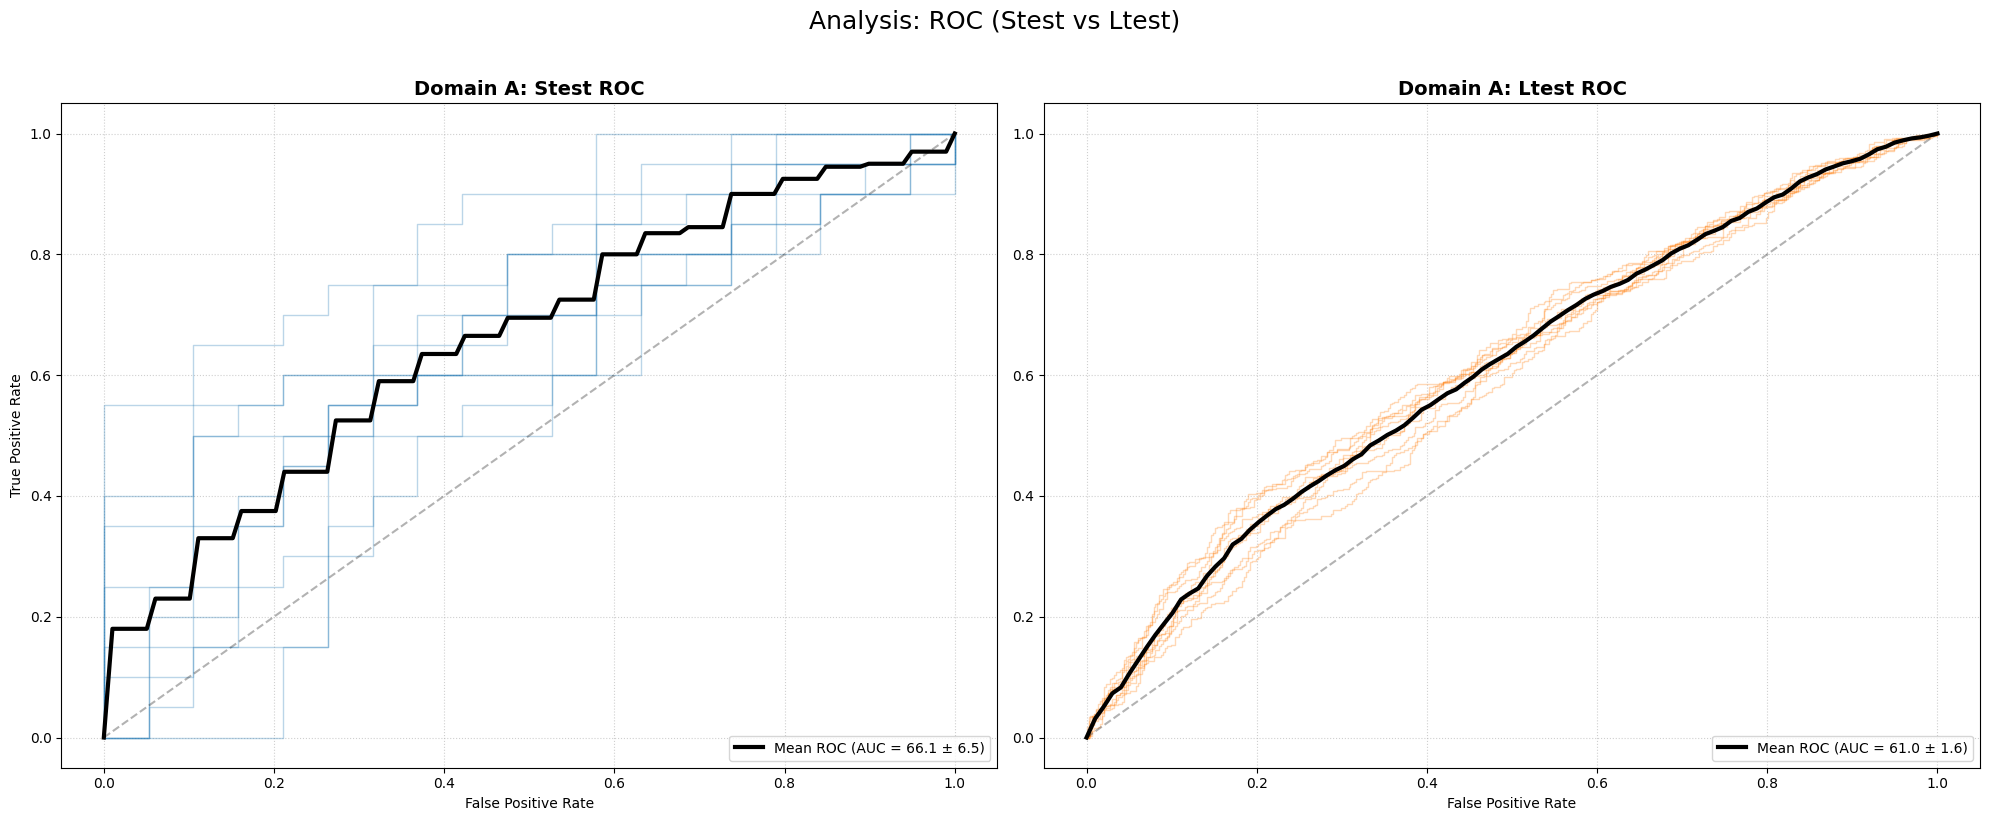

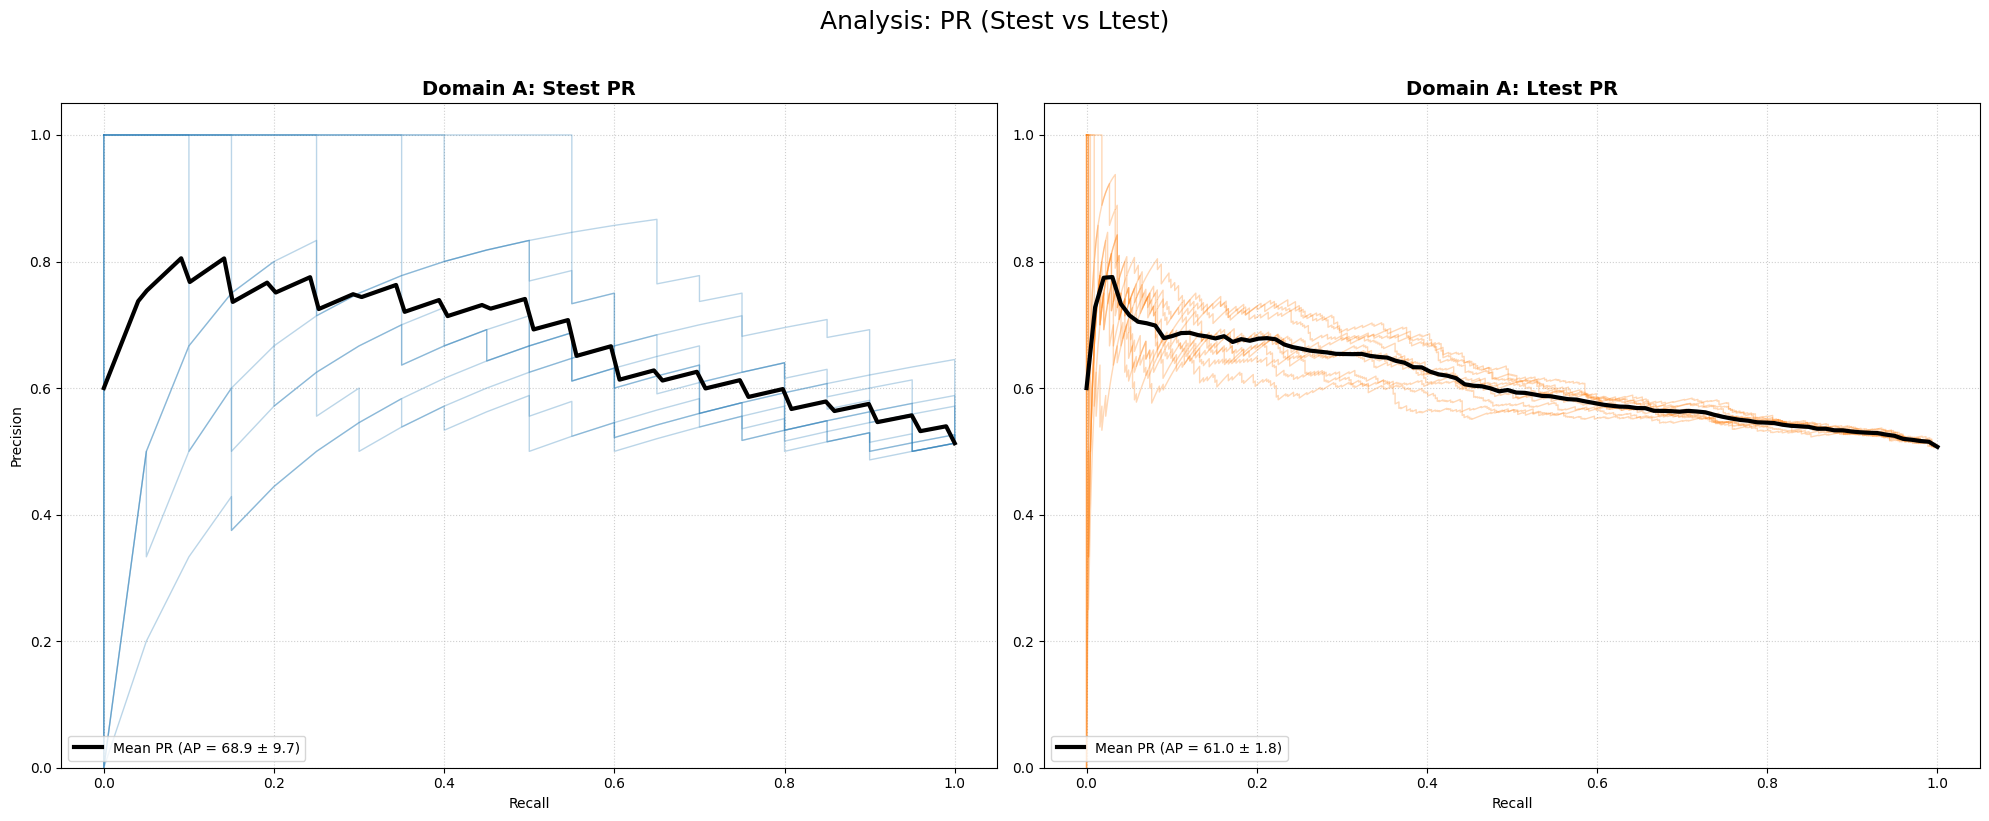

In [32]:
import matplotlib.pyplot as plt

def plot_cv_comparison(metric_type='ROC'):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Configuration
    colors = {'Stest': '#1f77b4', 'Ltest': '#ff7f0e'}
    
    for i, t_type in enumerate(['Stest', 'Ltest']):
        ax = axes[i]
        
        # Plot individual thin lines
        for f in fold_results_priv_A:
            if metric_type == 'ROC':
                ax.plot(f[f'fpr_private_A_reduced_{t_type}'], f[f'tpr_private_A_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)
            else:
                ax.plot(f[f'recall_private_A_reduced_{t_type}'], f[f'precision_private_A_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)

        # Plot the thick Mean Curve
        if metric_type == 'ROC':
            m_tpr = mean_tpr_Stest if t_type == 'Stest' else mean_tpr_Ltest
            m_auc = mean_auc_Stest if t_type == 'Stest' else mean_auc_Ltest
            s_auc = std_auc_Stest if t_type == 'Stest' else std_auc_Ltest
            ax.plot(mean_fpr, m_tpr, color='black', lw=3, label=f'Mean ROC (AUC = {m_auc:.1f} ± {s_auc:.1f})')
            ax.plot([0, 1], [0, 1], 'k--', alpha=0.3)
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate' if i==0 else "")
        else:
            m_prec = mean_precision_Stest if t_type == 'Stest' else mean_precision_Ltest
            m_ap = mean_ap_Stest if t_type == 'Stest' else mean_ap_Ltest
            s_ap = std_ap_Stest if t_type == 'Stest' else std_ap_Ltest
            ax.plot(mean_recall, m_prec, color='black', lw=3, label=f'Mean PR (AP = {m_ap:.1f} ± {s_ap:.1f})')
            ax.set_xlabel('Recall')
            ax.set_ylabel('Precision' if i==0 else "")
            ax.set_ylim([0, 1.05])

        ax.set_title(f'Domain A: {t_type} {metric_type}', fontsize=14, fontweight='bold')
        ax.legend(loc='lower right' if metric_type=='ROC' else 'lower left')
        ax.grid(True, linestyle=':', alpha=0.6)

    plt.suptitle(f'Analysis: {metric_type} (Stest vs Ltest)', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# Run both
plot_cv_comparison(metric_type='ROC')
plot_cv_comparison(metric_type='PR')

In [33]:
np.savez(
    'mean_private_A_cancer.npz',

    # Scalars
    mean_auc_Stest=mean_auc_Stest,
    std_auc_Stest=std_auc_Stest,
    mean_auc_Ltest=mean_auc_Ltest,
    std_auc_Ltest=std_auc_Ltest,

    mean_ap_Stest=mean_ap_Stest,
    std_ap_Stest=std_ap_Stest,
    mean_ap_Ltest=mean_ap_Ltest,
    std_ap_Ltest=std_ap_Ltest,

    # Curves
    mean_fpr=mean_fpr,
    mean_recall=mean_recall,
    mean_tpr_Stest=mean_tpr_Stest,
    mean_tpr_Ltest=mean_tpr_Ltest,
    mean_precision_Stest=mean_precision_Stest,
    mean_precision_Ltest=mean_precision_Ltest,
)


#### Results B

In [34]:
import numpy as np

# --- 1. Average Scalars (AUC & AP) ---
auc_Stest = [f['roc_auc_private_B_reduced_Stest'] for f in fold_results_priv_B]
ap_Stest  = [f['avg_precision_private_B_reduced_Stest'] for f in fold_results_priv_B]
auc_Ltest = [f['roc_auc_private_B_reduced_Ltest'] for f in fold_results_priv_B]
ap_Ltest  = [f['avg_precision_private_B_reduced_Ltest'] for f in fold_results_priv_B]

mean_auc_Stest, std_auc_Stest = np.mean(auc_Stest)*100, np.std(auc_Stest)*100
mean_auc_Ltest, std_auc_Ltest = np.mean(auc_Ltest)*100, np.std(auc_Ltest)*100
mean_ap_Stest, std_ap_Stest   = np.mean(ap_Stest)*100, np.std(ap_Stest)*100
mean_ap_Ltest, std_ap_Ltest   = np.mean(ap_Ltest)*100, np.std(ap_Ltest)*100

# --- 2. Average Arrays (Interpolation) ---
# Define common grids (the X-axes)
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)

tprs_Stest = []
precisions_Stest = []
tprs_Ltest = []
precisions_Ltest = []

for f in fold_results_priv_B:
    # --- Stest Interpolation ---
    tprs_Stest.append(np.interp(mean_fpr, f['fpr_private_B_reduced_Stest'], f['tpr_private_B_reduced_Stest']))
    tprs_Stest[-1][0] = 0.0
    
    # PR interpolation: Recall must be increasing for np.interp
    precisions_Stest.append(np.interp(mean_recall, f['recall_private_B_reduced_Stest'][::-1], f['precision_private_B_reduced_Stest'][::-1]))

    # --- Ltest Interpolation ---
    tprs_Ltest.append(np.interp(mean_fpr, f['fpr_private_B_reduced_Ltest'], f['tpr_private_B_reduced_Ltest']))
    tprs_Ltest[-1][0] = 0.0
    
    precisions_Ltest.append(np.interp(mean_recall, f['recall_private_B_reduced_Ltest'][::-1], f['precision_private_B_reduced_Ltest'][::-1]))

# Calculate Final Mean Curves
mean_tpr_Stest = np.mean(tprs_Stest, axis=0)
mean_tpr_Stest[-1] = 1.0
mean_precision_Stest = np.mean(precisions_Stest, axis=0)

mean_tpr_Ltest = np.mean(tprs_Ltest, axis=0)
mean_tpr_Ltest[-1] = 1.0
mean_precision_Ltest = np.mean(precisions_Ltest, axis=0)


print("Means ± Std [%]")
print("\tAUC\t\tAP")
print(f"Stest\t{mean_auc_Stest:.1f} ± {std_auc_Stest:.1f}\t{mean_ap_Stest:.1f} ± {std_ap_Stest:.1f}")
print(f"Ltest\t{mean_auc_Ltest:.1f} ± {std_auc_Ltest:.1f}\t{mean_ap_Ltest:.1f} ± {std_ap_Ltest:.1f}")

Means ± Std [%]
	AUC		AP
Stest	58.2 ± 10.3	62.7 ± 7.5
Ltest	58.6 ± 1.3	60.0 ± 1.2


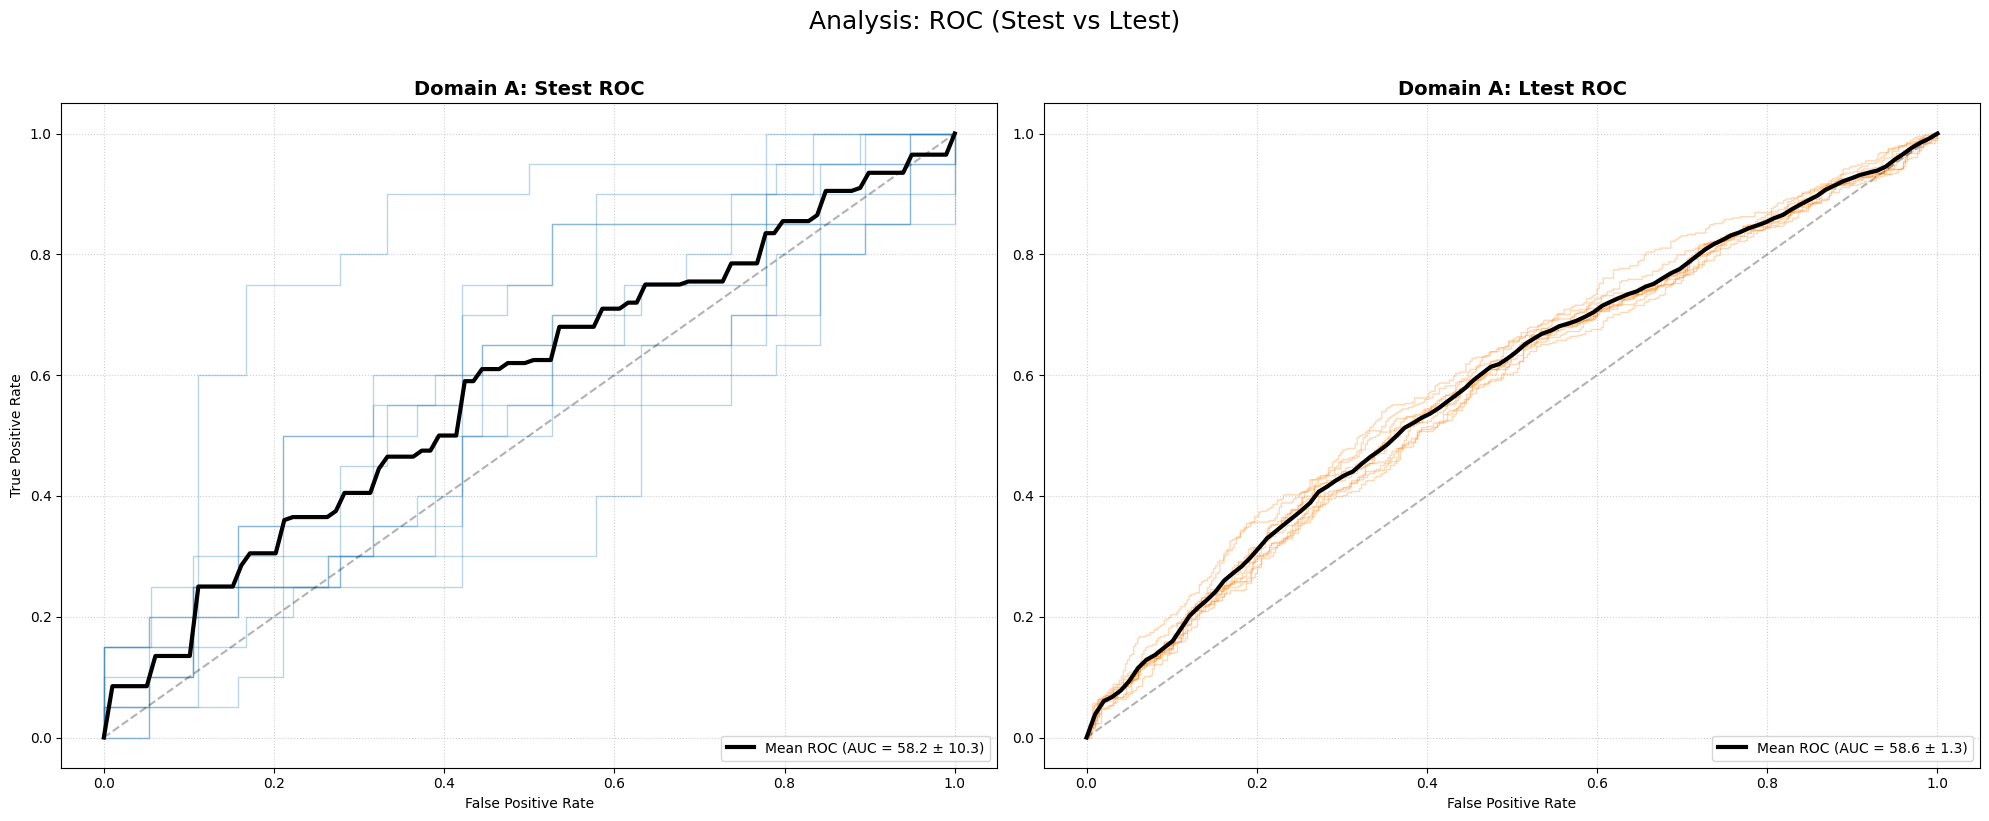

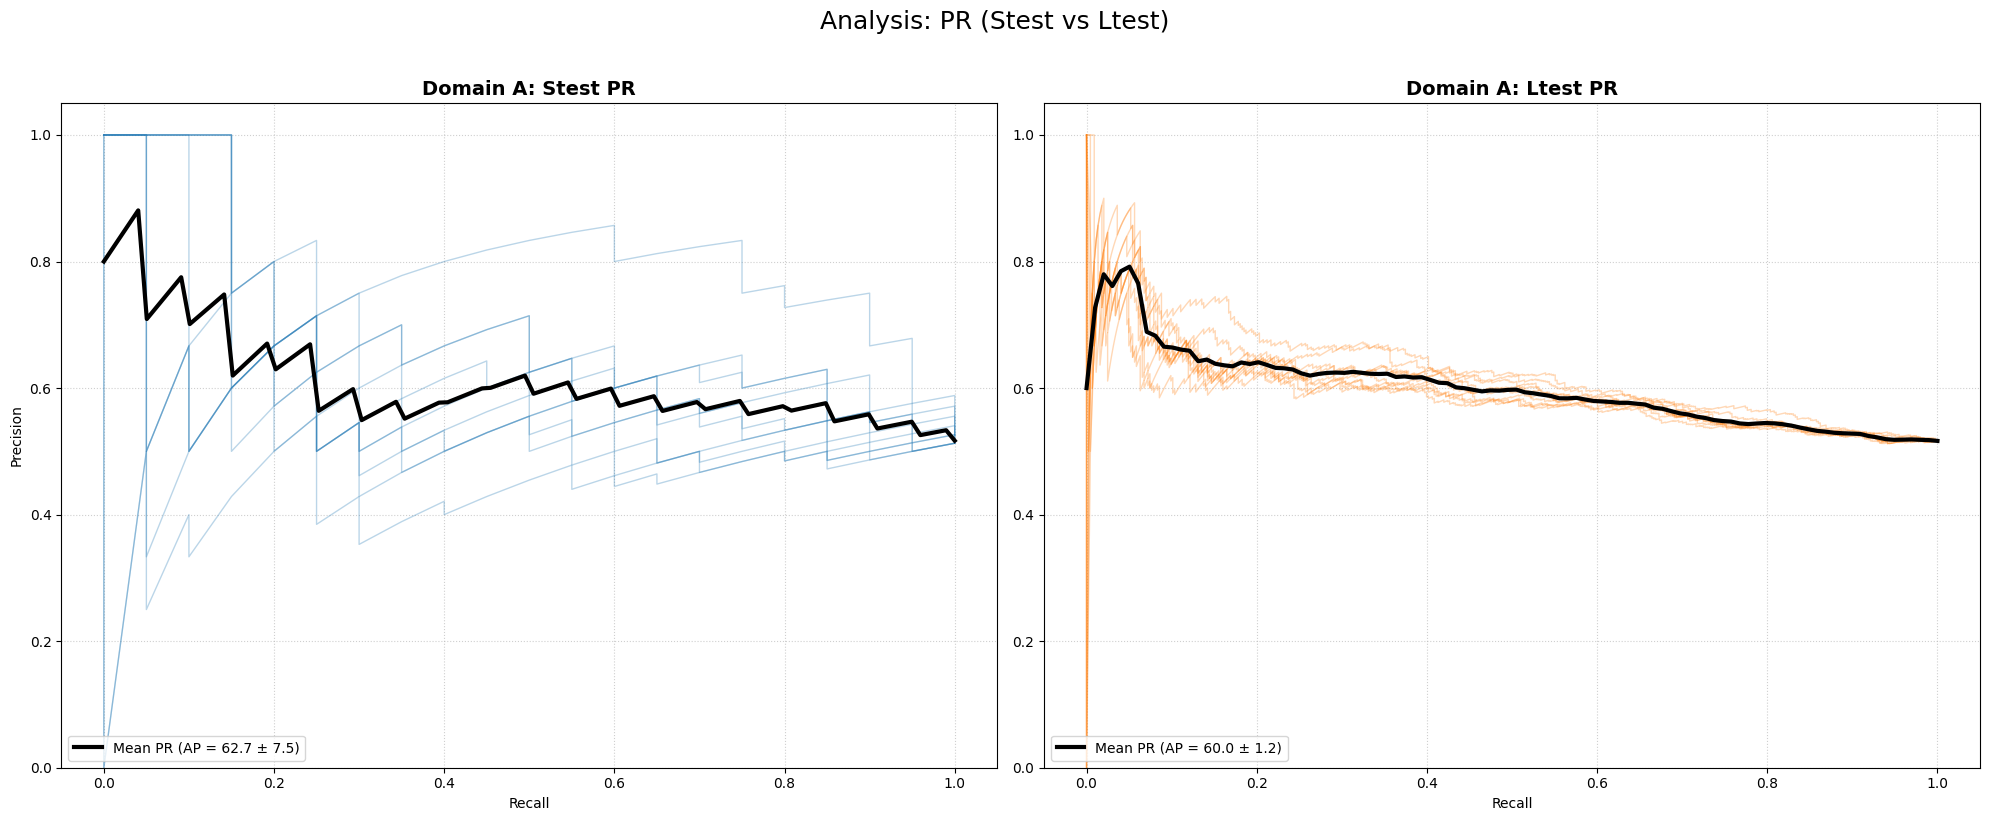

In [35]:
import matplotlib.pyplot as plt

def plot_cv_comparison(metric_type='ROC'):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Configuration
    colors = {'Stest': '#1f77b4', 'Ltest': '#ff7f0e'}
    
    for i, t_type in enumerate(['Stest', 'Ltest']):
        ax = axes[i]
        
        # Plot individual thin lines
        for f in fold_results_priv_B:
            if metric_type == 'ROC':
                ax.plot(f[f'fpr_private_B_reduced_{t_type}'], f[f'tpr_private_B_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)
            else:
                ax.plot(f[f'recall_private_B_reduced_{t_type}'], f[f'precision_private_B_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)

        # Plot the thick Mean Curve
        if metric_type == 'ROC':
            m_tpr = mean_tpr_Stest if t_type == 'Stest' else mean_tpr_Ltest
            m_auc = mean_auc_Stest if t_type == 'Stest' else mean_auc_Ltest
            s_auc = std_auc_Stest if t_type == 'Stest' else std_auc_Ltest
            ax.plot(mean_fpr, m_tpr, color='black', lw=3, label=f'Mean ROC (AUC = {m_auc:.1f} ± {s_auc:.1f})')
            ax.plot([0, 1], [0, 1], 'k--', alpha=0.3)
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate' if i==0 else "")
        else:
            m_prec = mean_precision_Stest if t_type == 'Stest' else mean_precision_Ltest
            m_ap = mean_ap_Stest if t_type == 'Stest' else mean_ap_Ltest
            s_ap = std_ap_Stest if t_type == 'Stest' else std_ap_Ltest
            ax.plot(mean_recall, m_prec, color='black', lw=3, label=f'Mean PR (AP = {m_ap:.1f} ± {s_ap:.1f})')
            ax.set_xlabel('Recall')
            ax.set_ylabel('Precision' if i==0 else "")
            ax.set_ylim([0, 1.05])

        ax.set_title(f'Domain A: {t_type} {metric_type}', fontsize=14, fontweight='bold')
        ax.legend(loc='lower right' if metric_type=='ROC' else 'lower left')
        ax.grid(True, linestyle=':', alpha=0.6)

    plt.suptitle(f'Analysis: {metric_type} (Stest vs Ltest)', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# Run both
plot_cv_comparison(metric_type='ROC')
plot_cv_comparison(metric_type='PR')

In [36]:
np.savez(
    'mean_private_B_cancer.npz',

    # Scalars
    mean_auc_Stest=mean_auc_Stest,
    std_auc_Stest=std_auc_Stest,
    mean_auc_Ltest=mean_auc_Ltest,
    std_auc_Ltest=std_auc_Ltest,

    mean_ap_Stest=mean_ap_Stest,
    std_ap_Stest=std_ap_Stest,
    mean_ap_Ltest=mean_ap_Ltest,
    std_ap_Ltest=std_ap_Ltest,

    # Curves
    mean_fpr=mean_fpr,
    mean_recall=mean_recall,
    mean_tpr_Stest=mean_tpr_Stest,
    mean_tpr_Ltest=mean_tpr_Ltest,
    mean_precision_Stest=mean_precision_Stest,
    mean_precision_Ltest=mean_precision_Ltest,
)

## Common & Specific Results

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Configuration ----------
models = {
    'Baseline': 'mean_baseline_{}_cancer.npz',
    'Final':   'mean_shared_{}_cancer.npz',
    'Private':  'mean_private_{}_cancer.npz',
}

colors = {
    'Baseline': '#1f77b4',
    'Final':   'black',
    'Private':  '#2ca02c',
}

linewidths = {
    'Baseline': 1.0,
    'Final':   2.0,
    'Private':  1.0,
}


# ---------- Helper function ----------
def plot_domain_test(domain='A', test_type='Stest'):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    roc_ax, pr_ax = axes

    for model, fname_tpl in models.items():
        data = np.load(fname_tpl.format(domain))

        # Select correct arrays
        mean_fpr = data['mean_fpr']
        mean_recall = data['mean_recall']

        mean_tpr = data[f'mean_tpr_{test_type}']
        mean_prec = data[f'mean_precision_{test_type}']

        mean_auc = data[f'mean_auc_{test_type}']
        std_auc = data[f'std_auc_{test_type}']
        mean_ap = data[f'mean_ap_{test_type}']
        std_ap = data[f'std_ap_{test_type}']

        # --- ROC ---
        roc_ax.plot(
            mean_fpr, mean_tpr,
            color=colors[model],
            lw=linewidths[model],
            label=f'{model} (AUC = {mean_auc:.1f} ± {std_auc:.1f})'
        )

        # --- PR ---
        pr_ax.plot(
            mean_recall, mean_prec,
            color=colors[model],
            lw=linewidths[model],
            label=f'{model} (AP = {mean_ap:.1f} ± {std_ap:.1f})'
        )

    # ----- ROC formatting -----
    roc_ax.plot([0, 1], [0, 1], 'k--', alpha=0.3)
    roc_ax.set_xlabel('False Positive Rate')
    roc_ax.set_ylabel('True Positive Rate')
    roc_ax.set_title(f'Cancer Filtering Domain {domain} – {test_type} ROC', fontweight='bold')
    roc_ax.legend(loc='lower right')
    roc_ax.grid(True, linestyle=':', alpha=0.6)

    # ----- PR formatting -----
    pr_ax.set_xlabel('Recall')
    pr_ax.set_ylabel('Precision')
    pr_ax.set_ylim([0, 1.05])
    pr_ax.set_title(f'Cancer Filtering Domain {domain} – {test_type} PR', fontweight='bold')
    pr_ax.legend(loc='lower left')
    pr_ax.grid(True, linestyle=':', alpha=0.6)

    plt.tight_layout()
    plt.show()


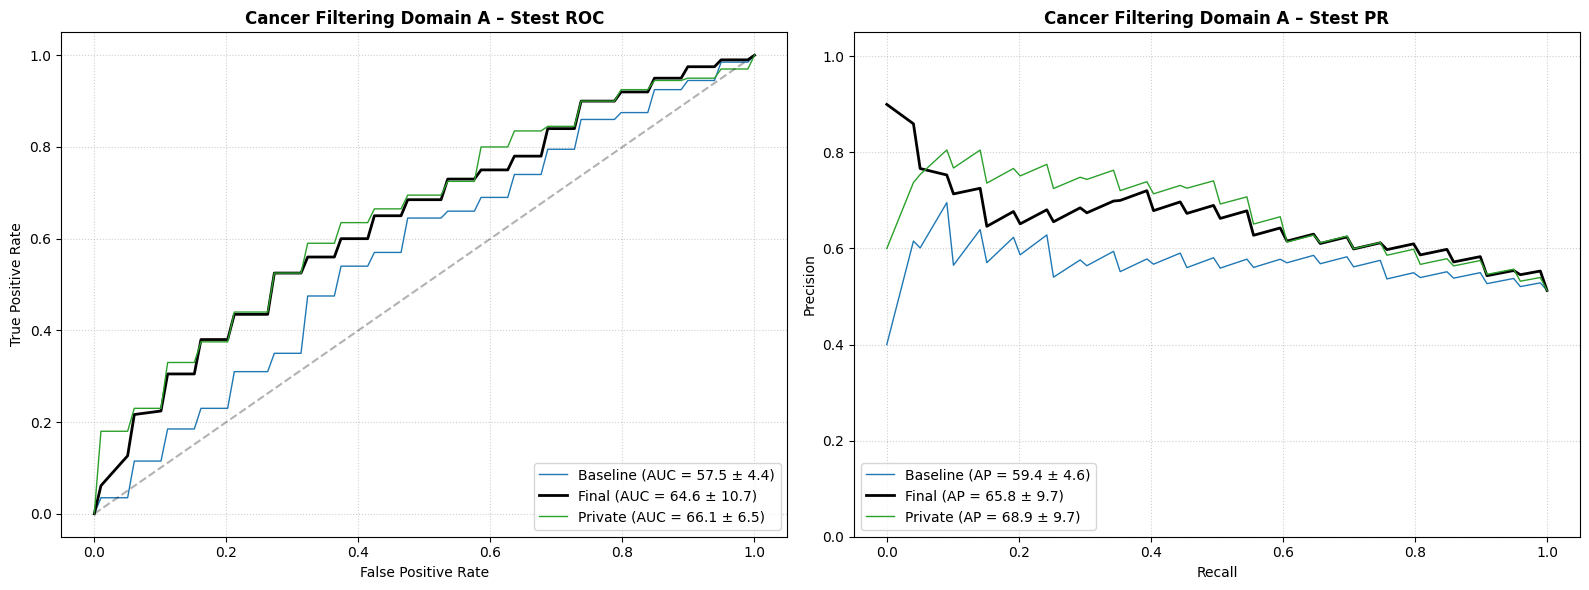

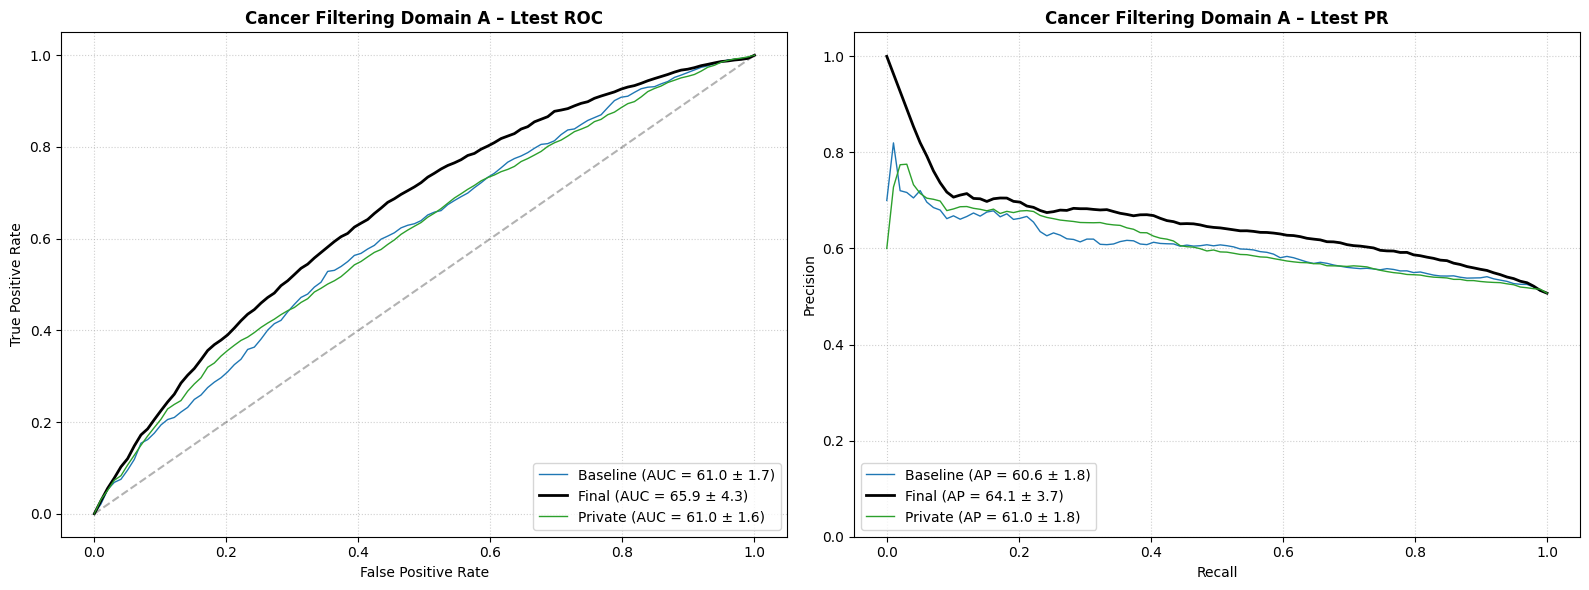

In [38]:
# Domain A
plot_domain_test(domain='A', test_type='Stest')
plot_domain_test(domain='A', test_type='Ltest')



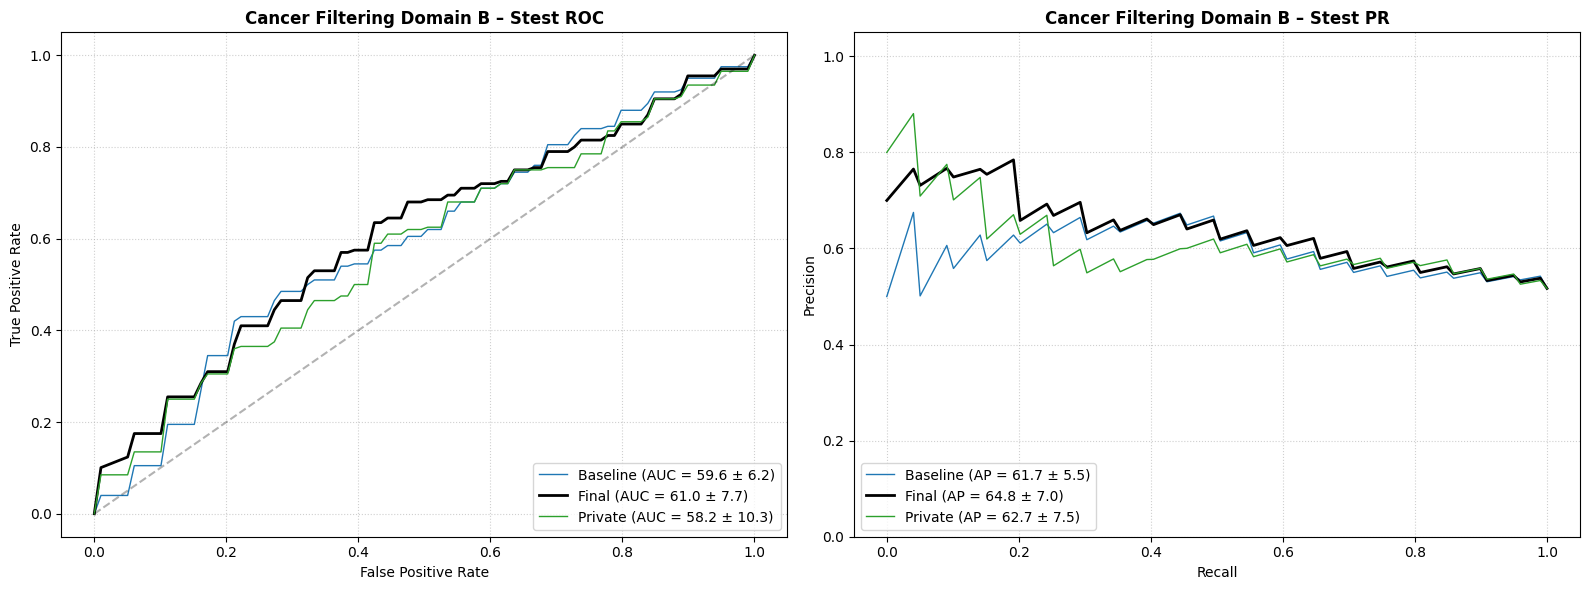

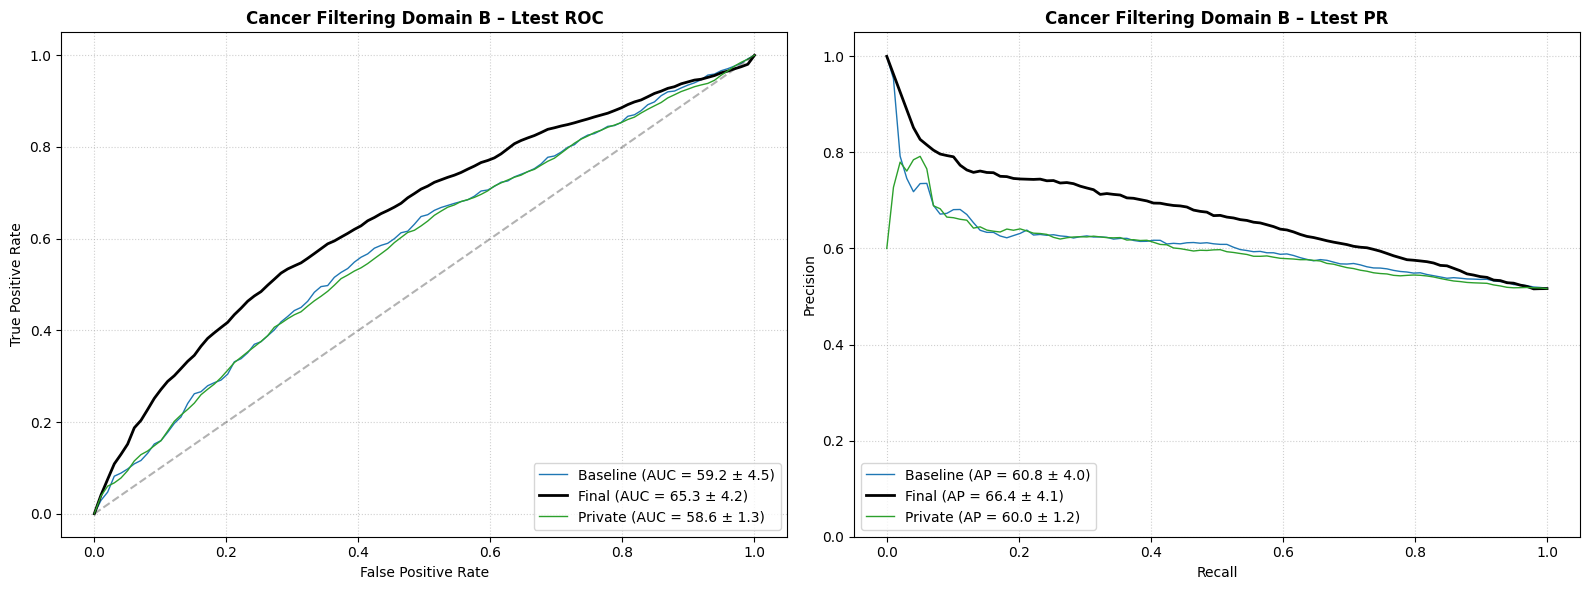

In [29]:
# Domain B
plot_domain_test(domain='B', test_type='Stest')
plot_domain_test(domain='B', test_type='Ltest')

# Other

### Random Forest: Dataset A reduced

#### Training

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold


# Initialize the 10-Fold Splitter
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print("Number of rows of the reduced dataset:",round(dfA.shape[0]/80))

# Container for RF results
fold_results_rf_A = []

# Assuming skf, dfA, set_A_attributes, and common_attributes are already defined
for i, (big_fold_idx, fold_idx) in enumerate(skf.split(dfA_filtered, dfA_filtered['mortality_1yr'])):
    if i >= 10: # Stop after index 9 (which is the 10th fold)
        break
    print(f"Fold {i}")
    
    # --- A. Data Preparation ---
    dfA_reduced = dfA_filtered.iloc[fold_idx].copy()
    # 1. Split data into features (X) and target (y)
    id_columns_A = dfA_reduced[['subject_id', 'hadm_id']]
    X = dfA_reduced.drop(columns=['mortality_1yr', 'subject_id', 'hadm_id'])
    y = dfA_reduced['mortality_1yr']

    X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    )

    rf_balanced_A = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=4,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )


    # Fit the model
    rf_balanced_A.fit(X_train_A, y_train_A)

    y_pred_bal = rf_balanced_A.predict(X_test_A)
    y_proba_bal = rf_balanced_A.predict_proba(X_test_A)[:, 1]


    # Get predicted probabilities for class 1 (mortality)
    y_proba = rf_balanced_A.predict_proba(X_test_A)[:, 1]  # Probability of class 1

    # Compute ROC curve
    fpr_rf_A_reduced_Stest, tpr_rf_A_reduced_Stest, thresholds_roc_rf_A_reduced_Stest = roc_curve(y_test_A, y_proba)

    # Compute AUC
    roc_auc_rf_A_reduced_Stest = auc(fpr_rf_A_reduced_Stest, tpr_rf_A_reduced_Stest)

    # Compute PR curve
    precision_rf_A_reduced_Stest, recall_rf_A_reduced_Stest, thresholds_pr_rf_A_reduced_Stest = precision_recall_curve(y_test_A, y_proba)

    # Compute average precision score (area under PR curve)
    avg_precision_rf_A_reduced_Stest = average_precision_score(y_test_A, y_proba)


    #=============Ltest=================
    dfA_rest= dfA_filtered.iloc[big_fold_idx].copy()
    id_columns_A = dfA_rest[['subject_id', 'hadm_id']]
    X = dfA_rest.drop(columns=['mortality_1yr', 'subject_id', 'hadm_id'])
    y = dfA_rest['mortality_1yr']

    X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
    )



    y_pred_bal = rf_balanced_A.predict(X_test_A)
    y_proba_bal = rf_balanced_A.predict_proba(X_test_A)[:, 1]
    
    # Get predicted probabilities for class 1 (mortality)
    y_proba = rf_balanced_A.predict_proba(X_test_A)[:, 1]  # Probability of class 1

    # Compute ROC curve
    fpr_rf_A_reduced_Ltest, tpr_rf_A_reduced_Ltest, thresholds_roc_rf_A_reduced_Ltest = roc_curve(y_test_A, y_proba)

    # Compute AUC
    roc_auc_rf_A_reduced_Ltest = auc(fpr_rf_A_reduced_Ltest, tpr_rf_A_reduced_Ltest)

    # Compute PR curve
    precision_rf_A_reduced_Ltest, recall_rf_A_reduced_Ltest, thresholds_pr_rf_A_reduced_Ltest = precision_recall_curve(y_test_A, y_proba)

    # Compute average precision score (area under PR curve)
    avg_precision_rf_A_reduced_Ltest = average_precision_score(y_test_A, y_proba)

    print("\tAUC\tAP")
    print(f"Stest\t{roc_auc_rf_A_reduced_Stest:.2f}\t{avg_precision_rf_A_reduced_Stest:.2f}")
    print(f"Ltest\t{roc_auc_rf_A_reduced_Ltest:.2f}\t{avg_precision_rf_A_reduced_Ltest:.2f}")



    # Store all specific metrics and arrays into a dictionary for this fold
    current_fold_metrics = {
        'fold_index': i + 1,
        
        # ROC AUC - Stest
        'fpr_rf_A_reduced_Stest': fpr_rf_A_reduced_Stest,
        'tpr_rf_A_reduced_Stest': tpr_rf_A_reduced_Stest,
        'thresholds_roc_rf_A_reduced_Stest': thresholds_roc_rf_A_reduced_Stest,
        'roc_auc_rf_A_reduced_Stest': roc_auc_rf_A_reduced_Stest,
        
        # PR - Stest
        'precision_rf_A_reduced_Stest': precision_rf_A_reduced_Stest,
        'recall_rf_A_reduced_Stest': recall_rf_A_reduced_Stest,
        'thresholds_pr_rf_A_reduced_Stest': thresholds_pr_rf_A_reduced_Stest,
        'avg_precision_rf_A_reduced_Stest': avg_precision_rf_A_reduced_Stest,

        # ROC AUC - Ltest
        'fpr_rf_A_reduced_Ltest': fpr_rf_A_reduced_Ltest,
        'tpr_rf_A_reduced_Ltest': tpr_rf_A_reduced_Ltest,
        'thresholds_roc_rf_A_reduced_Ltest': thresholds_roc_rf_A_reduced_Ltest,
        'roc_auc_rf_A_reduced_Ltest': roc_auc_rf_A_reduced_Ltest,

        # PR - Ltest
        'precision_rf_A_reduced_Ltest': precision_rf_A_reduced_Ltest,
        'recall_rf_A_reduced_Ltest': recall_rf_A_reduced_Ltest,
        'thresholds_pr_rf_A_reduced_Ltest': thresholds_pr_rf_A_reduced_Ltest,
        'avg_precision_rf_A_reduced_Ltest': avg_precision_rf_A_reduced_Ltest
    }
    fold_results_rf_A.append(current_fold_metrics)

print("\n Random Forest Benchmarking Complete.")

Number of rows of the reduced dataset: 182
Fold 0
	AUC	AP
Stest	0.60	0.58
Ltest	0.64	0.64
Fold 1
	AUC	AP
Stest	0.66	0.69
Ltest	0.61	0.59
Fold 2
	AUC	AP
Stest	0.63	0.60
Ltest	0.66	0.66
Fold 3
	AUC	AP
Stest	0.62	0.61
Ltest	0.65	0.64
Fold 4
	AUC	AP
Stest	0.78	0.82
Ltest	0.60	0.60
Fold 5
	AUC	AP
Stest	0.58	0.63
Ltest	0.66	0.67
Fold 6
	AUC	AP
Stest	0.66	0.68
Ltest	0.66	0.65
Fold 7
	AUC	AP
Stest	0.61	0.63
Ltest	0.64	0.61
Fold 8
	AUC	AP
Stest	0.73	0.74
Ltest	0.64	0.64
Fold 9
	AUC	AP
Stest	0.61	0.68
Ltest	0.68	0.67

 Random Forest Benchmarking Complete.


#### Results

In [40]:
import numpy as np

# --- 1. Average Scalars (AUC & AP) ---
auc_Stest = [f['roc_auc_rf_A_reduced_Stest'] for f in fold_results_rf_A]
ap_Stest  = [f['avg_precision_rf_A_reduced_Stest'] for f in fold_results_rf_A]
auc_Ltest = [f['roc_auc_rf_A_reduced_Ltest'] for f in fold_results_rf_A]
ap_Ltest  = [f['avg_precision_rf_A_reduced_Ltest'] for f in fold_results_rf_A]

mean_auc_Stest, std_auc_Stest = np.mean(auc_Stest)*100, np.std(auc_Stest)*100
mean_auc_Ltest, std_auc_Ltest = np.mean(auc_Ltest)*100, np.std(auc_Ltest)*100
mean_ap_Stest, std_ap_Stest   = np.mean(ap_Stest)*100, np.std(ap_Stest)*100
mean_ap_Ltest, std_ap_Ltest   = np.mean(ap_Ltest)*100, np.std(ap_Ltest)*100

# --- 2. Average Arrays (Interpolation) ---
# Define common grids (the X-axes)
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)

tprs_Stest = []
precisions_Stest = []
tprs_Ltest = []
precisions_Ltest = []

for f in fold_results_rf_A:
    # --- Stest Interpolation ---
    tprs_Stest.append(np.interp(mean_fpr, f['fpr_rf_A_reduced_Stest'], f['tpr_rf_A_reduced_Stest']))
    tprs_Stest[-1][0] = 0.0
    
    # PR interpolation: Recall must be increasing for np.interp
    precisions_Stest.append(np.interp(mean_recall, f['recall_rf_A_reduced_Stest'][::-1], f['precision_rf_A_reduced_Stest'][::-1]))

    # --- Ltest Interpolation ---
    tprs_Ltest.append(np.interp(mean_fpr, f['fpr_rf_A_reduced_Ltest'], f['tpr_rf_A_reduced_Ltest']))
    tprs_Ltest[-1][0] = 0.0
    
    precisions_Ltest.append(np.interp(mean_recall, f['recall_rf_A_reduced_Ltest'][::-1], f['precision_rf_A_reduced_Ltest'][::-1]))

# Calculate Final Mean Curves
mean_tpr_Stest = np.mean(tprs_Stest, axis=0)
mean_tpr_Stest[-1] = 1.0
mean_precision_Stest = np.mean(precisions_Stest, axis=0)

mean_tpr_Ltest = np.mean(tprs_Ltest, axis=0)
mean_tpr_Ltest[-1] = 1.0
mean_precision_Ltest = np.mean(precisions_Ltest, axis=0)


print("Means ± Std [%]")
print("\tAUC\t\tAP")
print(f"Stest\t{mean_auc_Stest:.1f} ± {std_auc_Stest:.1f}\t{mean_ap_Stest:.1f} ± {std_ap_Stest:.1f}")
print(f"Ltest\t{mean_auc_Ltest:.1f} ± {std_auc_Ltest:.1f}\t{mean_ap_Ltest:.1f} ± {std_ap_Ltest:.1f}")


Means ± Std [%]
	AUC		AP
Stest	64.7 ± 6.0	66.6 ± 6.9
Ltest	64.5 ± 2.3	63.7 ± 2.8


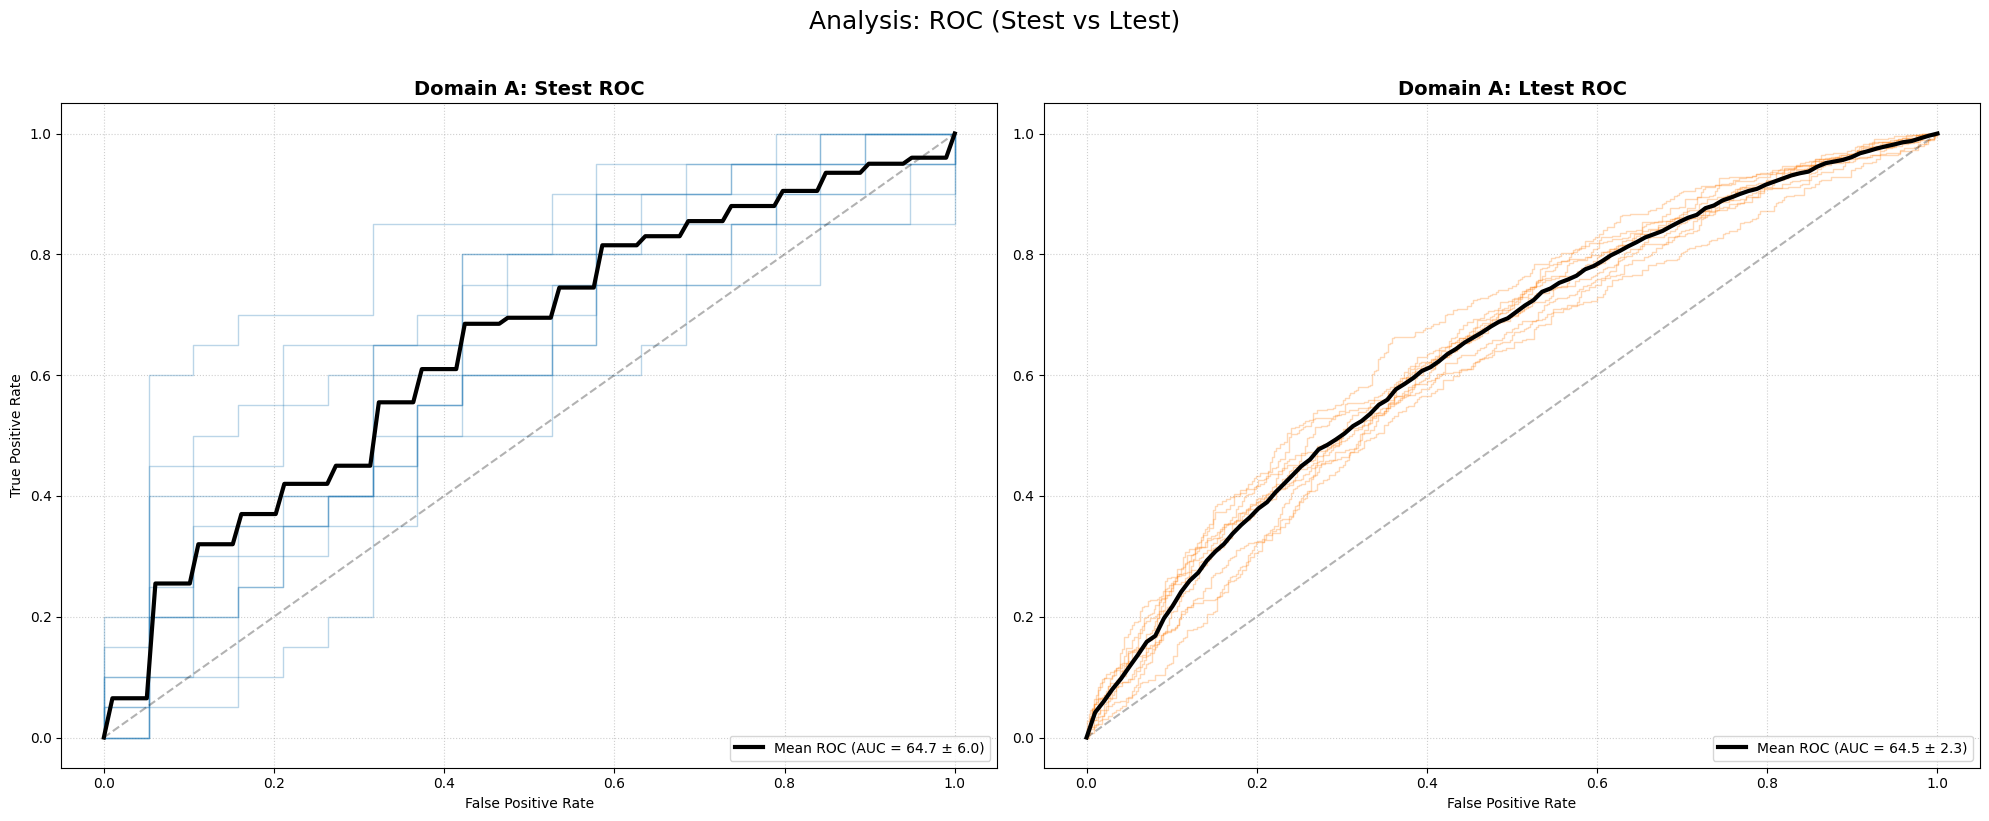

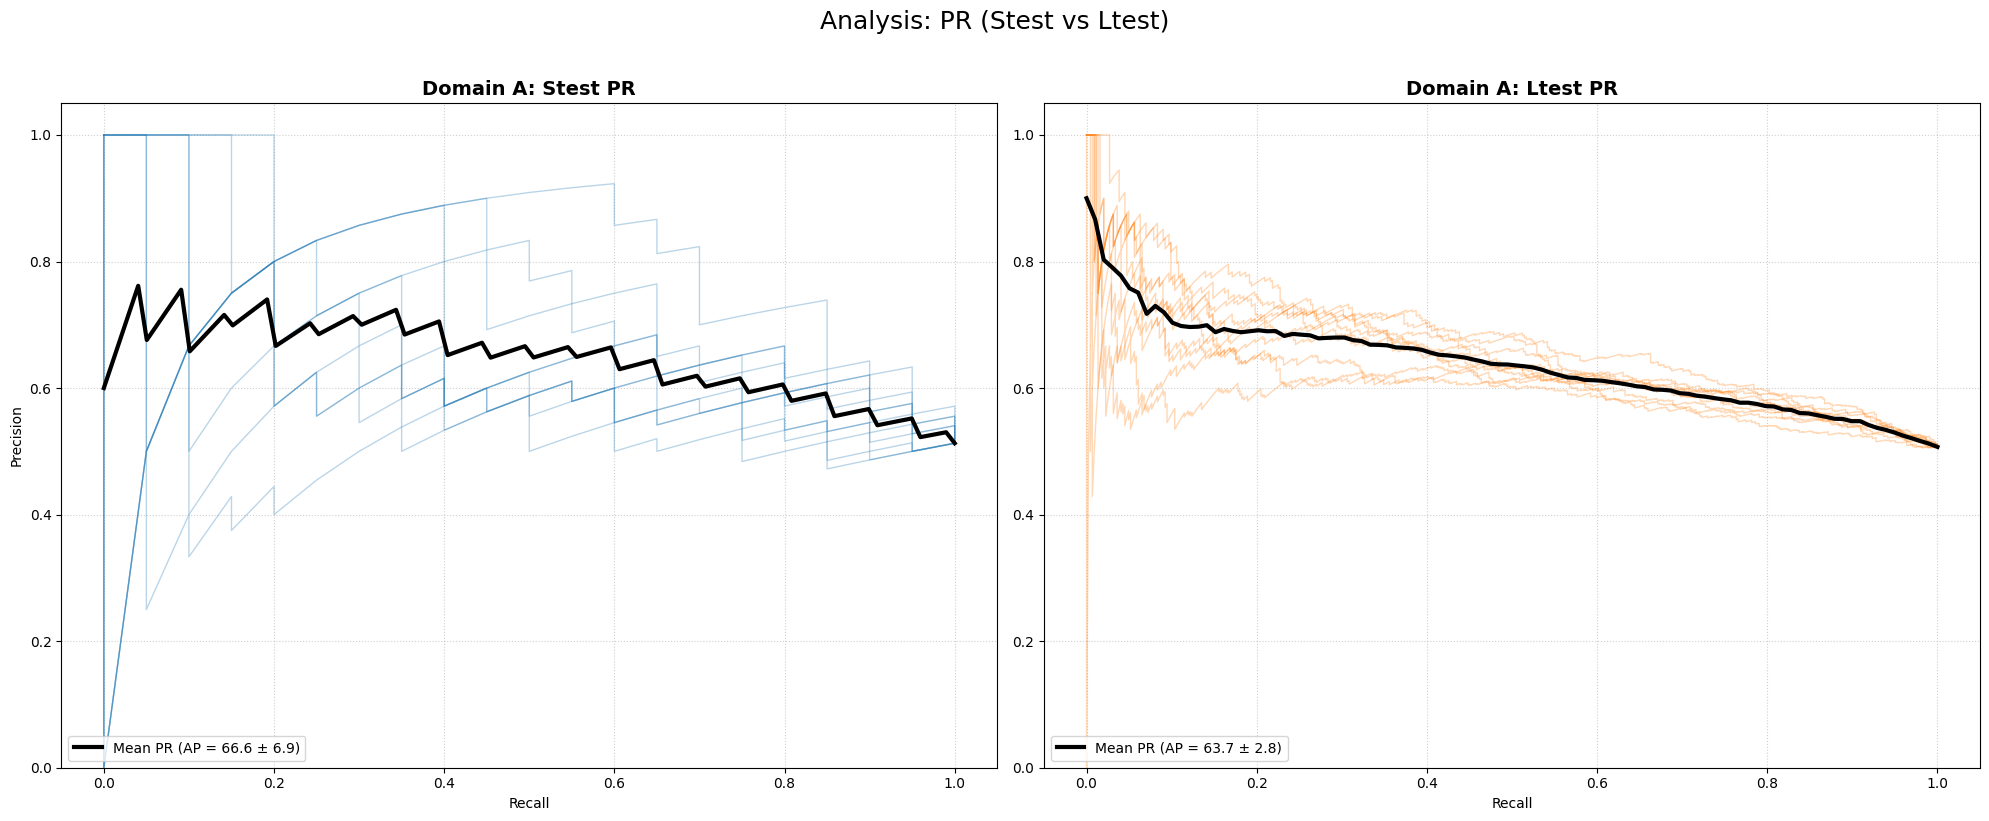

In [41]:
import matplotlib.pyplot as plt

def plot_cv_comparison(metric_type='ROC'):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Configuration
    colors = {'Stest': '#1f77b4', 'Ltest': '#ff7f0e'}
    
    for i, t_type in enumerate(['Stest', 'Ltest']):
        ax = axes[i]
        
        # Plot individual thin lines
        for f in fold_results_rf_A:
            if metric_type == 'ROC':
                ax.plot(f[f'fpr_rf_A_reduced_{t_type}'], f[f'tpr_rf_A_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)
            else:
                ax.plot(f[f'recall_rf_A_reduced_{t_type}'], f[f'precision_rf_A_reduced_{t_type}'], 
                        color=colors[t_type], alpha=0.3, lw=1)

        # Plot the thick Mean Curve
        if metric_type == 'ROC':
            m_tpr = mean_tpr_Stest if t_type == 'Stest' else mean_tpr_Ltest
            m_auc = mean_auc_Stest if t_type == 'Stest' else mean_auc_Ltest
            s_auc = std_auc_Stest if t_type == 'Stest' else std_auc_Ltest
            ax.plot(mean_fpr, m_tpr, color='black', lw=3, label=f'Mean ROC (AUC = {m_auc:.1f} ± {s_auc:.1f})')
            ax.plot([0, 1], [0, 1], 'k--', alpha=0.3)
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate' if i==0 else "")
        else:
            m_prec = mean_precision_Stest if t_type == 'Stest' else mean_precision_Ltest
            m_ap = mean_ap_Stest if t_type == 'Stest' else mean_ap_Ltest
            s_ap = std_ap_Stest if t_type == 'Stest' else std_ap_Ltest
            ax.plot(mean_recall, m_prec, color='black', lw=3, label=f'Mean PR (AP = {m_ap:.1f} ± {s_ap:.1f})')
            ax.set_xlabel('Recall')
            ax.set_ylabel('Precision' if i==0 else "")
            ax.set_ylim([0, 1.05])

        ax.set_title(f'Domain A: {t_type} {metric_type}', fontsize=14, fontweight='bold')
        ax.legend(loc='lower right' if metric_type=='ROC' else 'lower left')
        ax.grid(True, linestyle=':', alpha=0.6)

    plt.suptitle(f'Analysis: {metric_type} (Stest vs Ltest)', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# Run both
plot_cv_comparison(metric_type='ROC')
plot_cv_comparison(metric_type='PR')

In [42]:
np.savez(
    'mean_rf_A_cancer.npz',

    # Scalars
    mean_auc_Stest=mean_auc_Stest,
    std_auc_Stest=std_auc_Stest,
    mean_auc_Ltest=mean_auc_Ltest,
    std_auc_Ltest=std_auc_Ltest,

    mean_ap_Stest=mean_ap_Stest,
    std_ap_Stest=std_ap_Stest,
    mean_ap_Ltest=mean_ap_Ltest,
    std_ap_Ltest=std_ap_Ltest,

    # Curves
    mean_fpr=mean_fpr,
    mean_recall=mean_recall,
    mean_tpr_Stest=mean_tpr_Stest,
    mean_tpr_Ltest=mean_tpr_Ltest,
    mean_precision_Stest=mean_precision_Stest,
    mean_precision_Ltest=mean_precision_Ltest,
)